In [1]:
print("Salvou")

Salvou


In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from darts import TimeSeries
from darts.metrics import mae, mse, rmse

In [3]:
# For local notebook
src_folder = os.path.abspath(os.path.join(os.pardir, "src"))
sys.path.append(src_folder)

In [4]:
from metrics import compare_series_metrics

c:\Users\ejs-9\anaconda3\envs\5g_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'compare_series_metrics' from 'metrics' (c:\Users\ejs-9\Documents\Repos\5g-forecasting\src\metrics.py)

In [5]:
from custom_plots import (
    aggregate_median_metrics,
    plot_bar_for_medians_by_target,
    plot_boxplots_for_metrics_by_target,
    process_results_parquet,
)

## Estilo dos gráficos

In [6]:
plt.rcParams["figure.figsize"] = [12, 8]

In [7]:
sns.set_palette("Paired")

## Lendo os resultados salvos em parquet

In [8]:
folder_path = os.path.join(os.pardir, "data", "results")

Analisando apenas um resultado:

In [9]:
file_path = os.path.join(folder_path, "no_window", "LightGBM_static_down_RSRP.parquet")
# Read the Parquet file and add it to the DataFrame
test_df = pd.read_parquet(file_path)
test_df = test_df.reset_index(drop=True)

In [ ]:
test_df

target     Activity     Model  Elapsed_time  \
0   RSRP  static_down  LightGBM      1.862778   
1   RSRP  static_down  LightGBM      2.202439   
2   RSRP  static_down  LightGBM      2.130824   
3   RSRP  static_down  LightGBM      2.275531   
4   RSRP  static_down  LightGBM      2.096414   

                                         Train_index  \
0  [2020-01-16T10:43:34.000000000, 2020-01-16T10:...   
1  [2020-02-27T18:39:27.000000000, 2020-02-27T18:...   
2  [2019-12-16T13:40:04.000000000, 2019-12-16T13:...   
3  [2020-02-13T13:57:29.000000000, 2020-02-13T13:...   
4  [2020-02-14T13:21:26.000000000, 2020-02-14T13:...   

                                        Train_values  \
0  [-99.0, -100.0, -100.0, -101.0, -101.0, -100.0...   
1  [-101.00000000000001, -101.00000000000001, -10...   
2  [-103.0, -102.0, -102.0, -104.0, -104.0, -104....   
3  [-101.0, -101.0, -102.0, -102.0, -102.0, -99.9...   
4  [-103.0, -103.0, -102.0, -103.0, -103.0, -104....   

                                       Actuals_index  \
0  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
1  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
2  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
3  [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
4  [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                      Actuals_values  \
0  [-102.0, -102.0, -102.0, -102.5, -103.0, -102....   
1  [-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...   
2  [-98.0, -98.0, -98.0, -98.0, -98.0, -99.0, -99...   
3  [-101.0, -101.0, -103.0, -103.0, -100.5, -98.0...   
4  [-104.0, -104.0, -104.0, -104.0, -104.0, -104....   

                                         Preds_index  \
0  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
1  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
2  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
3  [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
4  [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                        Preds_values  
0  [-102.66177336218435, -102.96307108140094, -10...  
1  [-97.04296310018843, -96.90851530043102, -96.9...  
2  [-97.18660034244752, -96.56667739398394, -96.5...  
3  [-101.80593405624855, -101.66432029637839, -10...  
4  [-104.18922743388909, -104.20798366913748, -10...

In [11]:
test_df["Actuals_index"][0]

array(['2020-01-16T11:44:44.000000000', '2020-01-16T11:44:45.000000000',
       '2020-01-16T11:44:46.000000000', '2020-01-16T11:44:47.000000000',
       '2020-01-16T11:44:48.000000000', '2020-01-16T11:44:49.000000000',
       '2020-01-16T11:44:50.000000000', '2020-01-16T11:44:51.000000000',
       '2020-01-16T11:44:52.000000000', '2020-01-16T11:44:53.000000000'],
      dtype='datetime64[ns]')

In [12]:
# Supondo que test_df["Actuals_index"][0] seja o array de datas e test_df["Actuals_values"][0] os valores:

sample_idx = 4

dates_0 = pd.DatetimeIndex(test_df["Train_index"][sample_idx])
values_0 = test_df["Train_values"][sample_idx]
train_ts = TimeSeries.from_times_and_values(dates_0, values_0)


dates_1 = pd.DatetimeIndex(test_df["Actuals_index"][sample_idx])
values_1 = test_df["Actuals_values"][sample_idx]
actual_ts = TimeSeries.from_times_and_values(dates_1, values_1)


dates_2 = pd.DatetimeIndex(test_df["Preds_index"][sample_idx])
values_2 = test_df["Preds_values"][sample_idx]
preds_ts = TimeSeries.from_times_and_values(dates_2, values_2)

<Axes: xlabel='time'>

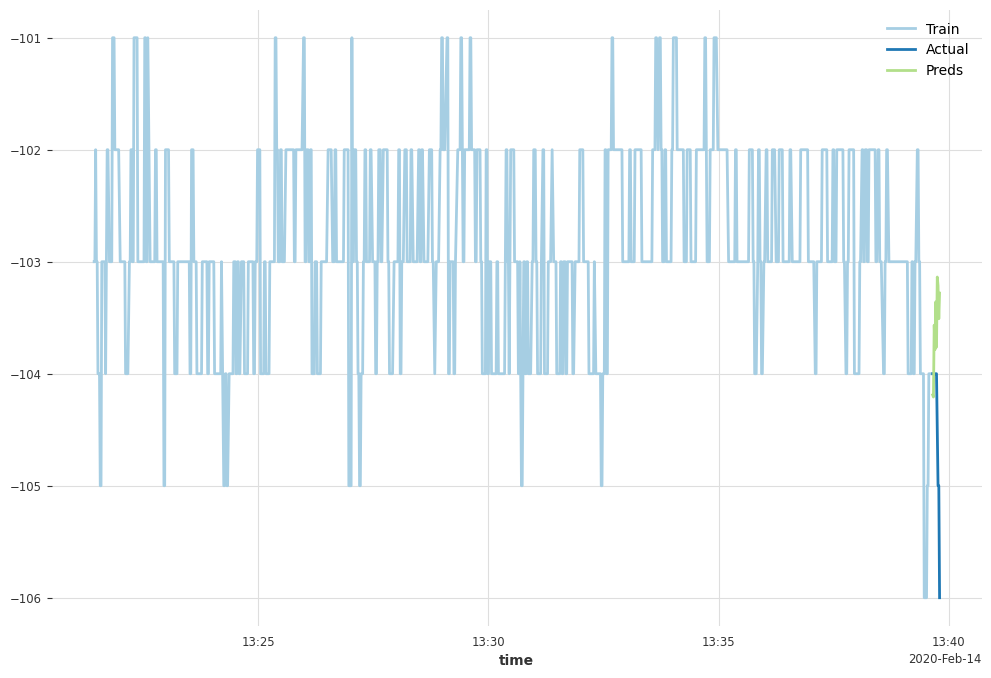

In [ ]:
train_ts.plot(label="Train")
actual_ts.plot(label="Actual")
preds_ts.plot(label="Preds")

Calculando todas as métricas do estudo para um resultado salvo:

In [ ]:
compare_series_metrics(test_df)

target     Activity     Model  Elapsed_time  \
0   RSRP  static_down  LightGBM      1.862778   
1   RSRP  static_down  LightGBM      2.202439   
2   RSRP  static_down  LightGBM      2.130824   
3   RSRP  static_down  LightGBM      2.275531   
4   RSRP  static_down  LightGBM      2.096414   

                                         Train_index  \
0  [2020-01-16T10:43:34.000000000, 2020-01-16T10:...   
1  [2020-02-27T18:39:27.000000000, 2020-02-27T18:...   
2  [2019-12-16T13:40:04.000000000, 2019-12-16T13:...   
3  [2020-02-13T13:57:29.000000000, 2020-02-13T13:...   
4  [2020-02-14T13:21:26.000000000, 2020-02-14T13:...   

                                        Train_values  \
0  [-99.0, -100.0, -100.0, -101.0, -101.0, -100.0...   
1  [-101.00000000000001, -101.00000000000001, -10...   
2  [-103.0, -102.0, -102.0, -104.0, -104.0, -104....   
3  [-101.0, -101.0, -102.0, -102.0, -102.0, -99.9...   
4  [-103.0, -103.0, -102.0, -103.0, -103.0, -104....   

                                       Actuals_index  \
0  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
1  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
2  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
3  [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
4  [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                      Actuals_values  \
0  [-102.0, -102.0, -102.0, -102.5, -103.0, -102....   
1  [-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...   
2  [-98.0, -98.0, -98.0, -98.0, -98.0, -99.0, -99...   
3  [-101.0, -101.0, -103.0, -103.0, -100.5, -98.0...   
4  [-104.0, -104.0, -104.0, -104.0, -104.0, -104....   

                                         Preds_index  \
0  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
1  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
2  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
3  [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
4  [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                        Preds_values       MAE      RMSE  \
0  [-102.66177336218435, -102.96307108140094, -10...  0.922769  1.002012   
1  [-97.04296310018843, -96.90851530043102, -96.9...  0.110781  0.156537   
2  [-97.18660034244752, -96.56667739398394, -96.5...  1.503197  1.712826   
3  [-101.80593405624855, -101.66432029637839, -10...  1.591254  1.892412   
4  [-104.18922743388909, -104.20798366913748, -10...  0.928689  1.243054   

        MSE     NRMSE      NMSE  
0  1.004027  1.002012  5.284355  
1  0.024504       NaN       NaN  
2  2.933772  0.856413  5.187417  
3  3.581225  0.378482  1.277868  
4  1.545183  0.621527  3.657239

Lendo todos os resultados baselines:

In [15]:
dfs = []
folder = os.path.join(folder_path, "no_window")
for file in os.listdir(folder):
    if file.endswith(".parquet"):
        # Create the full path of the file
        file_path = os.path.join(folder, file)
        # Read the Parquet file and add it to the DataFrame
        mult_df = pd.read_parquet(file_path)
        dfs.append(mult_df)

all_baselines_results = pd.concat(dfs)

# Liberar memoria
del dfs

all_baselines_results = all_baselines_results.reset_index(drop=True)

In [ ]:
all_baselines_results

target      Activity  Model  Elapsed_time  \
0       CQI  driving_down  ARIMA      0.441384   
1       CQI  driving_down  ARIMA      0.589807   
2       CQI  driving_down  ARIMA      0.460299   
3       CQI  driving_down  ARIMA      0.363048   
4       CQI  driving_down  ARIMA      0.493473   
...     ...           ...    ...           ...   
3396   RSSI   static_strm  Theta      0.016322   
3397   RSSI   static_strm  Theta      0.023782   
3398   RSSI   static_strm  Theta      0.017873   
3399   RSSI   static_strm  Theta      0.031841   
3400   RSSI   static_strm  Theta      0.013853   

                                            Train_index  \
0     [2020-02-14T09:38:22.000000000, 2020-02-14T09:...   
1     [2020-02-14T07:29:00.000000000, 2020-02-14T07:...   
2     [2020-01-16T07:26:43.000000000, 2020-01-16T07:...   
3     [2020-01-16T12:10:03.000000000, 2020-01-16T12:...   
4     [2020-01-16T09:56:56.000000000, 2020-01-16T09:...   
...                                                 ...   
3396  [2019-12-16T13:03:47.000000000, 2019-12-16T13:...   
3397  [2019-11-28T08:02:20.000000000, 2019-11-28T08:...   
3398  [2019-12-19T15:00:47.000000000, 2019-12-19T15:...   
3399  [2019-12-06T09:55:13.000000000, 2019-12-06T09:...   
3400  [2019-11-26T09:27:10.000000000, 2019-11-26T09:...   

                                           Train_values  \
0     [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0...   
1     [10.0, 10.0, 12.0, 14.0, 11.0, 11.0, 14.0, 14....   
2     [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0,...   
3     [9.0, 9.0, 11.999999999999998, 11.0, 11.0, 11....   
4     [11.0, 11.0, 13.0, 13.0, 13.0, 11.0, 9.0, 11.0...   
...                                                 ...   
3396  [-86.0, -84.0, -84.0, -84.0, -84.0, -84.0, -84...   
3397  [-66.0, -66.0, -66.0, -66.0, -66.0, -66.0, -66...   
3398  [-87.0, -87.0, -87.0, -87.0, -87.0, -87.0, -87...   
3399  [-86.0, -86.0, -86.0, -86.0, -86.0, -86.0, -86...   
3400  [-70.0, -70.0, -70.0, -72.0, -72.0, -70.0, -71...   

                                          Actuals_index  \
0     [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
1     [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
2     [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
3     [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
4     [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
...                                                 ...   
3396  [2019-12-16T13:36:21.000000000, 2019-12-16T13:...   
3397  [2019-11-28T09:10:52.000000000, 2019-11-28T09:...   
3398  [2019-12-19T15:41:55.000000000, 2019-12-19T15:...   
3399  [2019-12-06T11:43:37.000000000, 2019-12-06T11:...   
3400  [2019-11-26T09:49:22.000000000, 2019-11-26T09:...   

                                         Actuals_values  \
0     [11.0, 11.0, 11.0, 14.0, 14.0, 8.0, 8.0, 12.0,...   
1     [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...   
2     [6.0, 6.0, 7.5, 9.0, 9.0, 10.0, 10.0, 9.0, 9.0...   
3     [4.0, 4.0, 10.0, 10.0, 14.0, 14.0, 14.0, 13.5,...   
4     [10.0, 10.0, 12.0, 12.0, 11.0, 11.0, 12.0, 10....   
...                                                 ...   
3396  [-85.61538461538461, -85.46153846153847, -85.3...   
3397  [-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...   
3398  [-85.0, -90.0, -90.0, -90.0, -87.0, -89.0, -87...   
3399  [-89.0, -87.0, -88.0, -89.0, -90.0, -91.0, -92...   
3400  [-74.0, -74.0, -74.0, -74.66666666666667, -75....   

                                            Preds_index  \
0     [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
1     [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
2     [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
3     [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
4     [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
...                                                 ...   
3396  [2019-12-16T13:36:21.000000000, 2019-12-16T13:...   
3397  [2019-11-28T09:10:52.000000000, 2019-11-28T09:...   
3398  [2019-12-19T15:41:55.000000000,

### Processando métricas

In [115]:
# df = process_results_parquet(folder_path)

In [17]:
df_metrics = compare_series_metrics(all_baselines_results)

In [ ]:
df_metrics

target      Activity  Model  Elapsed_time  \
0       CQI  driving_down  ARIMA      0.441384   
1       CQI  driving_down  ARIMA      0.589807   
2       CQI  driving_down  ARIMA      0.460299   
3       CQI  driving_down  ARIMA      0.363048   
4       CQI  driving_down  ARIMA      0.493473   
...     ...           ...    ...           ...   
3396   RSSI   static_strm  Theta      0.016322   
3397   RSSI   static_strm  Theta      0.023782   
3398   RSSI   static_strm  Theta      0.017873   
3399   RSSI   static_strm  Theta      0.031841   
3400   RSSI   static_strm  Theta      0.013853   

                                            Train_index  \
0     [2020-02-14T09:38:22.000000000, 2020-02-14T09:...   
1     [2020-02-14T07:29:00.000000000, 2020-02-14T07:...   
2     [2020-01-16T07:26:43.000000000, 2020-01-16T07:...   
3     [2020-01-16T12:10:03.000000000, 2020-01-16T12:...   
4     [2020-01-16T09:56:56.000000000, 2020-01-16T09:...   
...                                                 ...   
3396  [2019-12-16T13:03:47.000000000, 2019-12-16T13:...   
3397  [2019-11-28T08:02:20.000000000, 2019-11-28T08:...   
3398  [2019-12-19T15:00:47.000000000, 2019-12-19T15:...   
3399  [2019-12-06T09:55:13.000000000, 2019-12-06T09:...   
3400  [2019-11-26T09:27:10.000000000, 2019-11-26T09:...   

                                           Train_values  \
0     [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0...   
1     [10.0, 10.0, 12.0, 14.0, 11.0, 11.0, 14.0, 14....   
2     [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0,...   
3     [9.0, 9.0, 11.999999999999998, 11.0, 11.0, 11....   
4     [11.0, 11.0, 13.0, 13.0, 13.0, 11.0, 9.0, 11.0...   
...                                                 ...   
3396  [-86.0, -84.0, -84.0, -84.0, -84.0, -84.0, -84...   
3397  [-66.0, -66.0, -66.0, -66.0, -66.0, -66.0, -66...   
3398  [-87.0, -87.0, -87.0, -87.0, -87.0, -87.0, -87...   
3399  [-86.0, -86.0, -86.0, -86.0, -86.0, -86.0, -86...   
3400  [-70.0, -70.0, -70.0, -72.0, -72.0, -70.0, -71...   

                                          Actuals_index  \
0     [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
1     [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
2     [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
3     [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
4     [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
...                                                 ...   
3396  [2019-12-16T13:36:21.000000000, 2019-12-16T13:...   
3397  [2019-11-28T09:10:52.000000000, 2019-11-28T09:...   
3398  [2019-12-19T15:41:55.000000000, 2019-12-19T15:...   
3399  [2019-12-06T11:43:37.000000000, 2019-12-06T11:...   
3400  [2019-11-26T09:49:22.000000000, 2019-11-26T09:...   

                                         Actuals_values  \
0     [11.0, 11.0, 11.0, 14.0, 14.0, 8.0, 8.0, 12.0,...   
1     [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...   
2     [6.0, 6.0, 7.5, 9.0, 9.0, 10.0, 10.0, 9.0, 9.0...   
3     [4.0, 4.0, 10.0, 10.0, 14.0, 14.0, 14.0, 13.5,...   
4     [10.0, 10.0, 12.0, 12.0, 11.0, 11.0, 12.0, 10....   
...                                                 ...   
3396  [-85.61538461538461, -85.46153846153847, -85.3...   
3397  [-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...   
3398  [-85.0, -90.0, -90.0, -90.0, -87.0, -89.0, -87...   
3399  [-89.0, -87.0, -88.0, -89.0, -90.0, -91.0, -92...   
3400  [-74.0, -74.0, -74.0, -74.66666666666667, -75....   

                                            Preds_index  \
0     [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
1     [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
2     [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
3     [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
4     [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
...                                                 ...   
3396  [2019-12-16T13:36:21.000000000, 2019-12-16T13:...   
3397  [2019-11-28T09:10:52.000000000, 2019-11-28T09:...   
3398  [2019-12-19T15:41:55.000000000,

In [19]:
# TODO: Verificar por que não está salvando dentro da pasta .;data
try:
    metrics_path = os.path.join(os.pardir, "data", "last_metrics_univariate.parquet")

    # Cria o diretório se não existir
    os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
    # Concatena todos os DataFrames e realiza o processamento
    df_metrics.to_parquet(metrics_path, compression="gzip")
except Exception as e:
    print(f"Não foi possivel salvar: {e}")

In [20]:
df_metrics.columns

Index(['target', 'Activity', 'Model', 'Elapsed_time', 'Train_index',
       'Train_values', 'Actuals_index', 'Actuals_values', 'Preds_index',
       'Preds_values', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE'],
      dtype='object')

In [21]:
df_metrics[["Model", "target", "Activity", "MAE", "RMSE", "MSE"]]

Model target      Activity       MAE      RMSE           MSE
0     ARIMA    CQI  driving_down  2.062690  2.547199  6.488222e+00
1     ARIMA    CQI  driving_down  0.000075  0.000077  5.928776e-09
2     ARIMA    CQI  driving_down  1.095137  1.230567  1.514295e+00
3     ARIMA    CQI  driving_down  3.293019  4.446660  1.977279e+01
4     ARIMA    CQI  driving_down  1.051347  1.276120  1.628481e+00
...     ...    ...           ...       ...       ...           ...
3396  Theta   RSSI   static_strm  1.196154  1.467455  2.153423e+00
3397  Theta   RSSI   static_strm  2.103165  2.250179  5.063305e+00
3398  Theta   RSSI   static_strm  2.897874  3.329353  1.108459e+01
3399  Theta   RSSI   static_strm  1.654979  1.839979  3.385523e+00
3400  Theta   RSSI   static_strm  0.755157  0.831268  6.910061e-01

[3401 rows x 6 columns]

In [ ]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

Model target      Activity  MAE_Median  RMSE_Median  MSE_Median  \
0    ARIMA    CQI  driving_down    1.051347     1.230567    1.514295   
1    ARIMA    CQI  driving_strm    1.099634     1.338507    1.791600   
2    ARIMA   RSRP  driving_down    1.953854     2.452317    6.158815   
3    ARIMA   RSRP  driving_strm    1.608105     1.977344    3.910195   
4    ARIMA   RSRP   static_down    0.814183     1.089633    1.187299   
..     ...    ...           ...         ...          ...         ...   
186  Theta   RSRQ   static_strm    1.350000     1.638628    2.700000   
187  Theta   RSSI  driving_strm    1.305127     1.724542    2.974044   
188  Theta   RSSI   static_strm    1.400000     1.713642    2.936570   
189  Theta    SNR  driving_strm    2.942161     3.627229   13.156791   
190  Theta    SNR   static_down    2.800000     3.130495    9.800000   

     NRMSE_Median  NMSE_Median  
0        0.425373     1.400091  
1        0.484679     1.510677  
2        0.681283     3.583107  
3        0.574696     2.227004  
4        0.614197     2.710051  
..            ...          ...  
186      0.505525     1.840278  
187      0.595904     2.392241  
188      0.489152     1.317519  
189      0.485913     1.740741  
190      0.492654     1.926681  

[191 rows x 8 columns]

In [24]:
agg_data.Model.unique()

array(['ARIMA', 'ExponentialSmoothing', 'FFT', 'LSTM', 'LightGBM',
       'LinearRegression', 'NBEATS', 'Naive', 'NaiveDrift', 'NaiveMean',
       'NaiveMovingAverage', 'Prophet', 'Theta'], dtype=object)

## Bar plots das médias.

Paleta de cores:

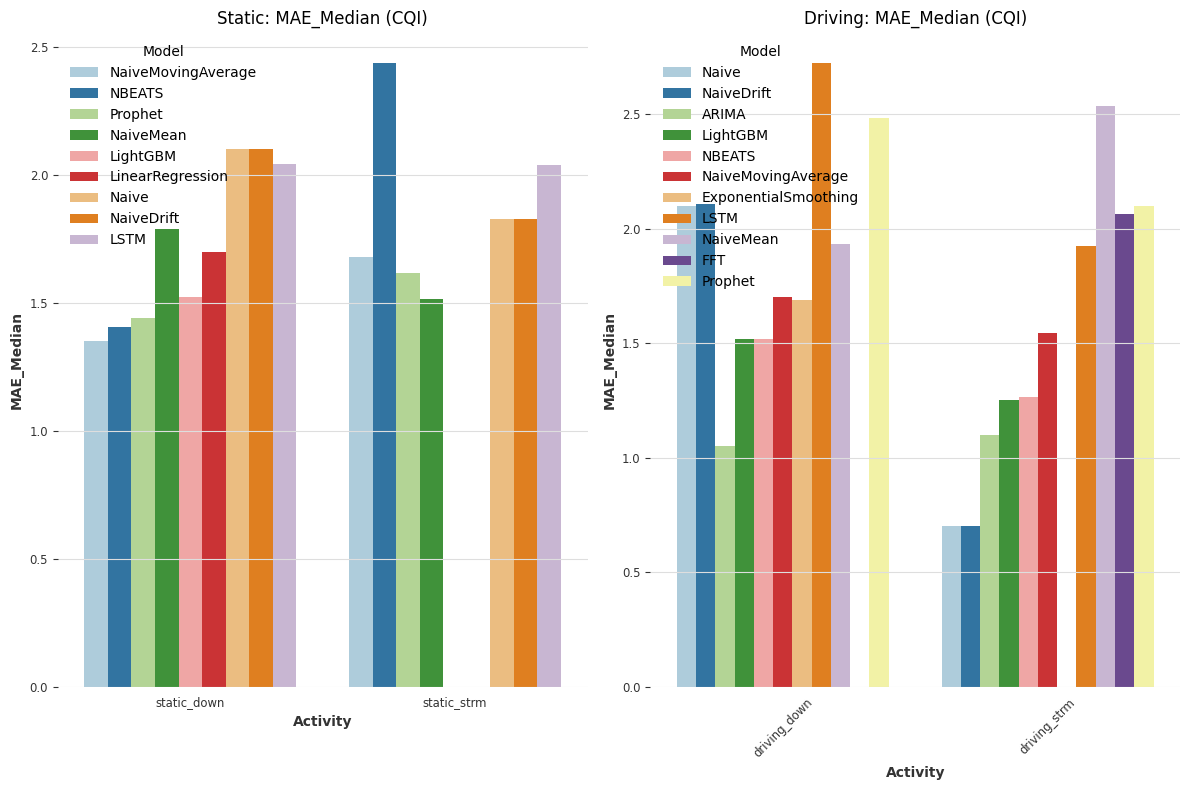

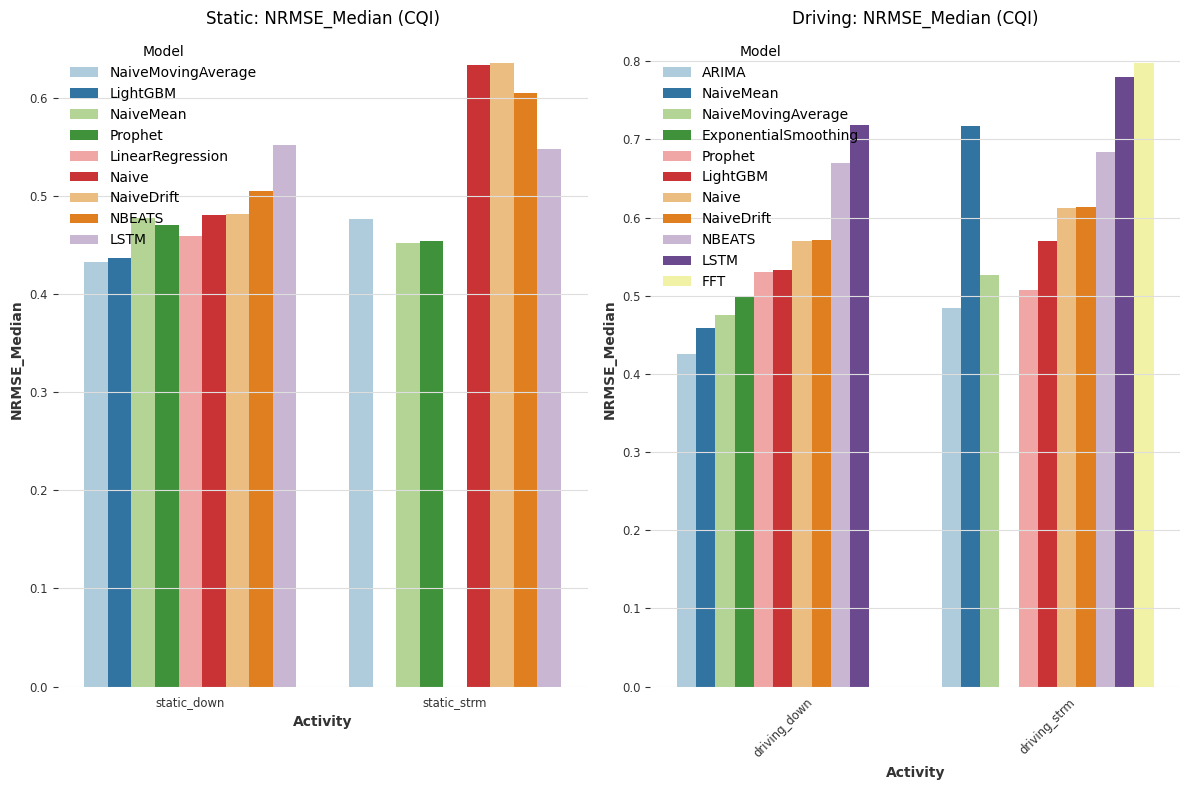

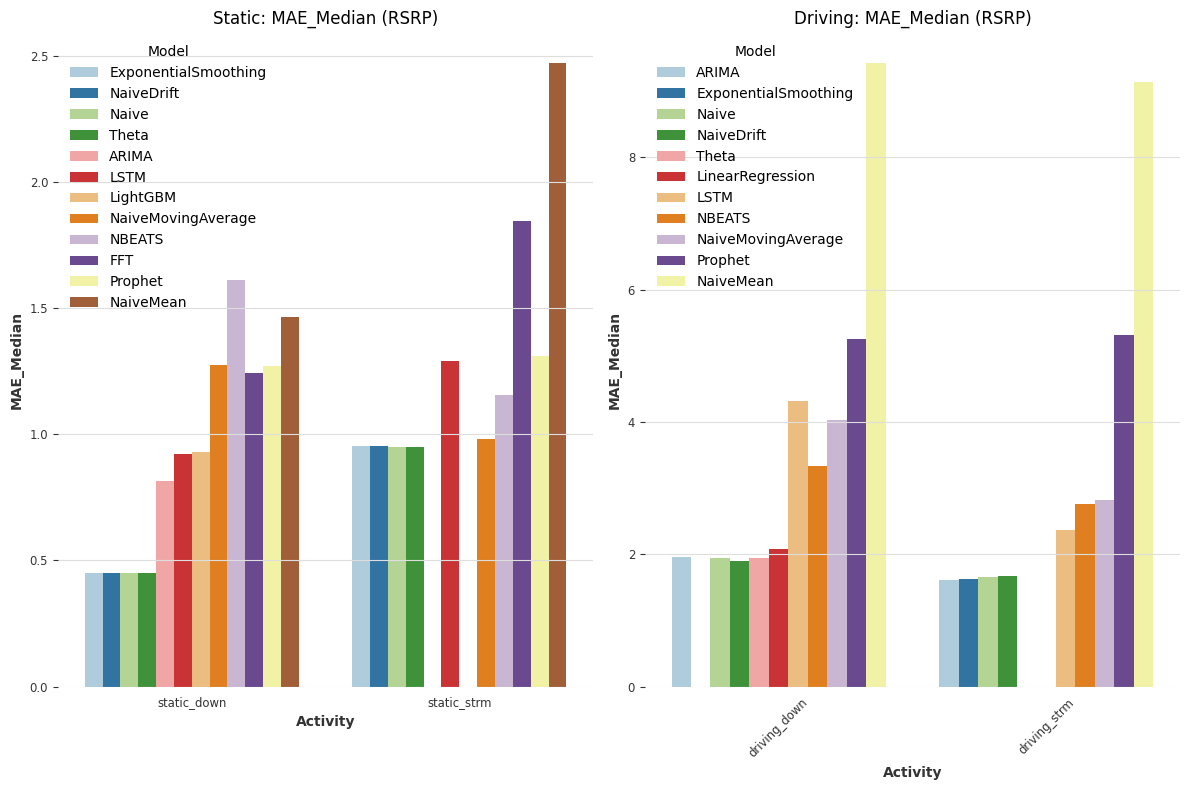

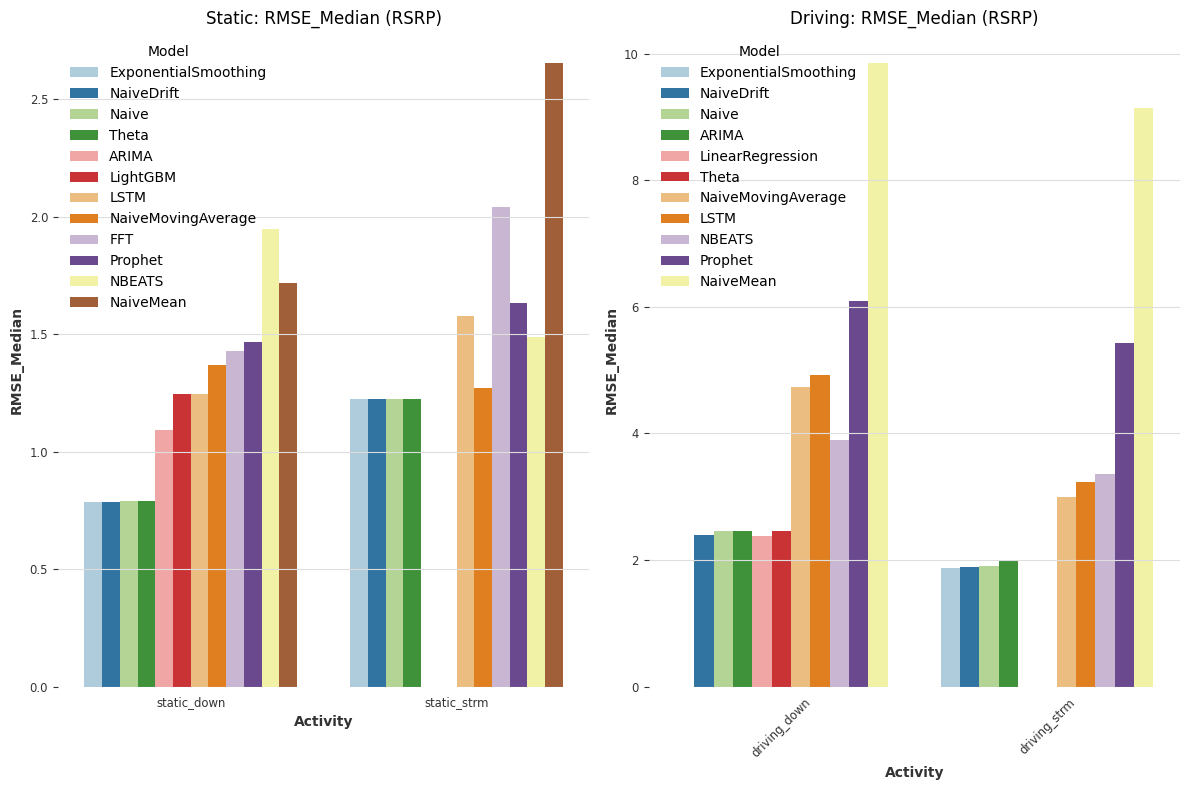

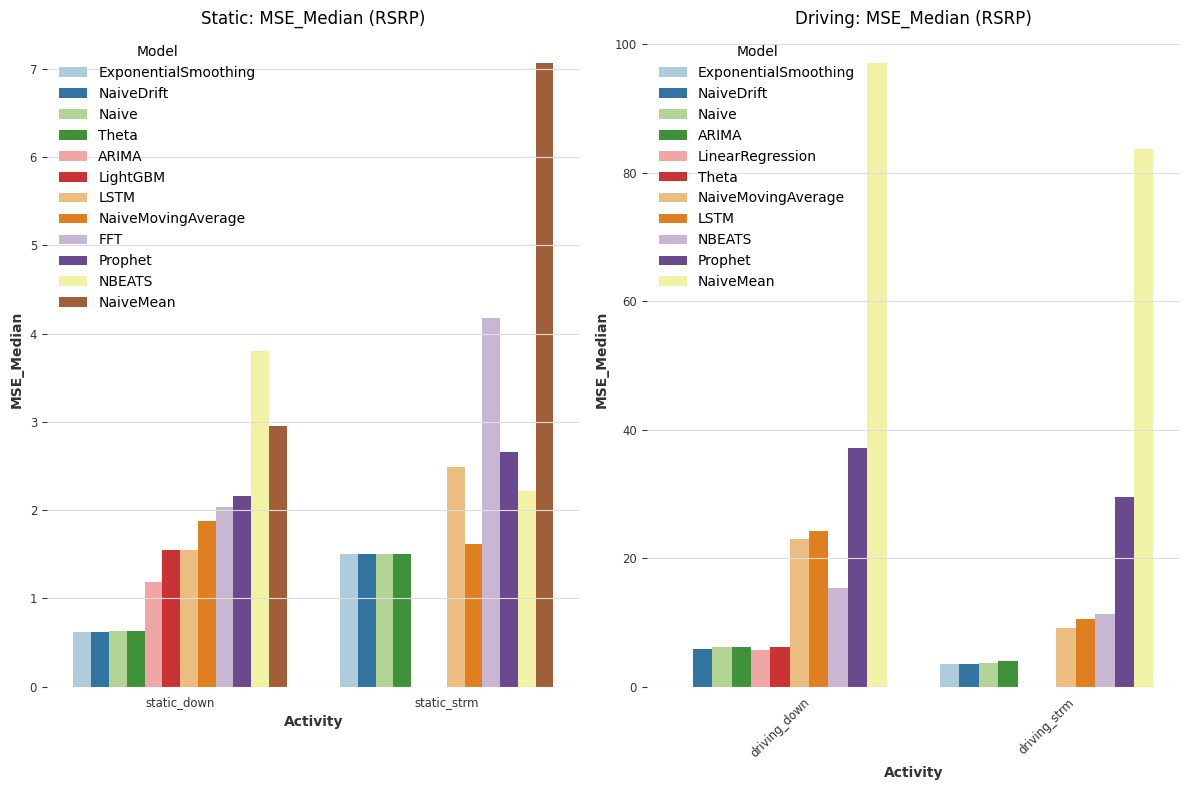

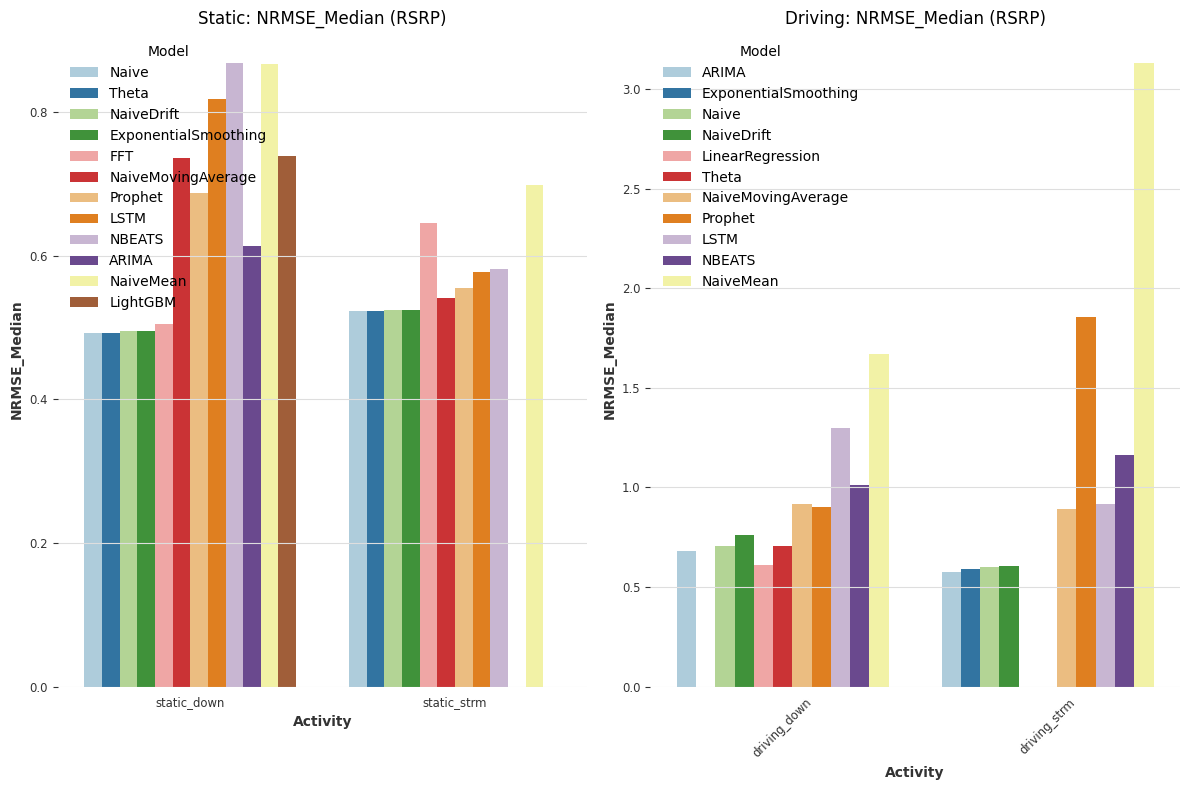

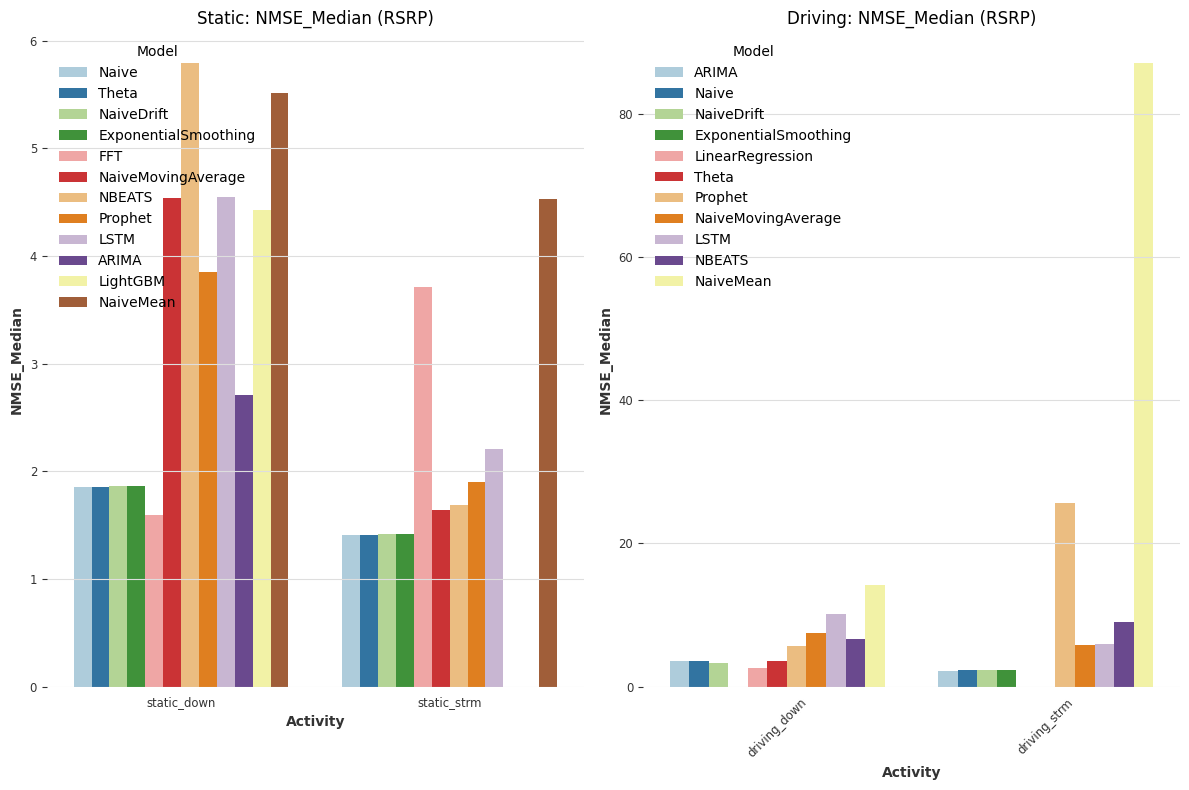

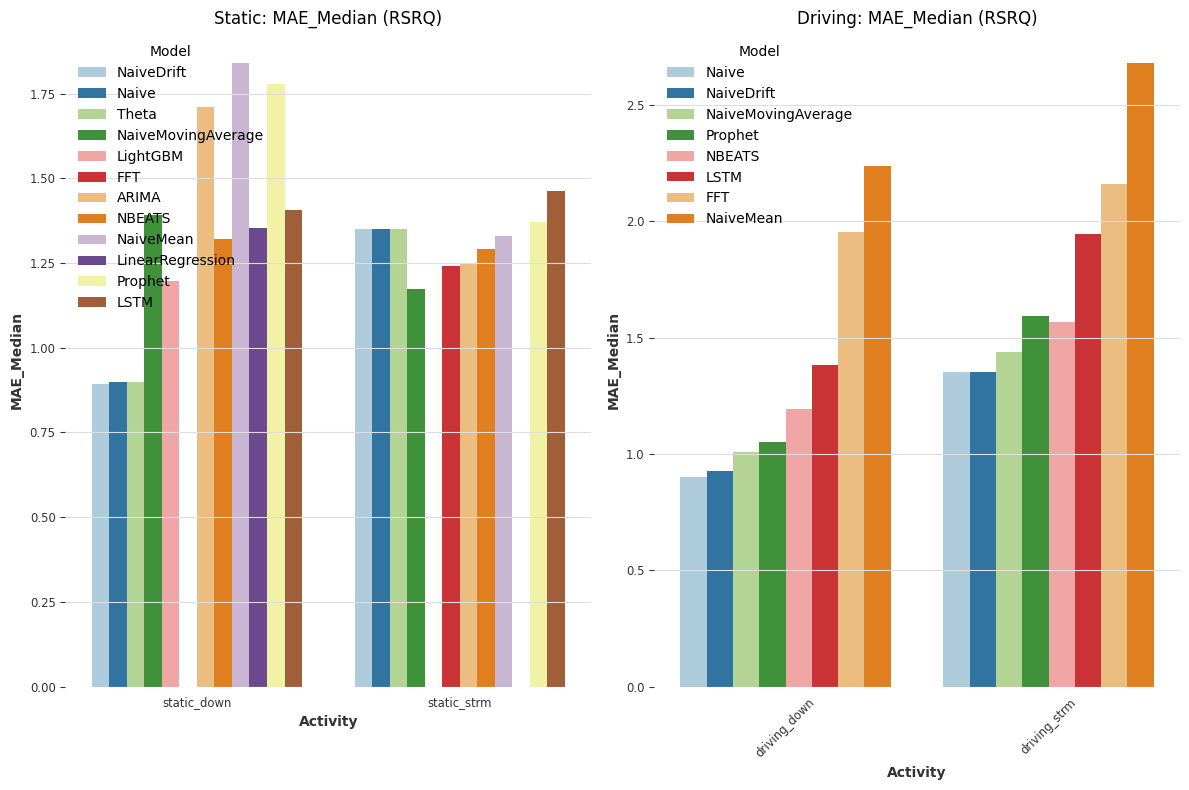

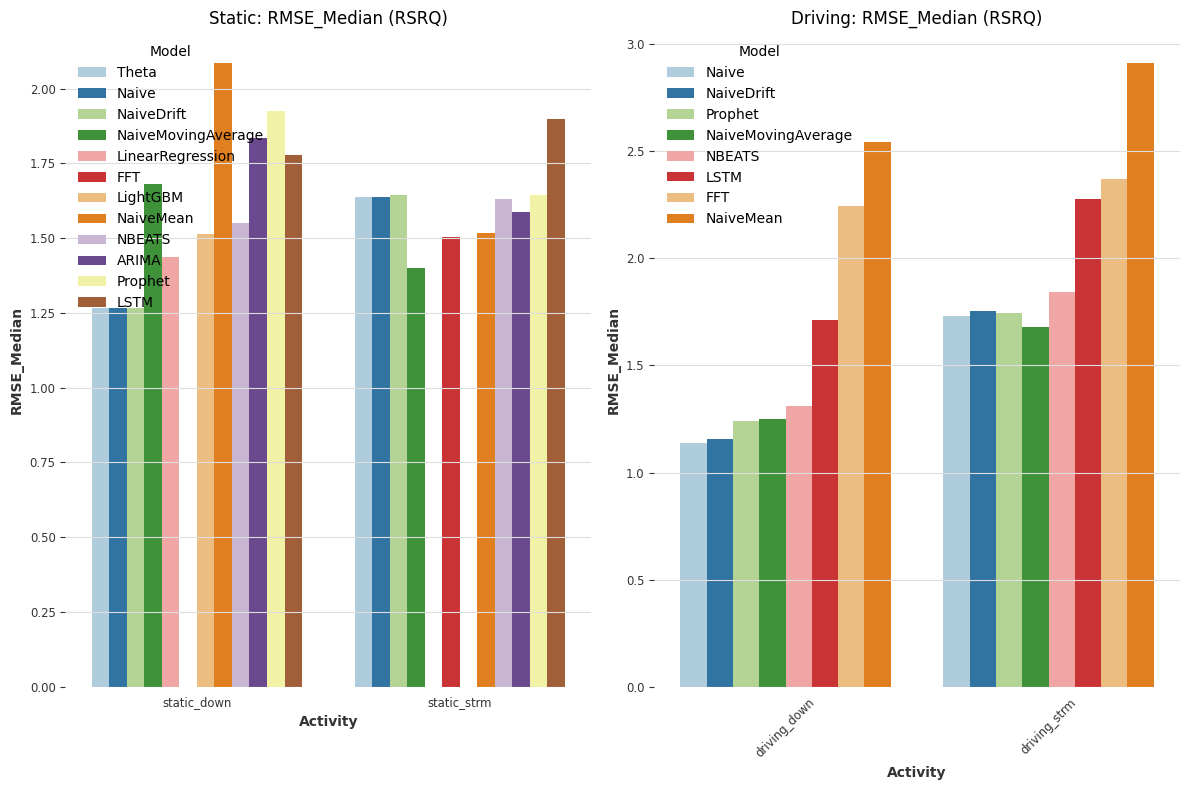

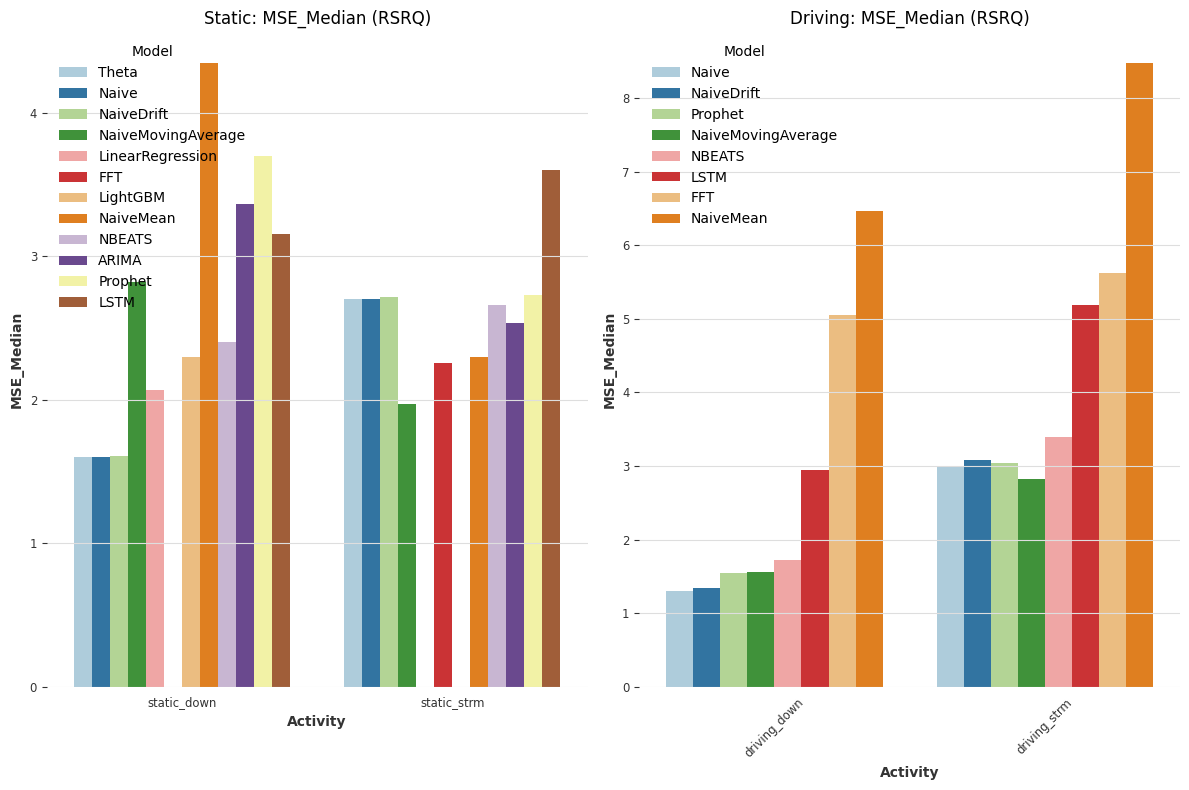

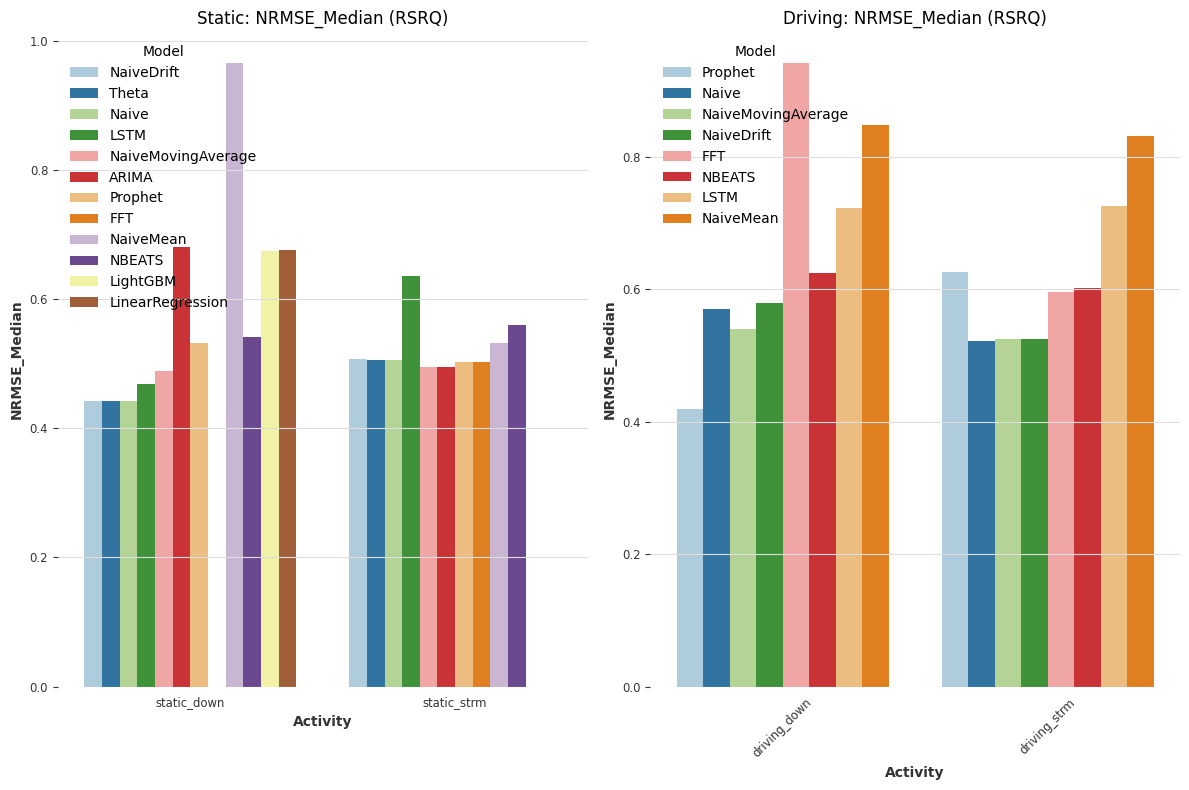

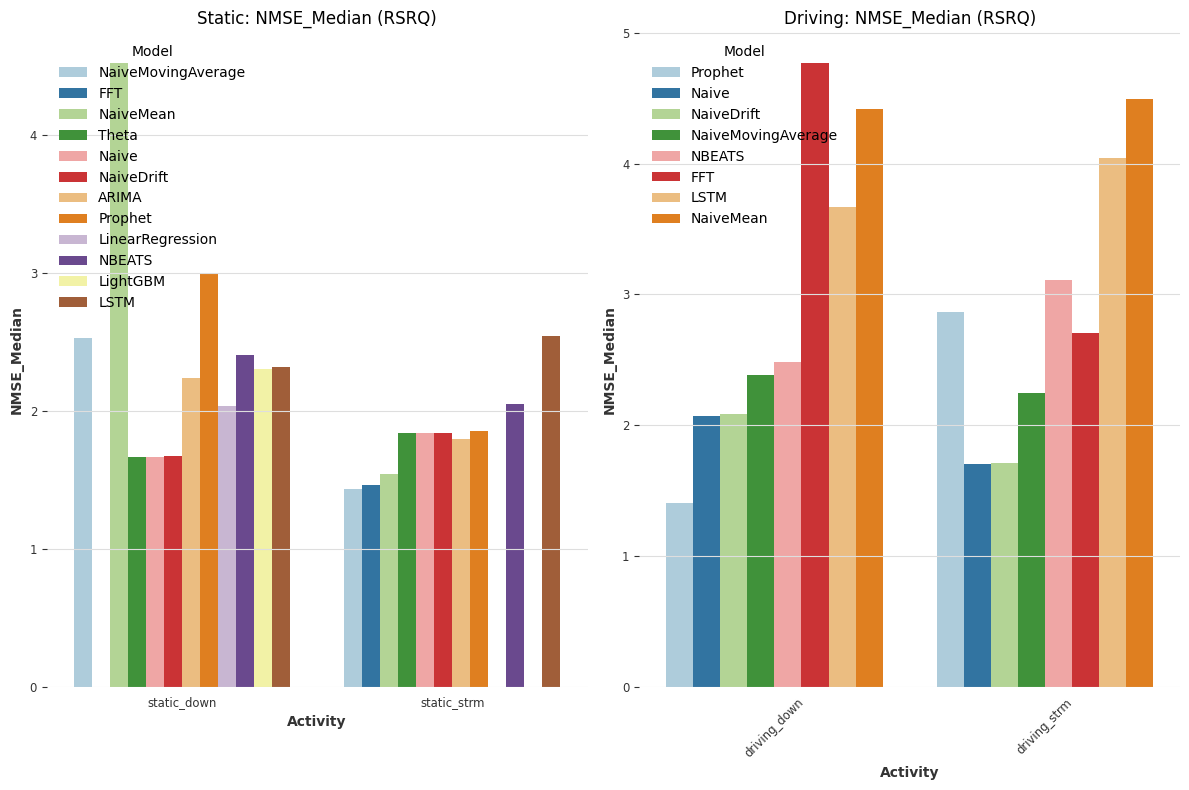

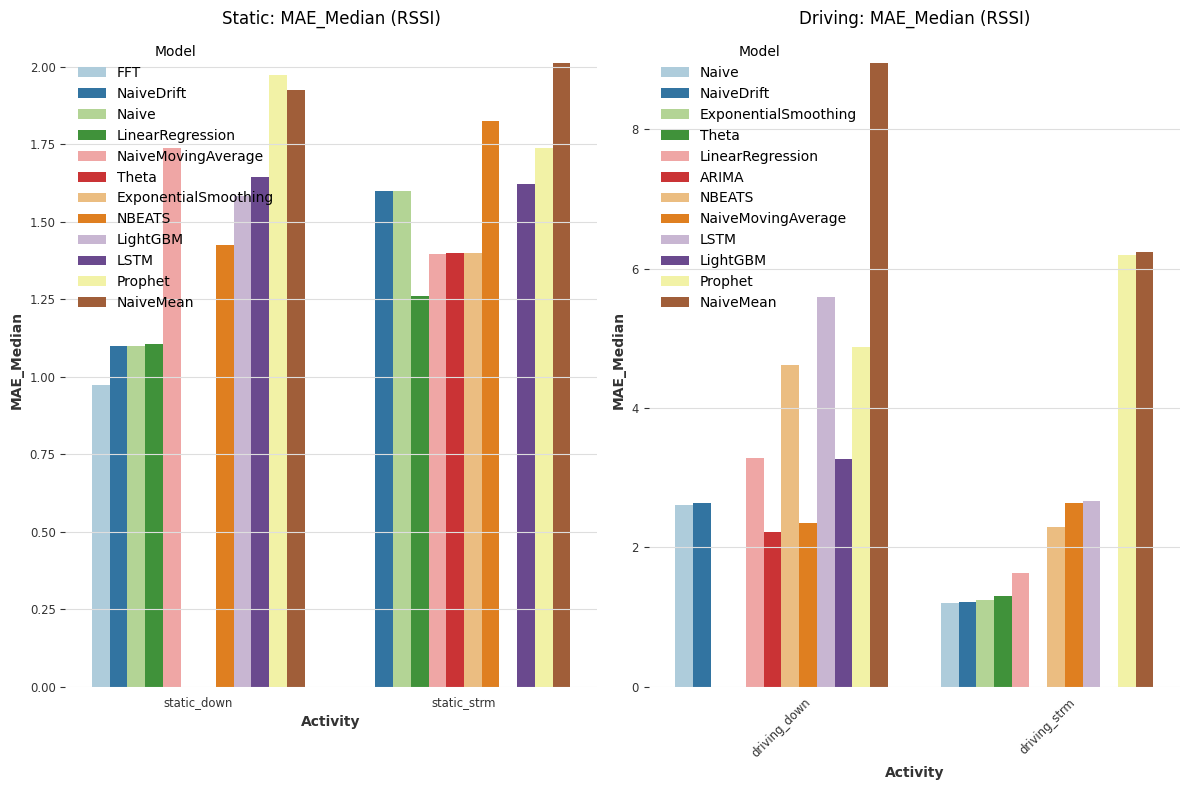

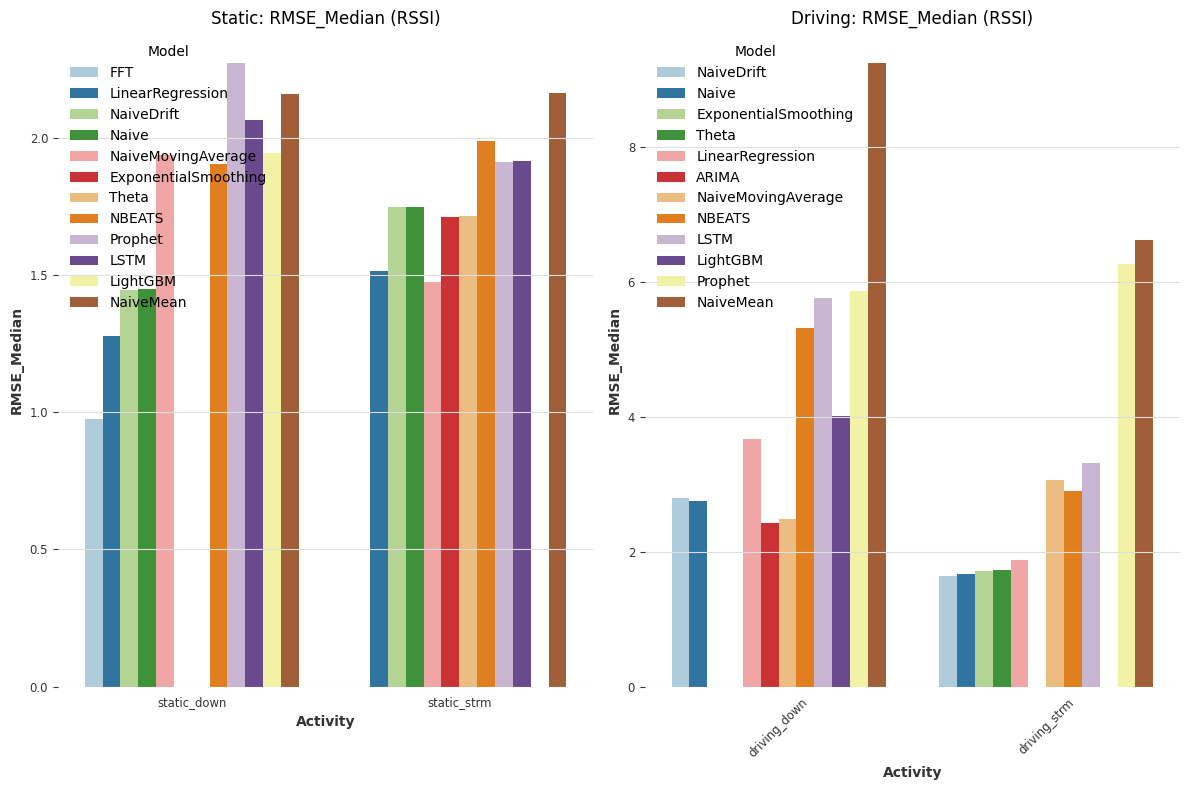

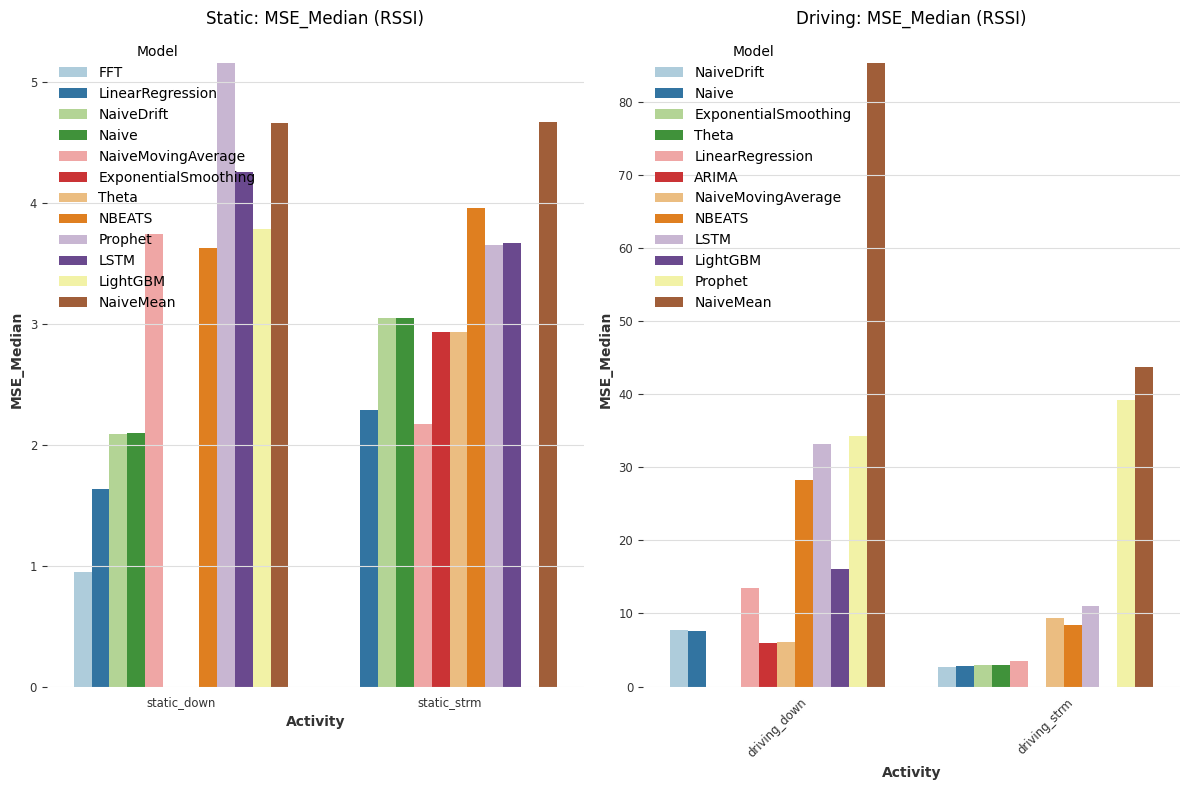

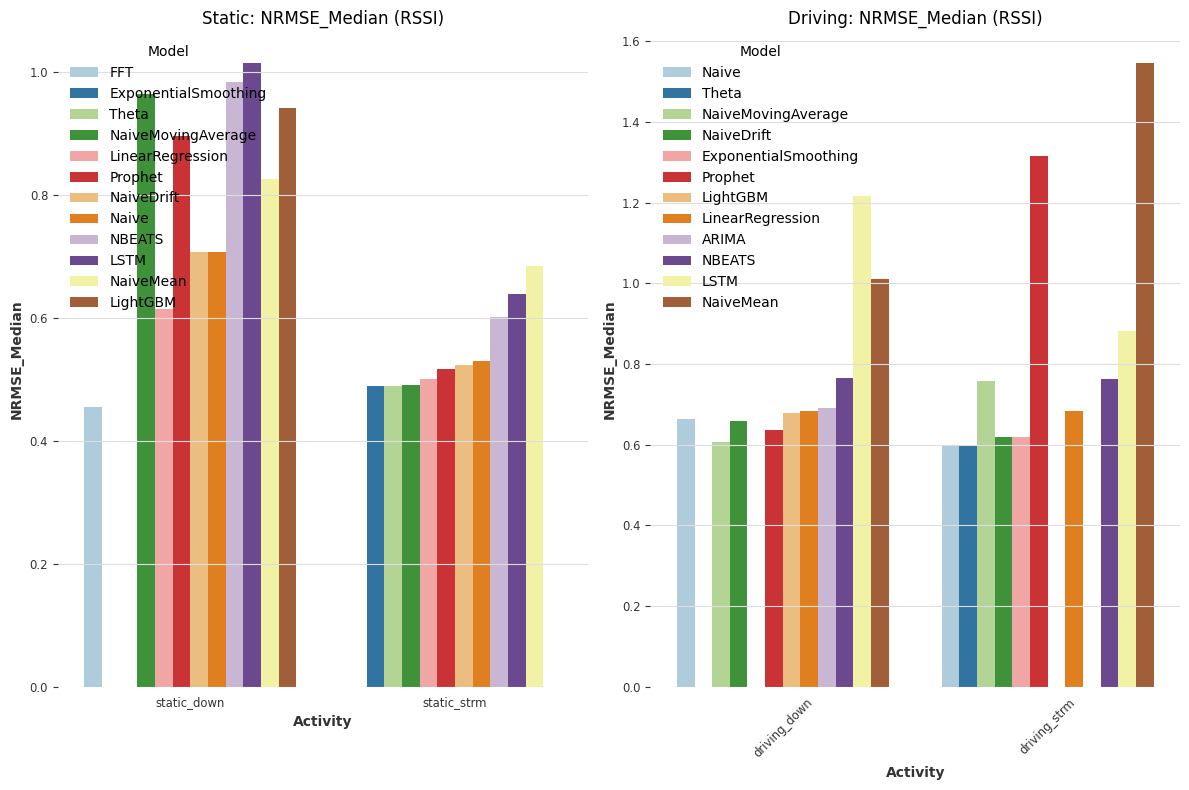

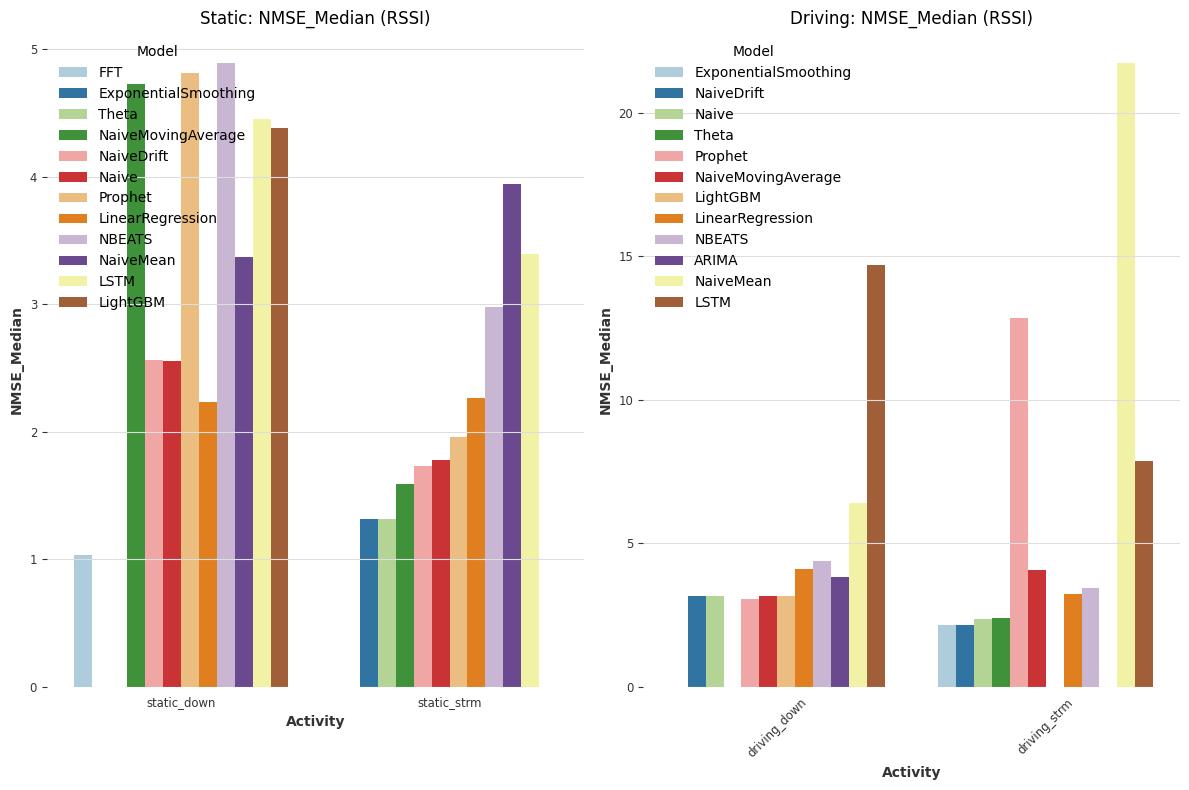

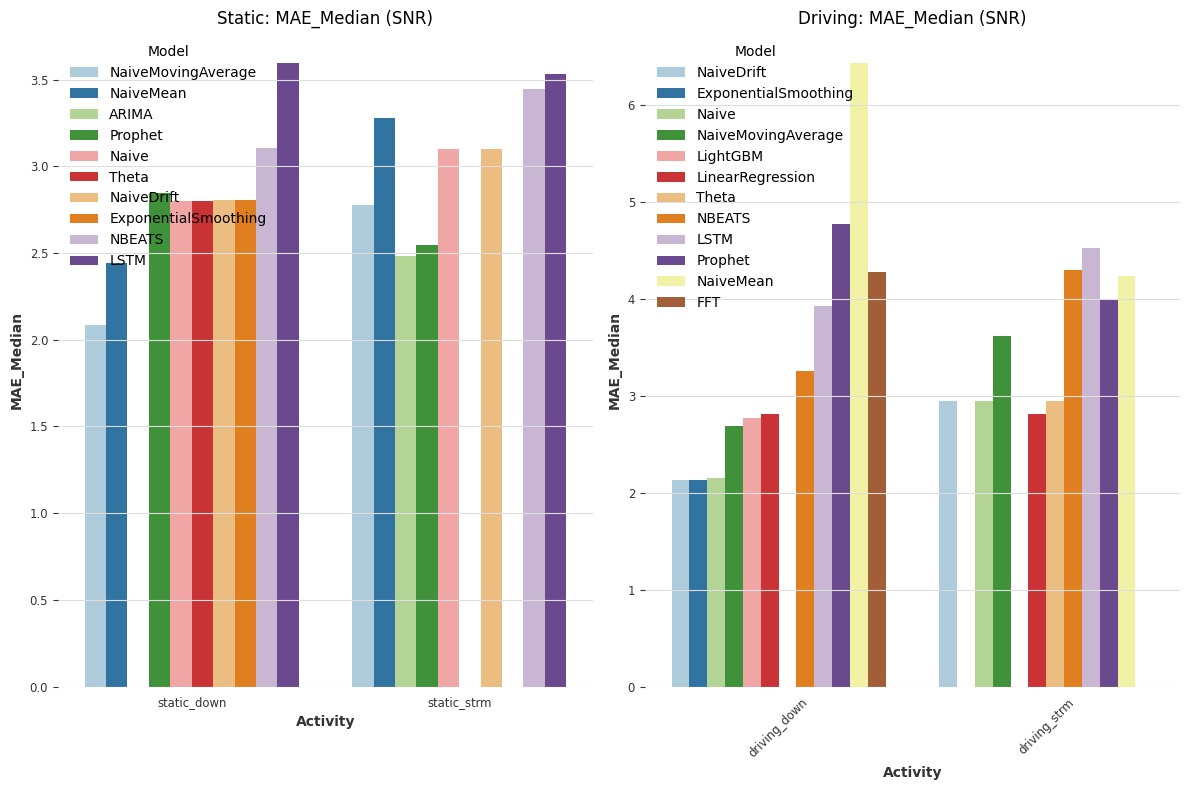

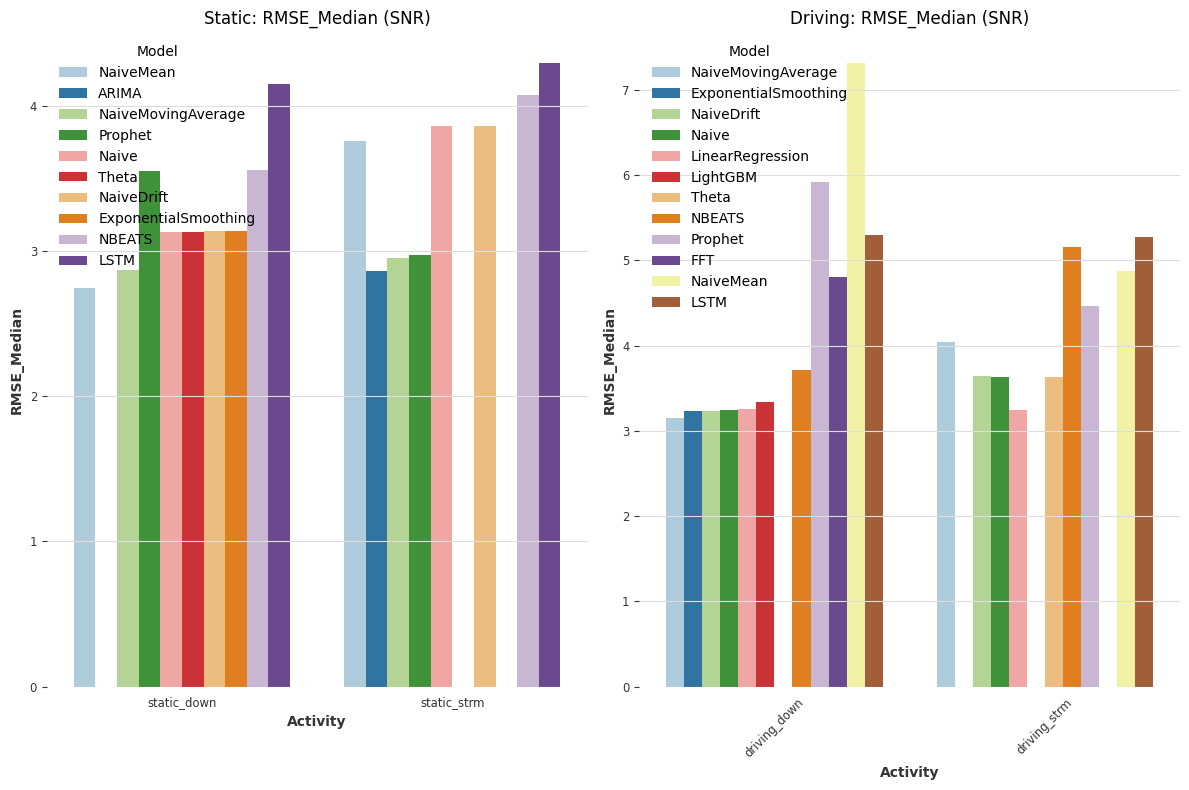

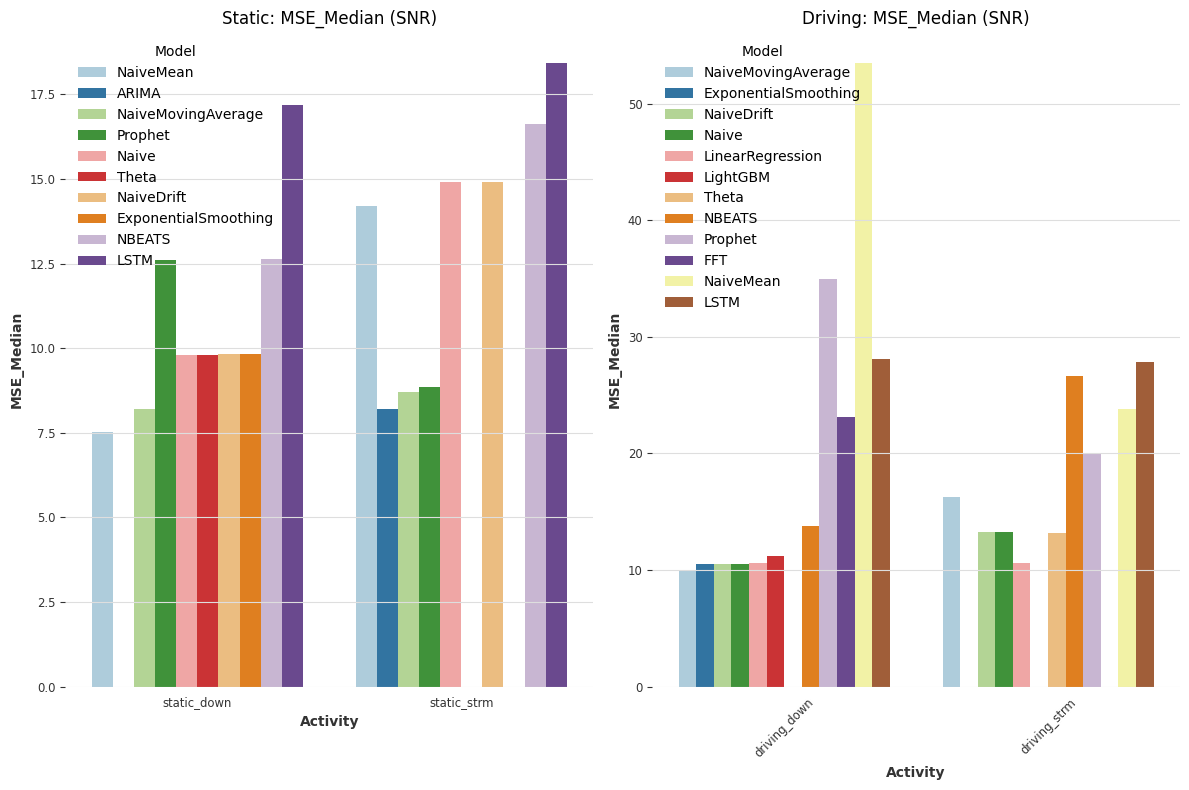

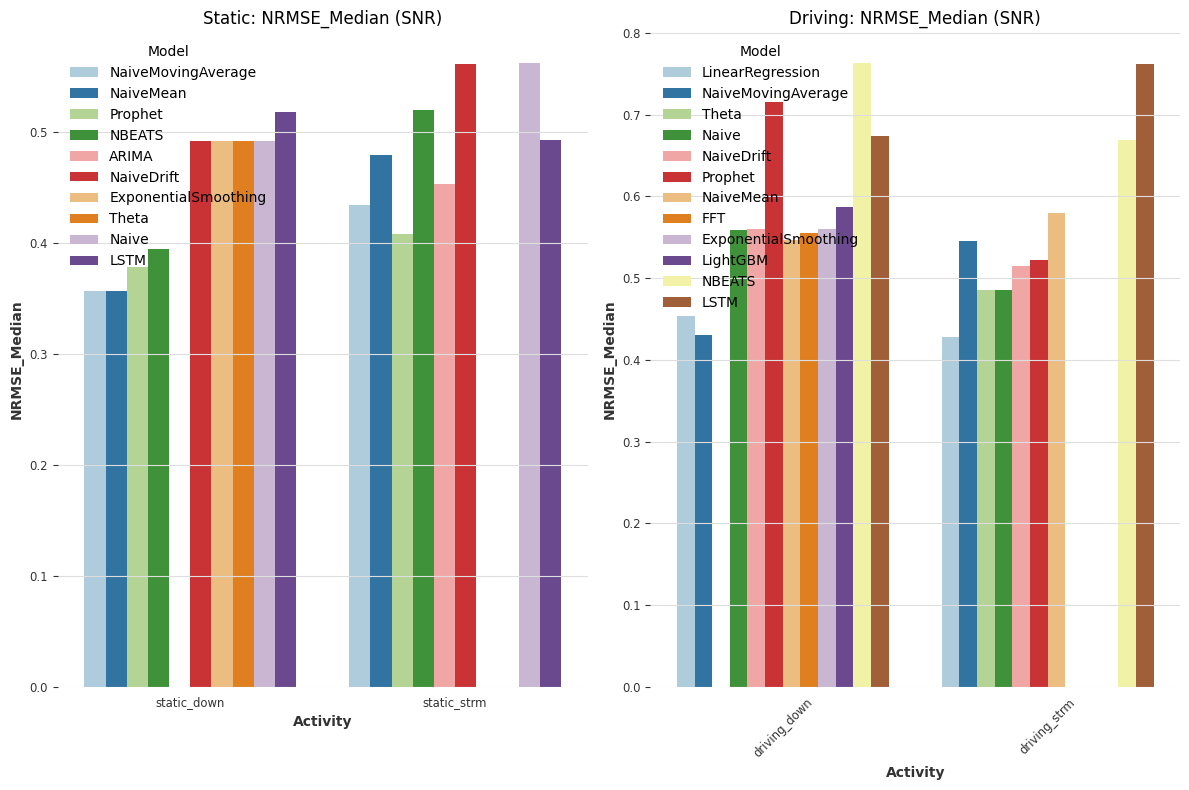

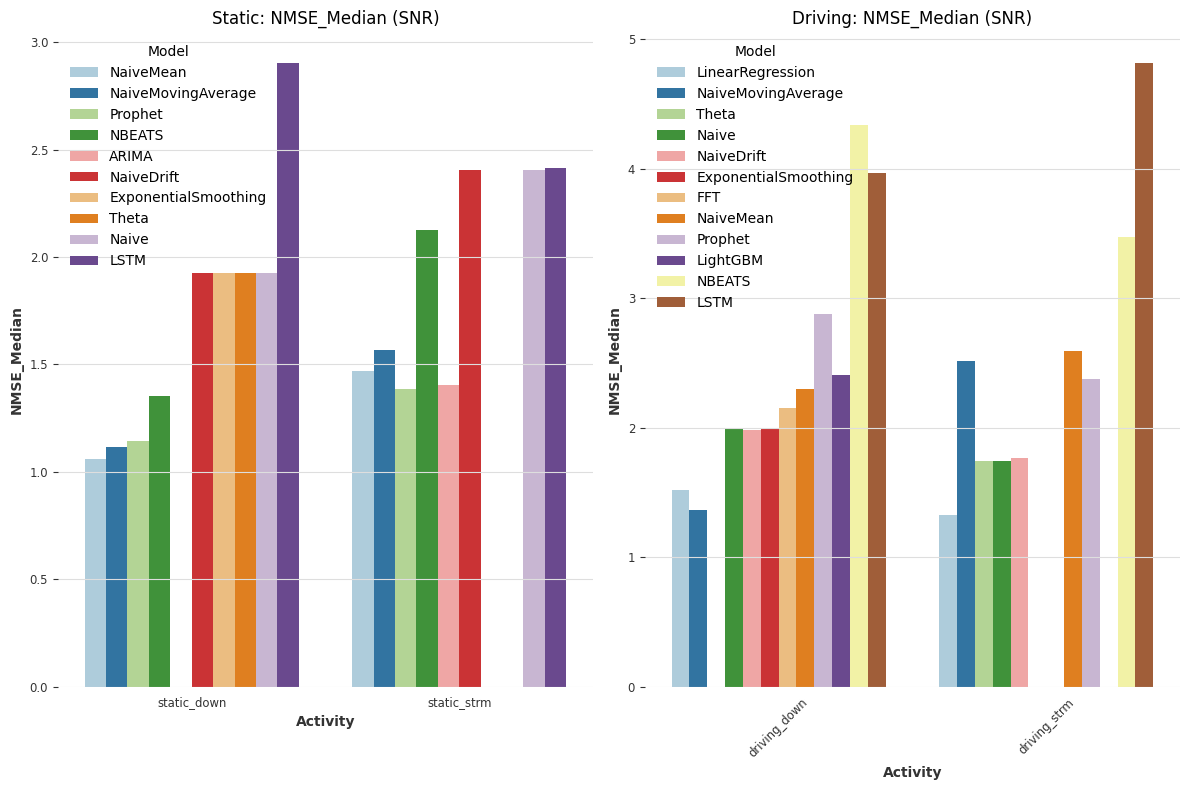

In [ ]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

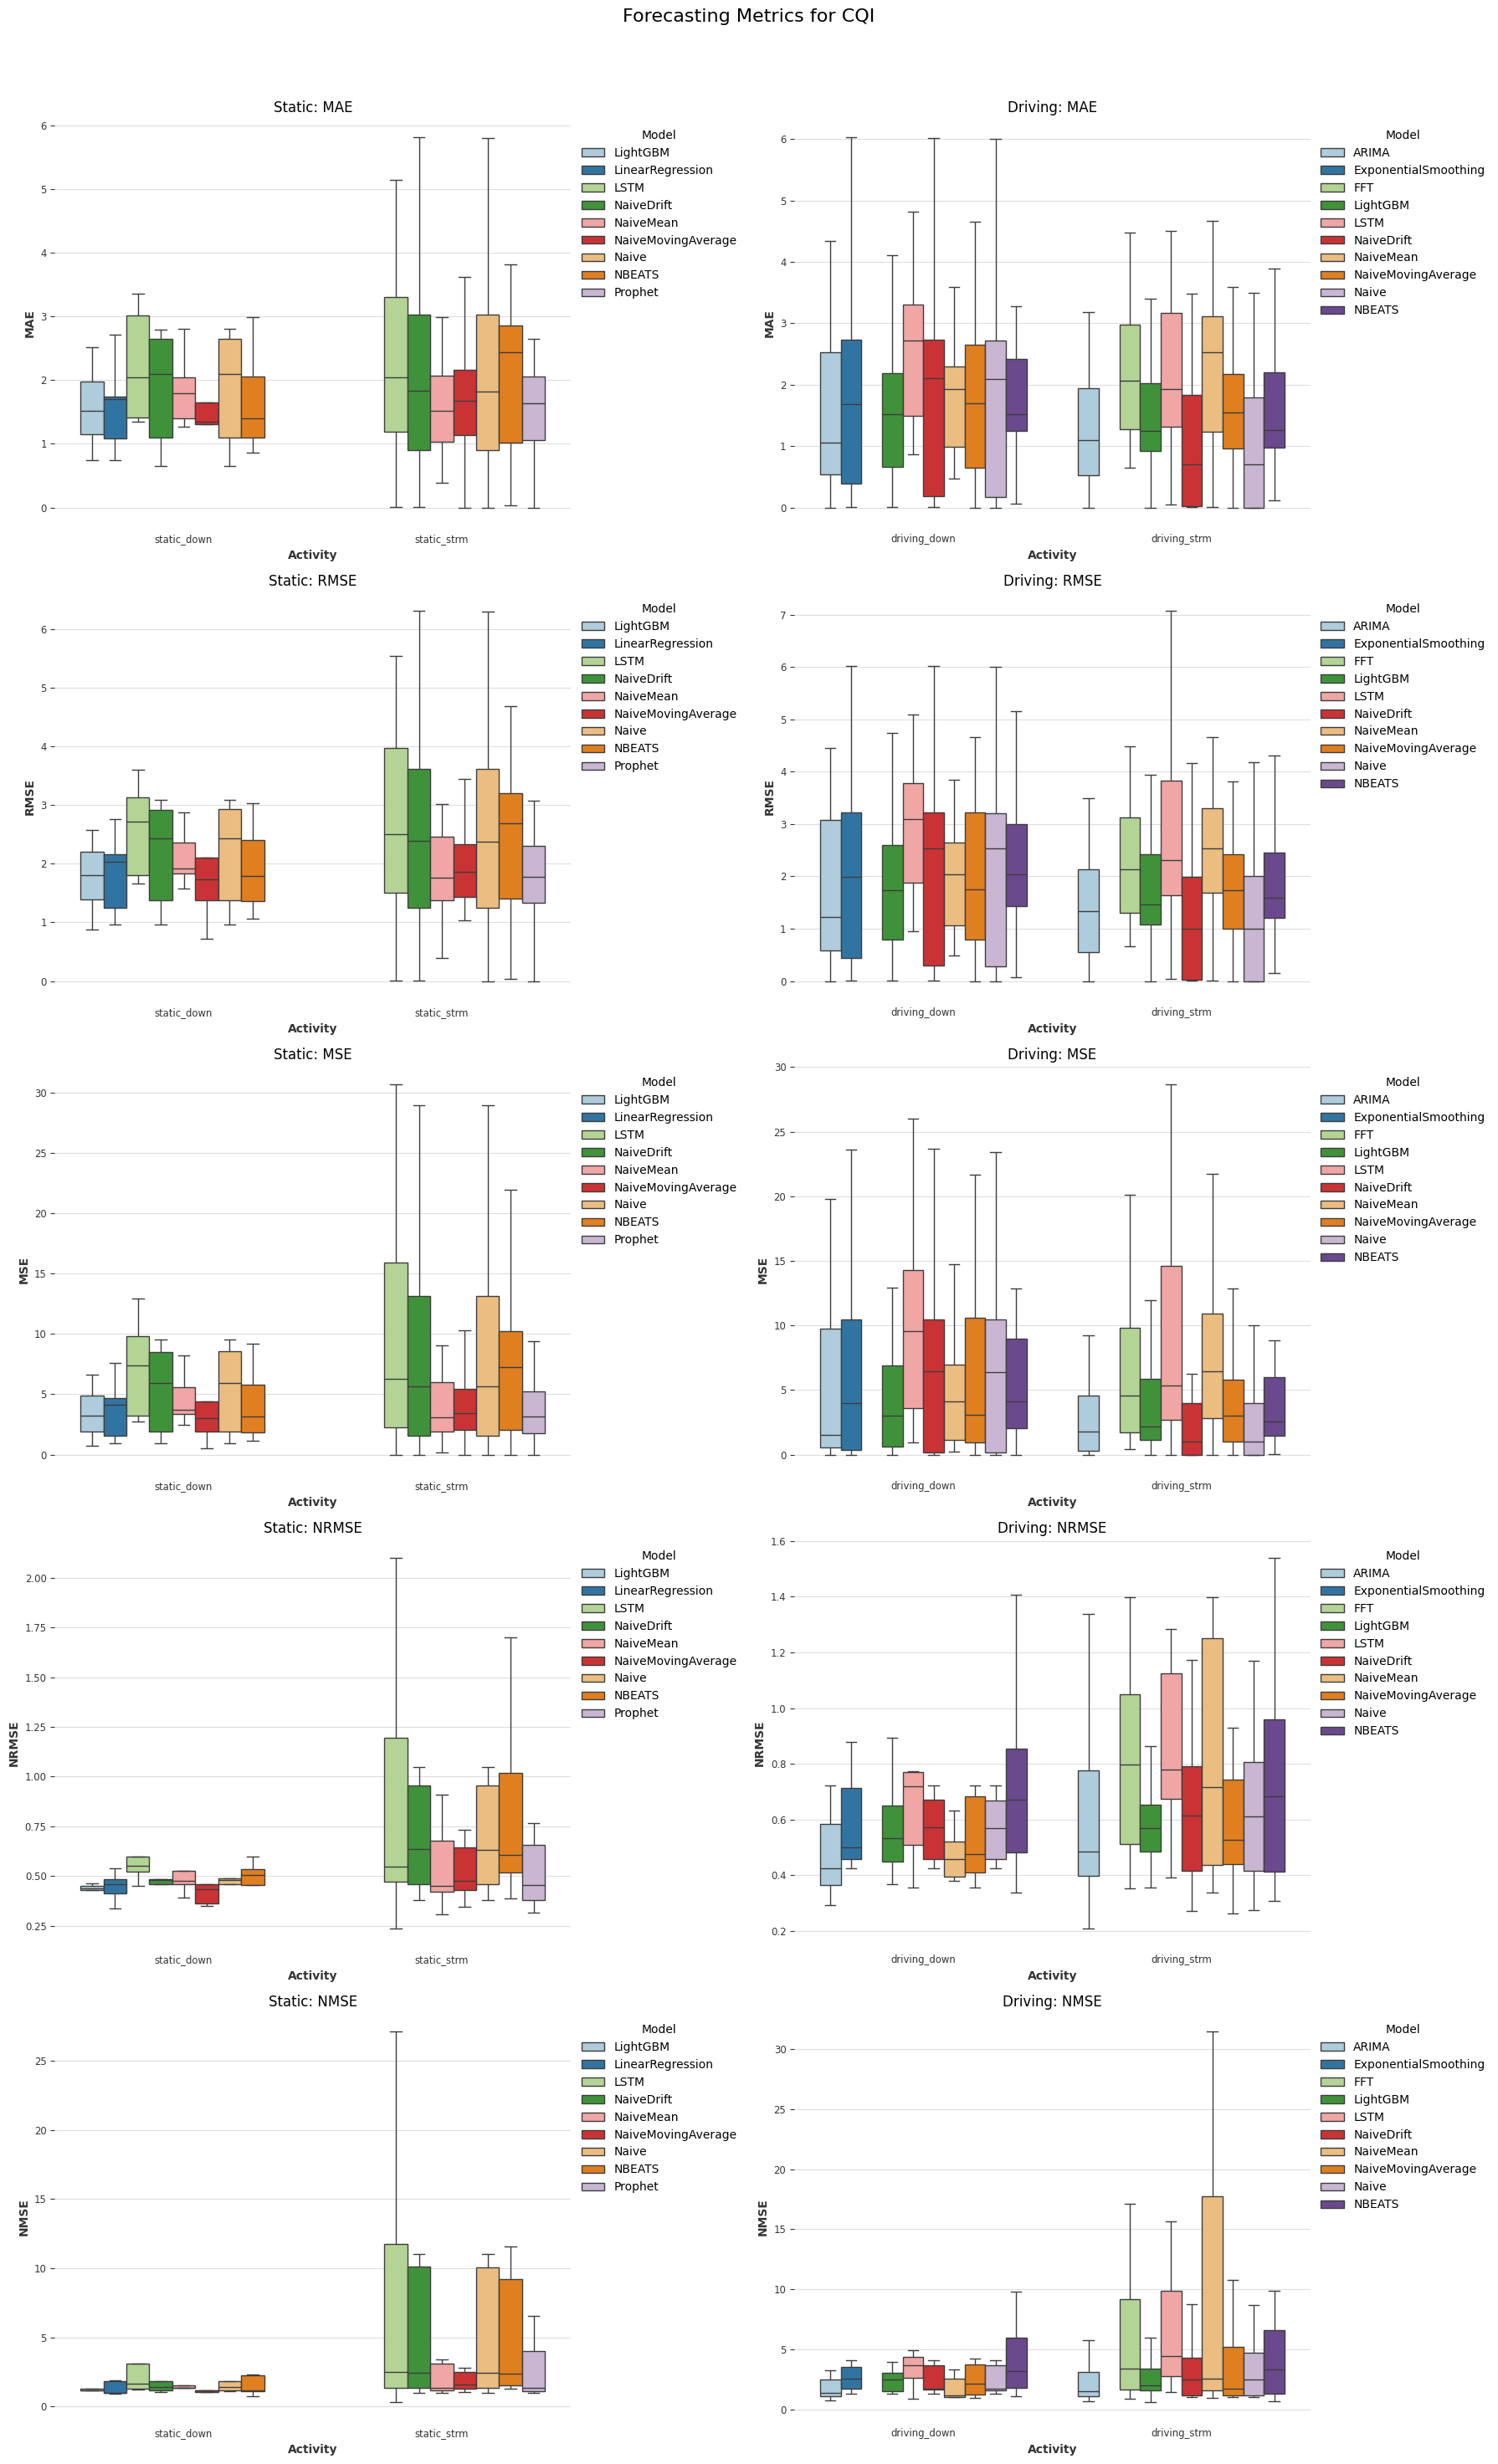

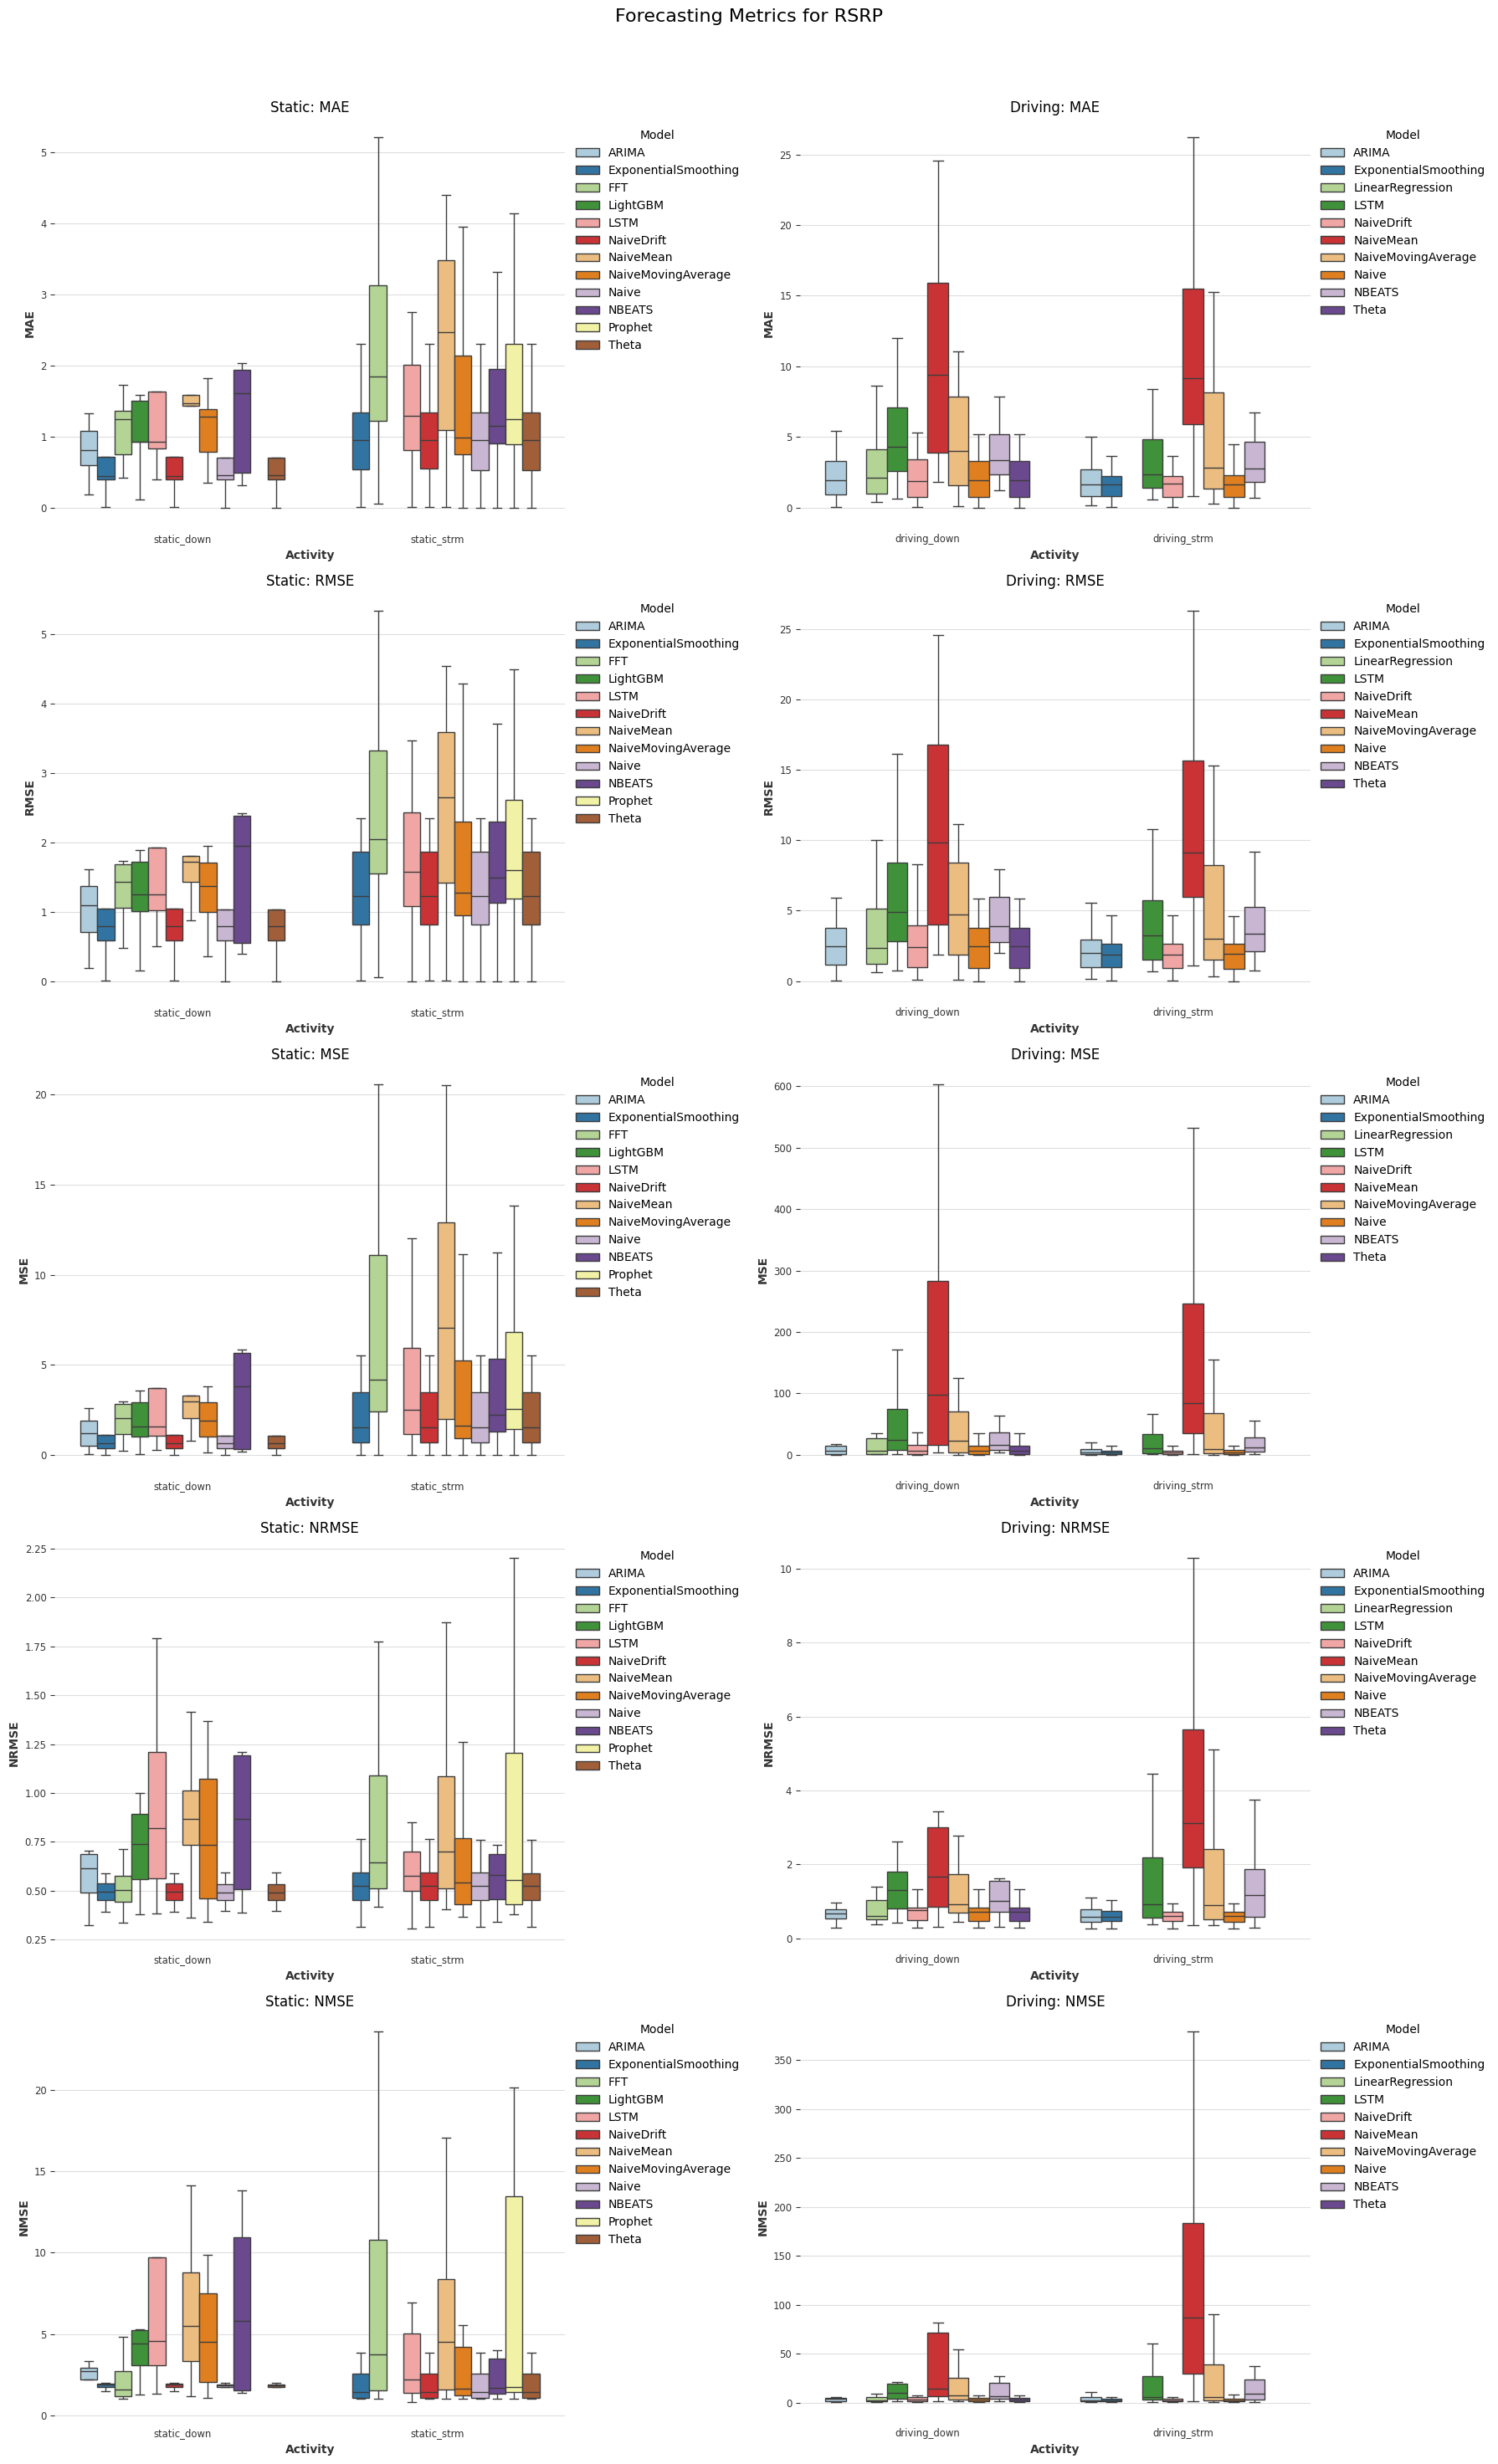

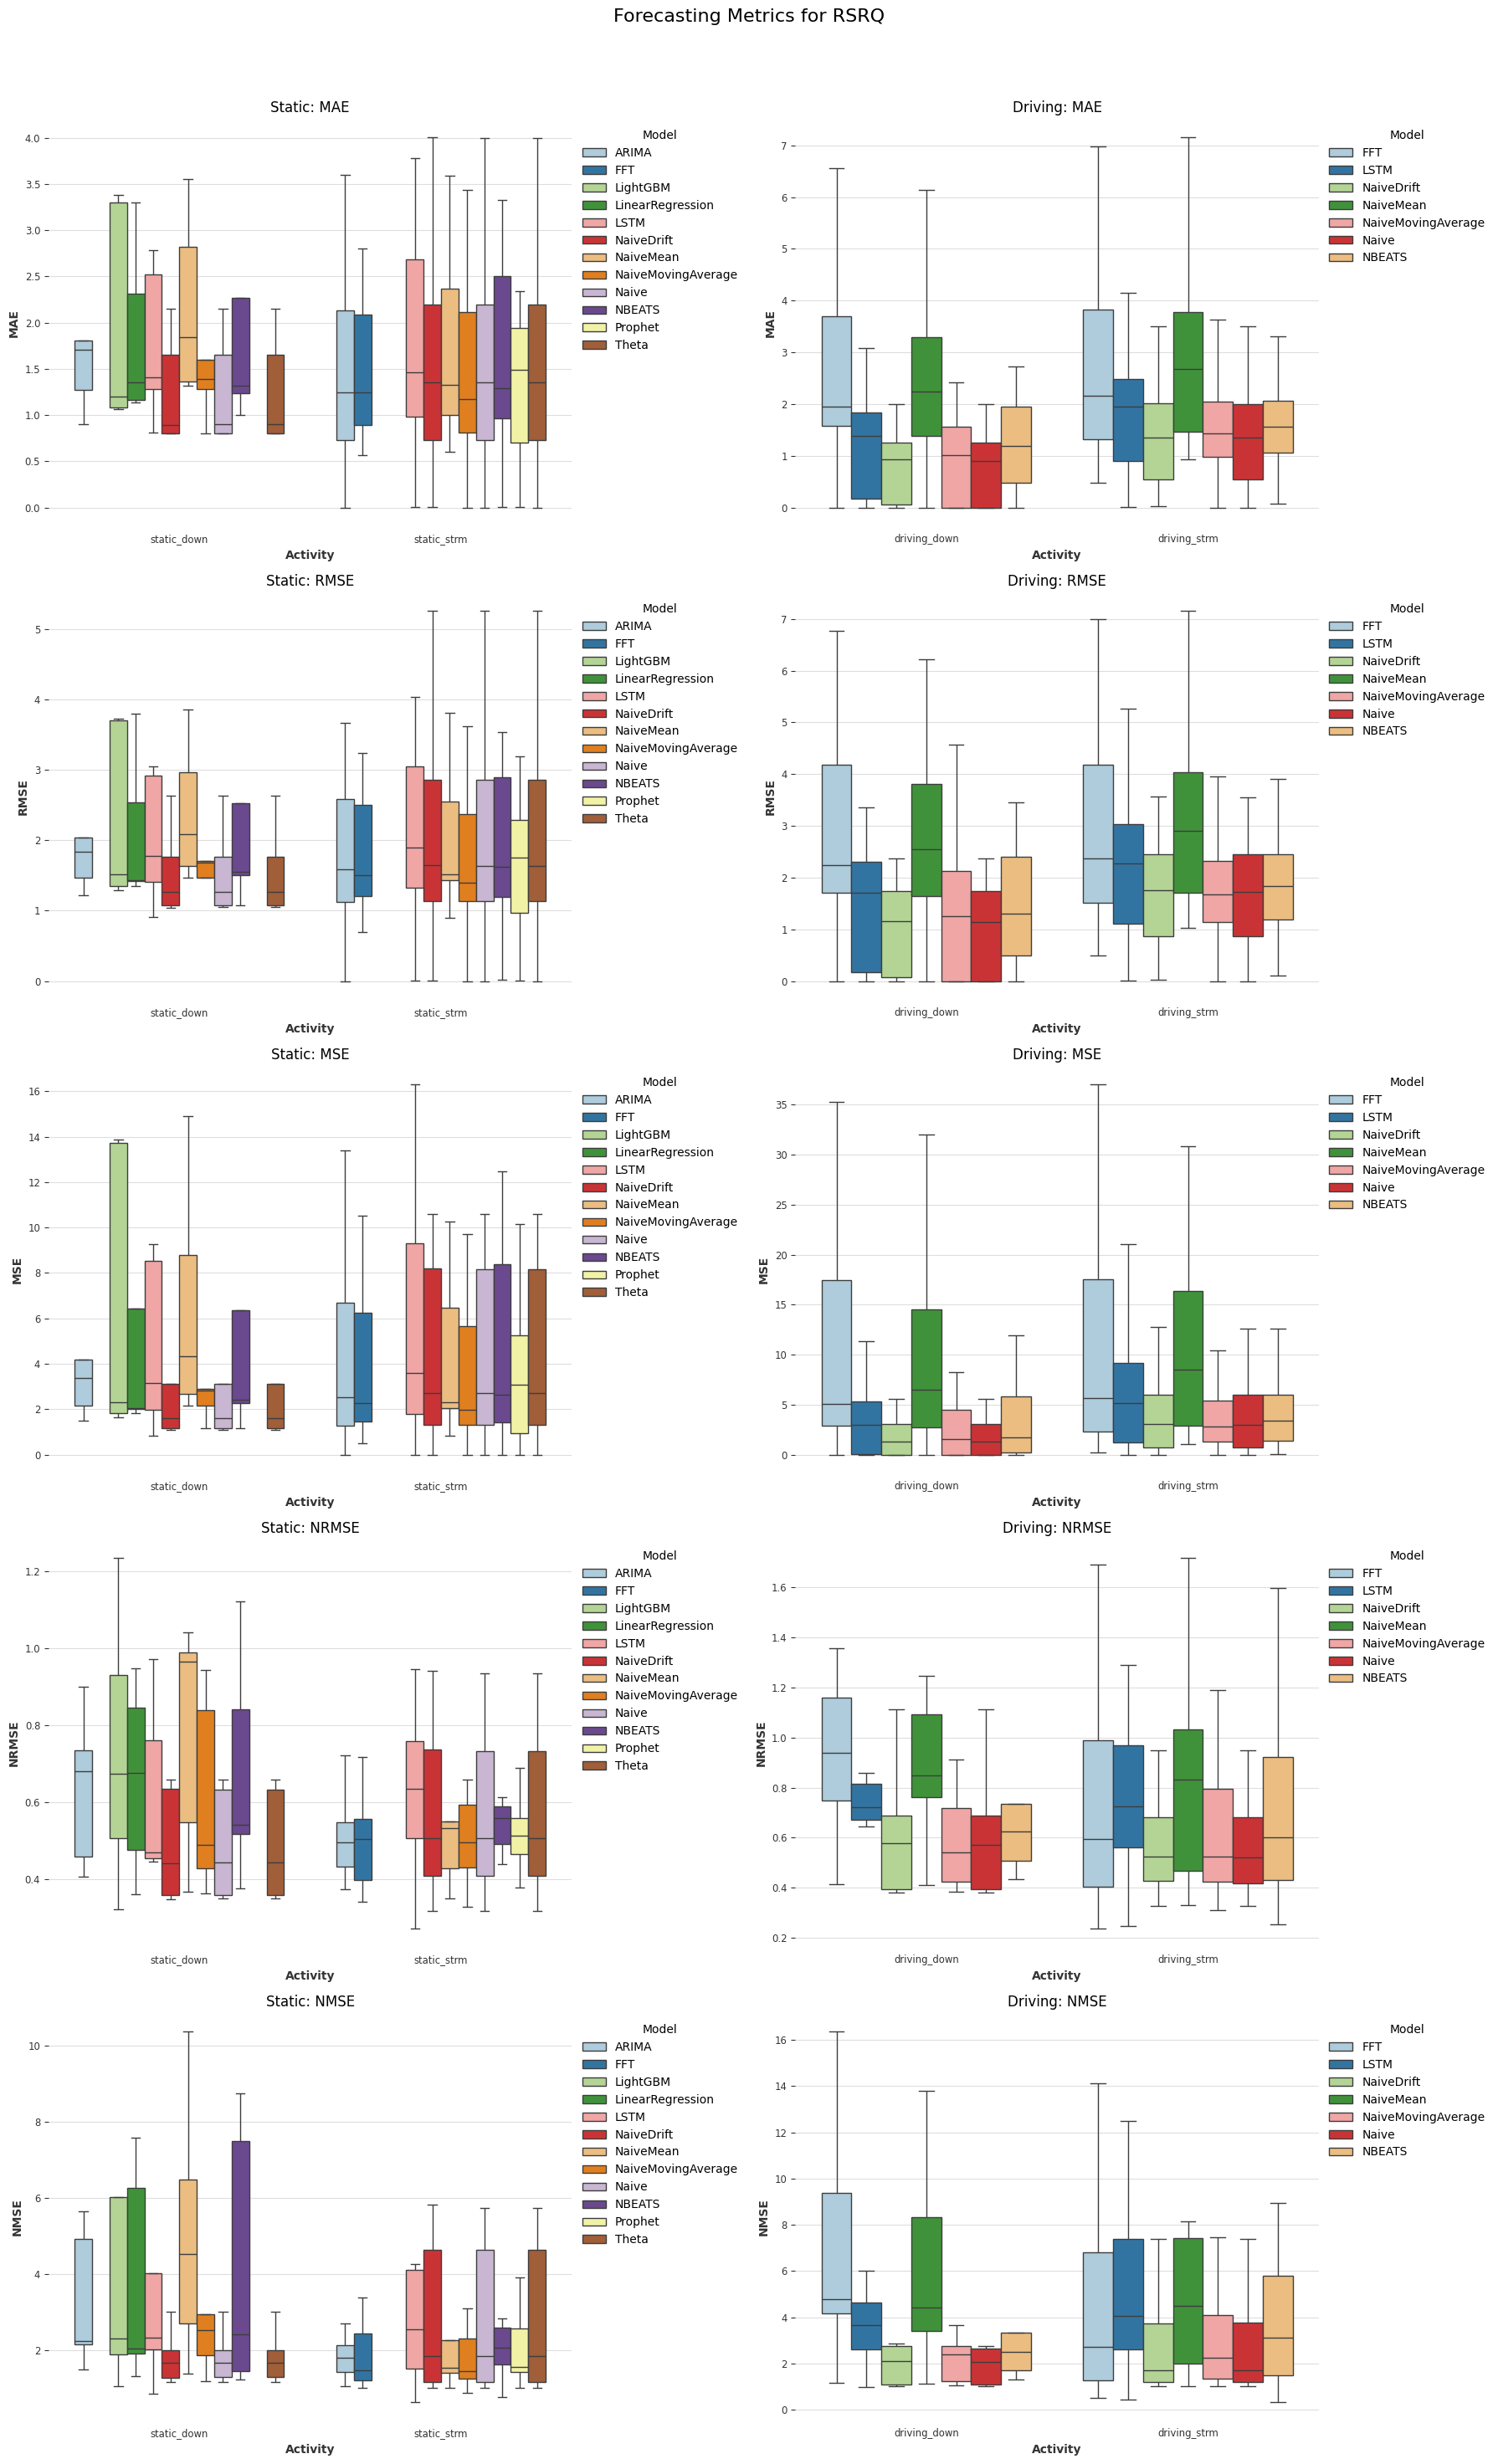

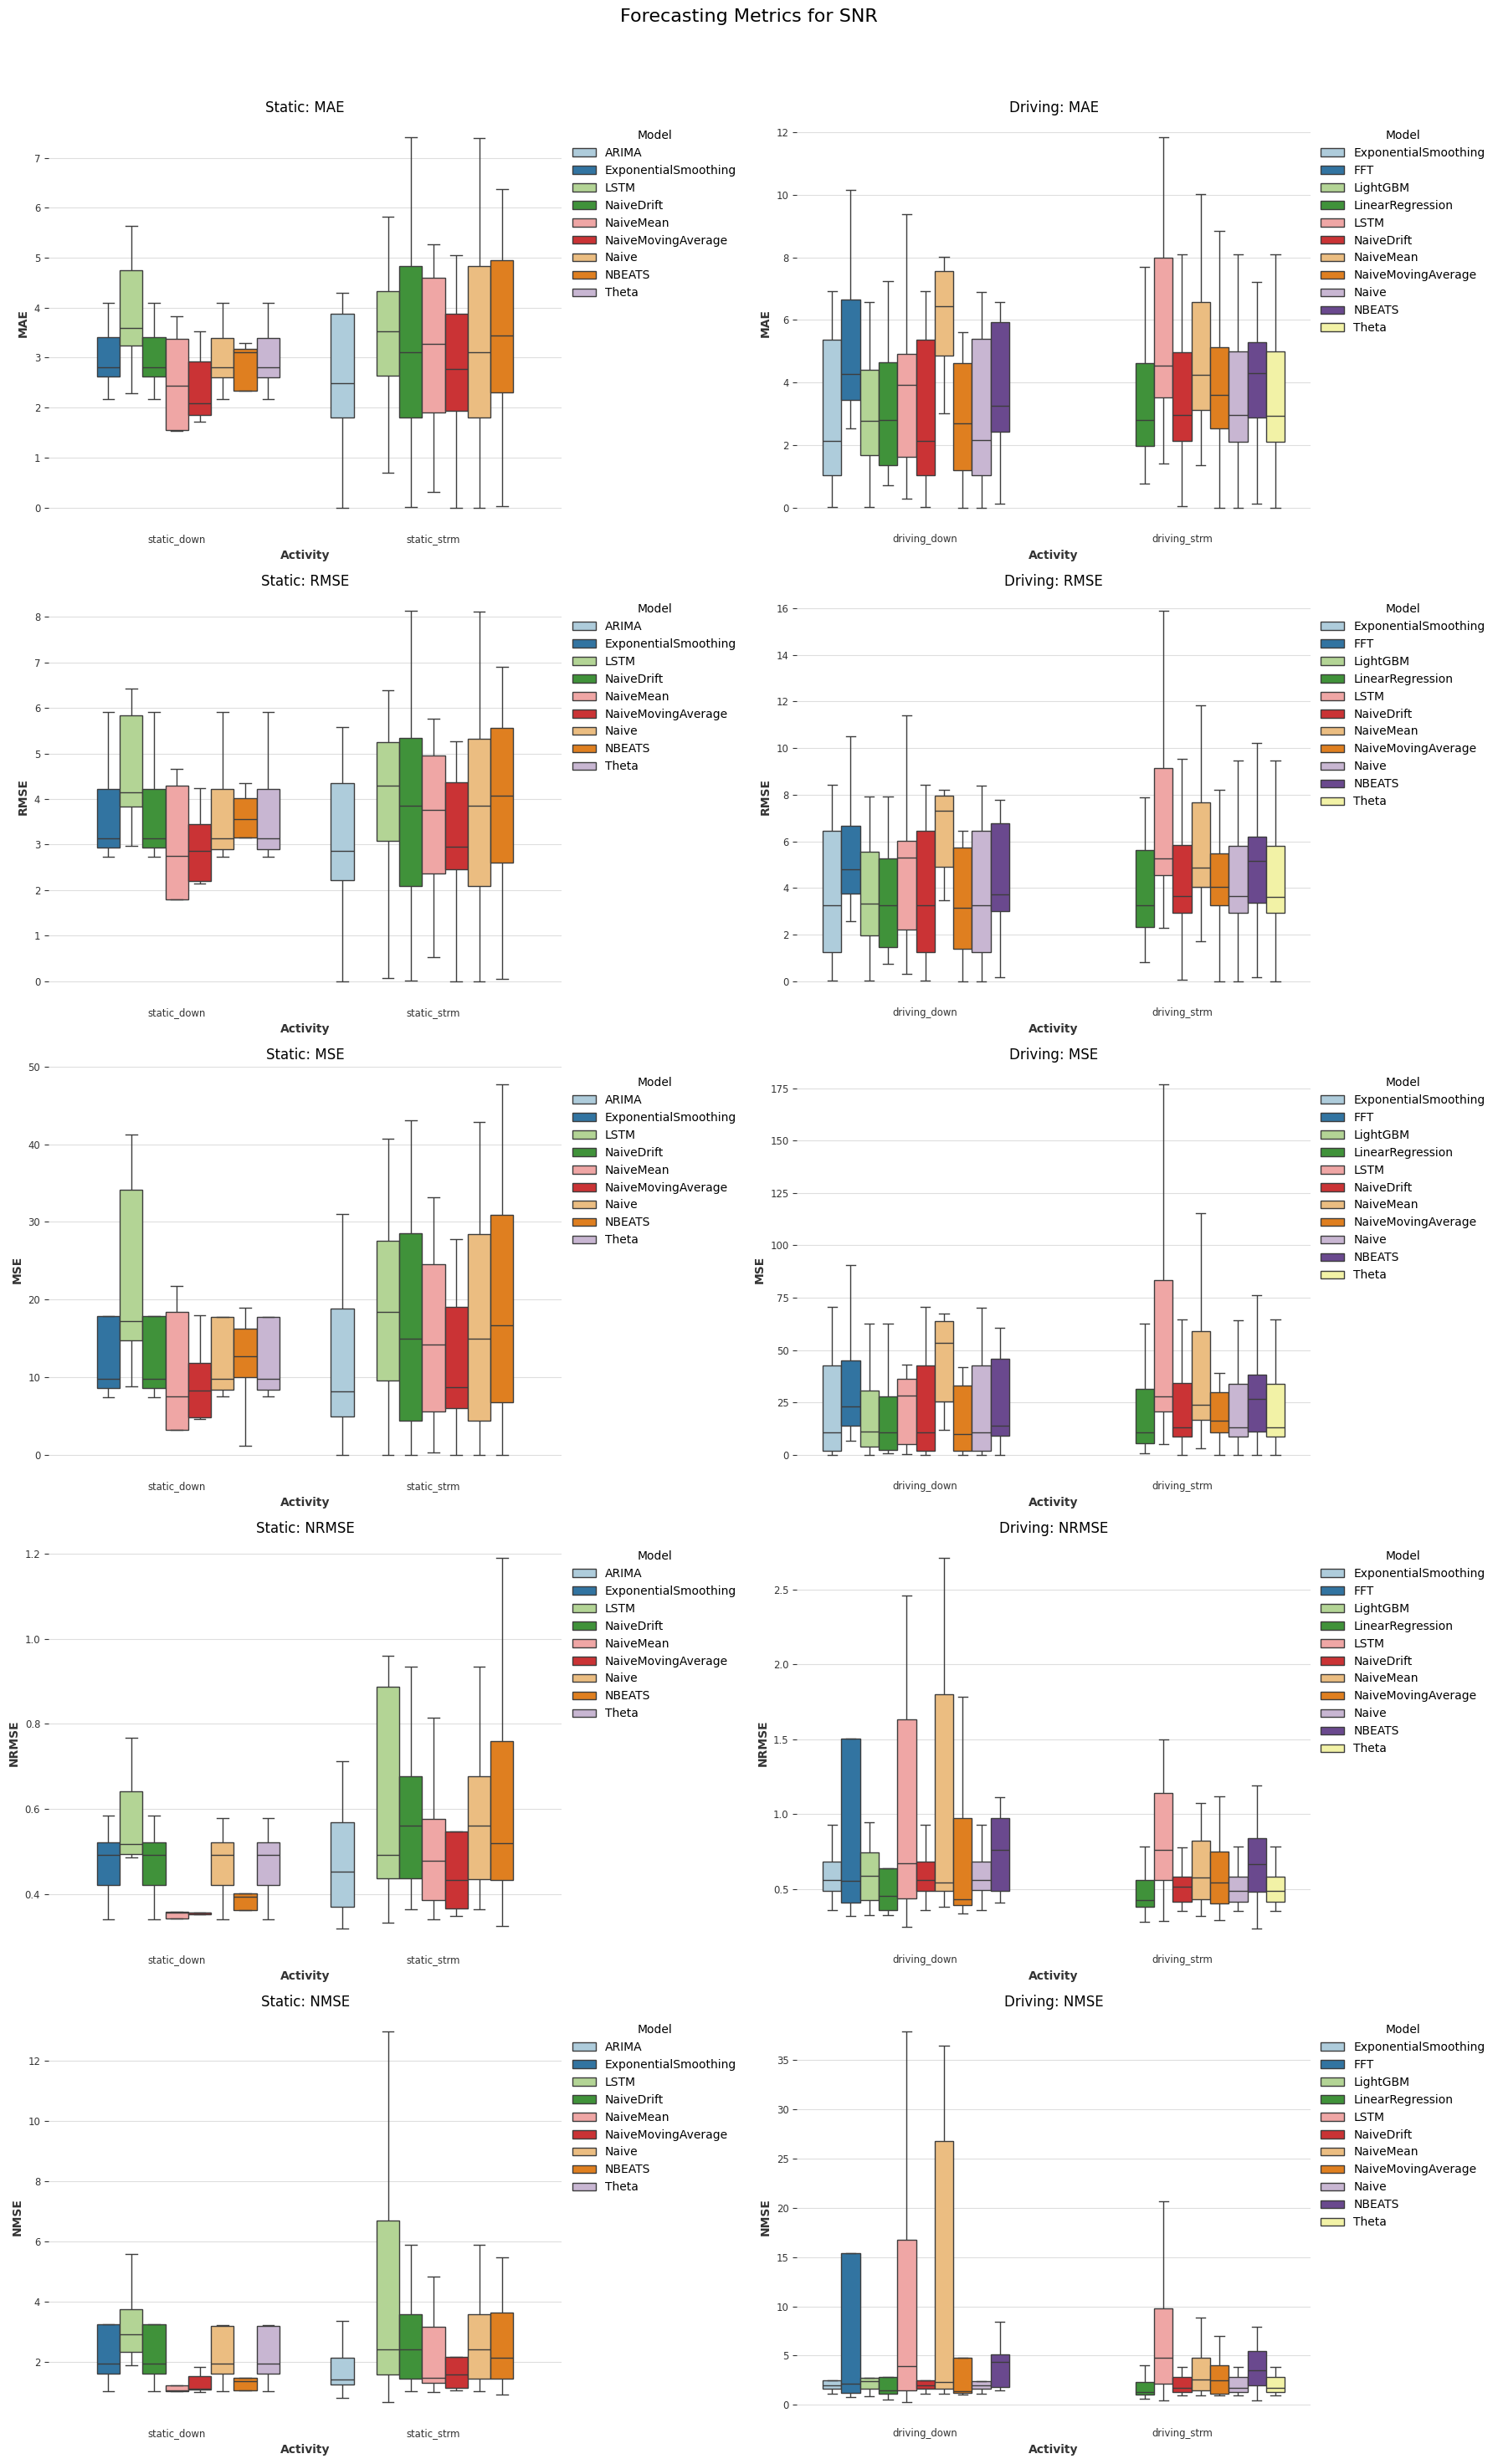

In [32]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

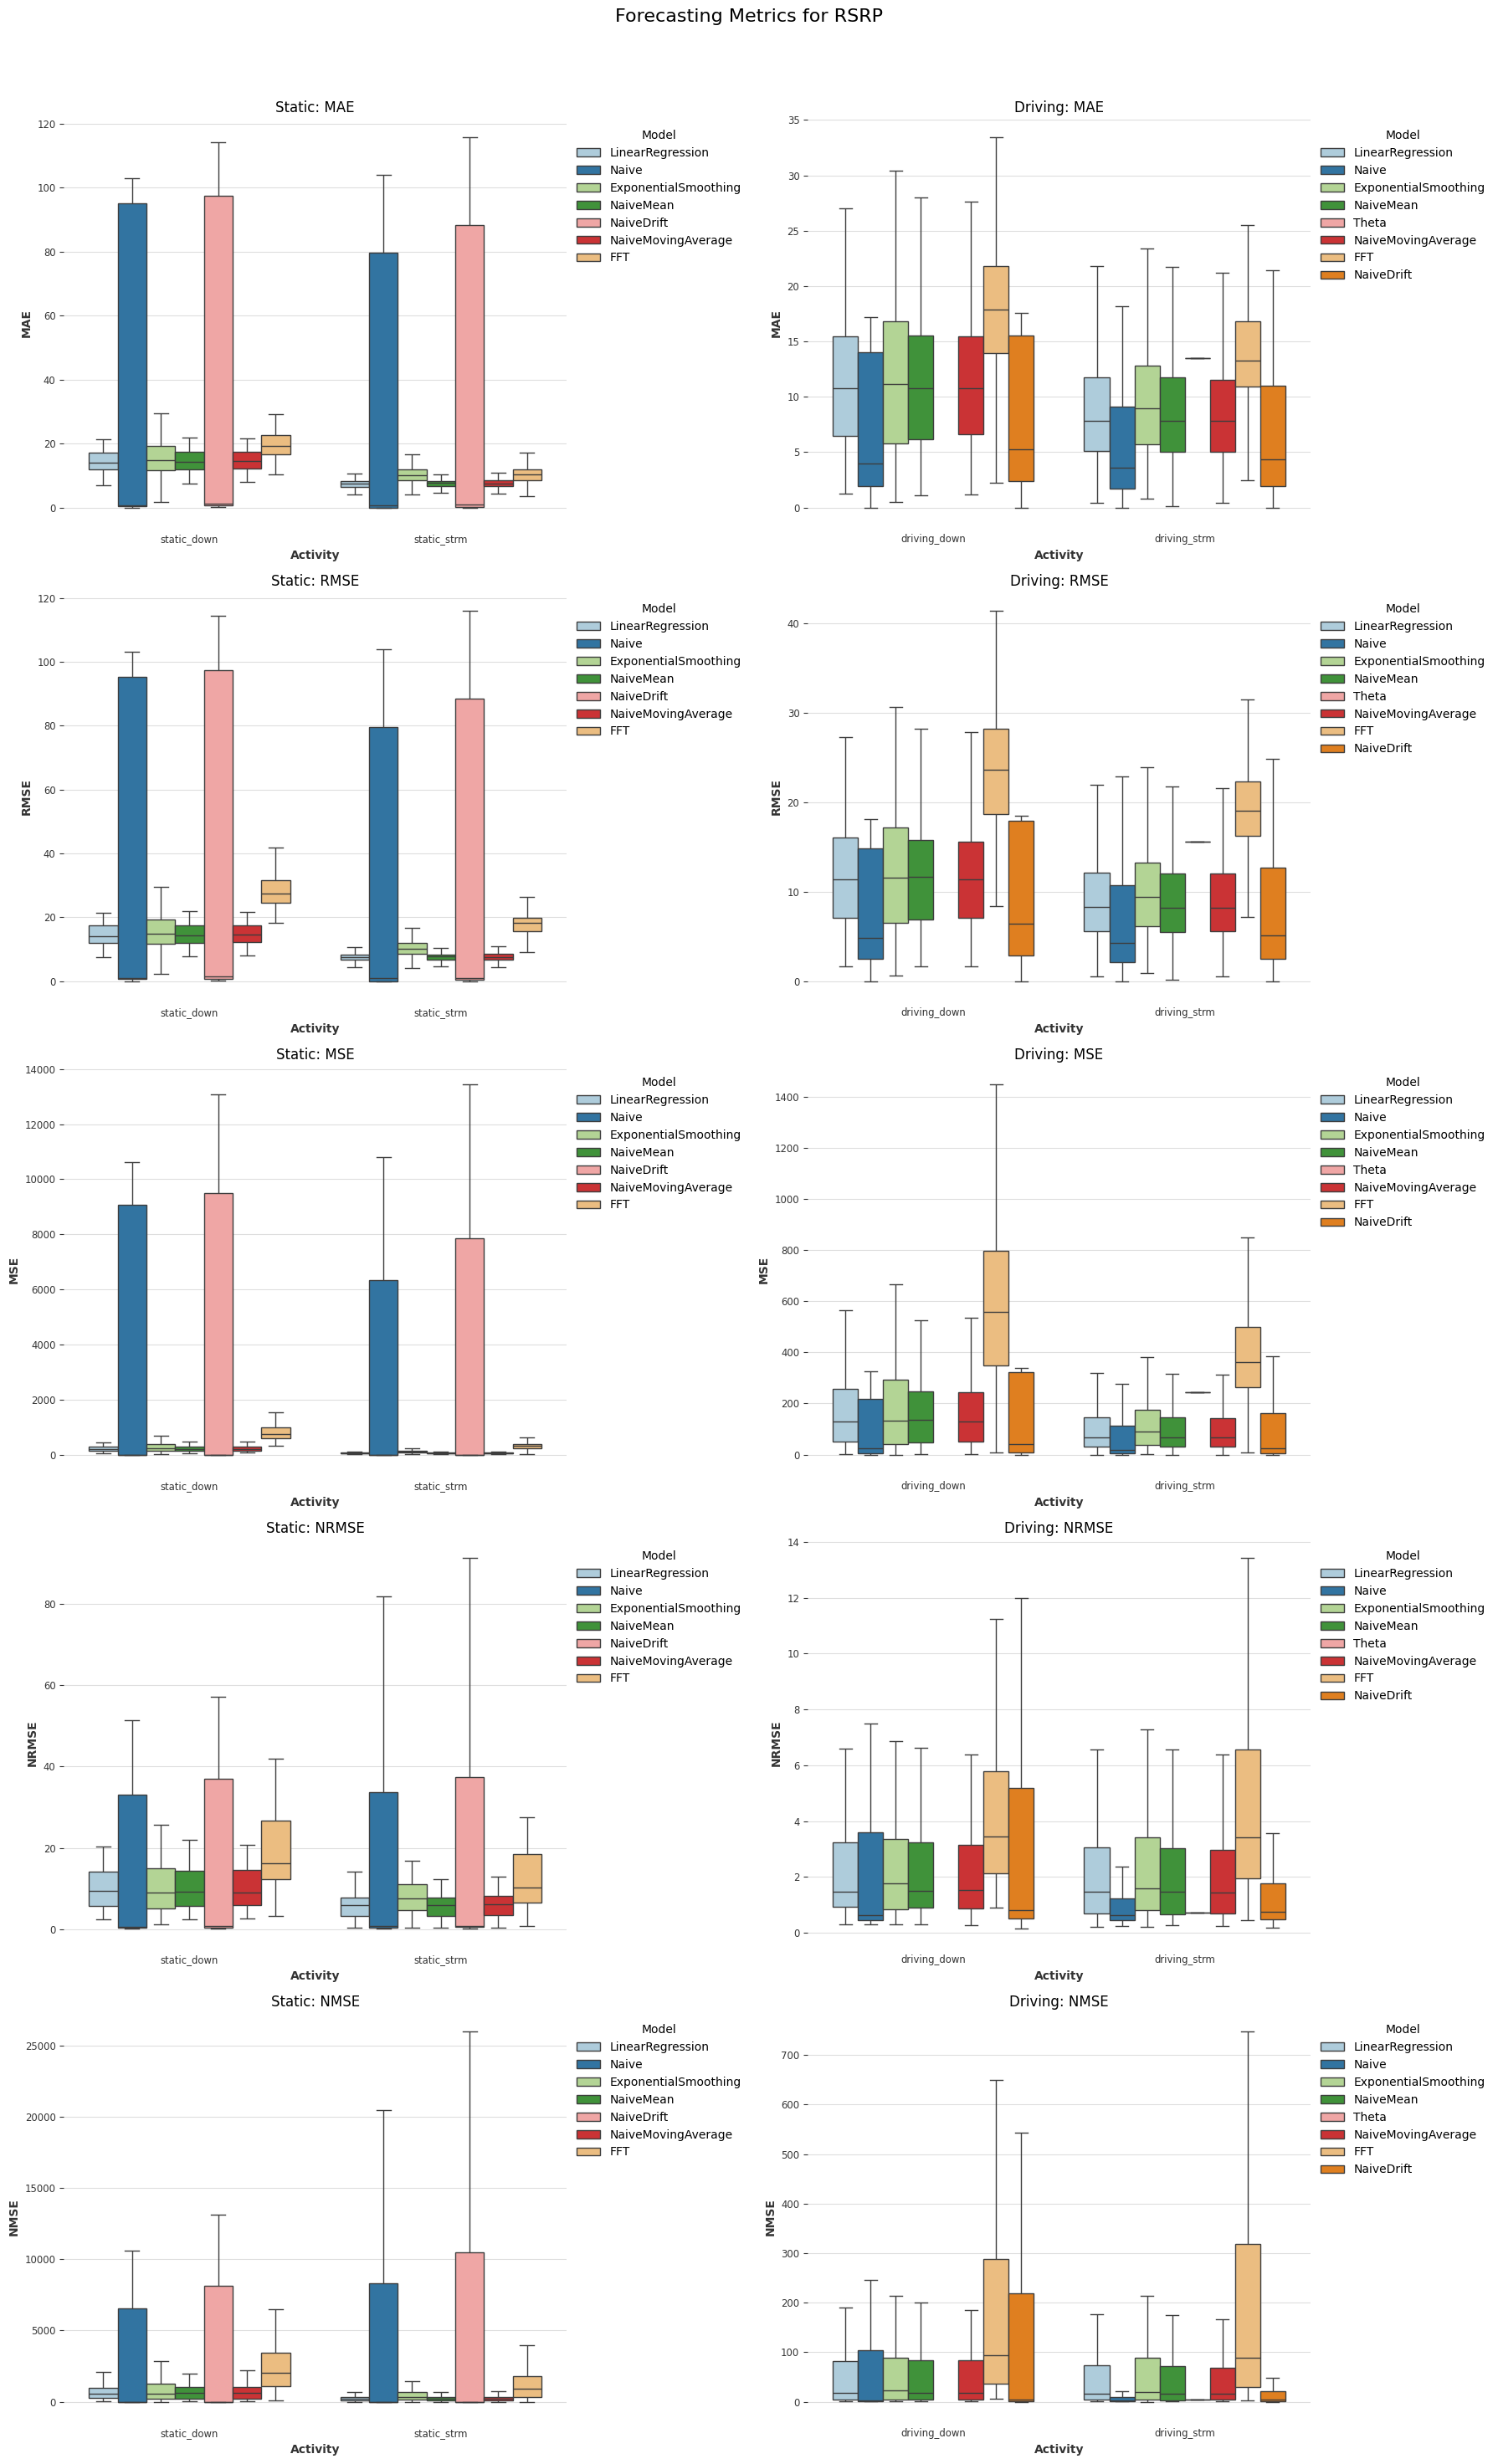

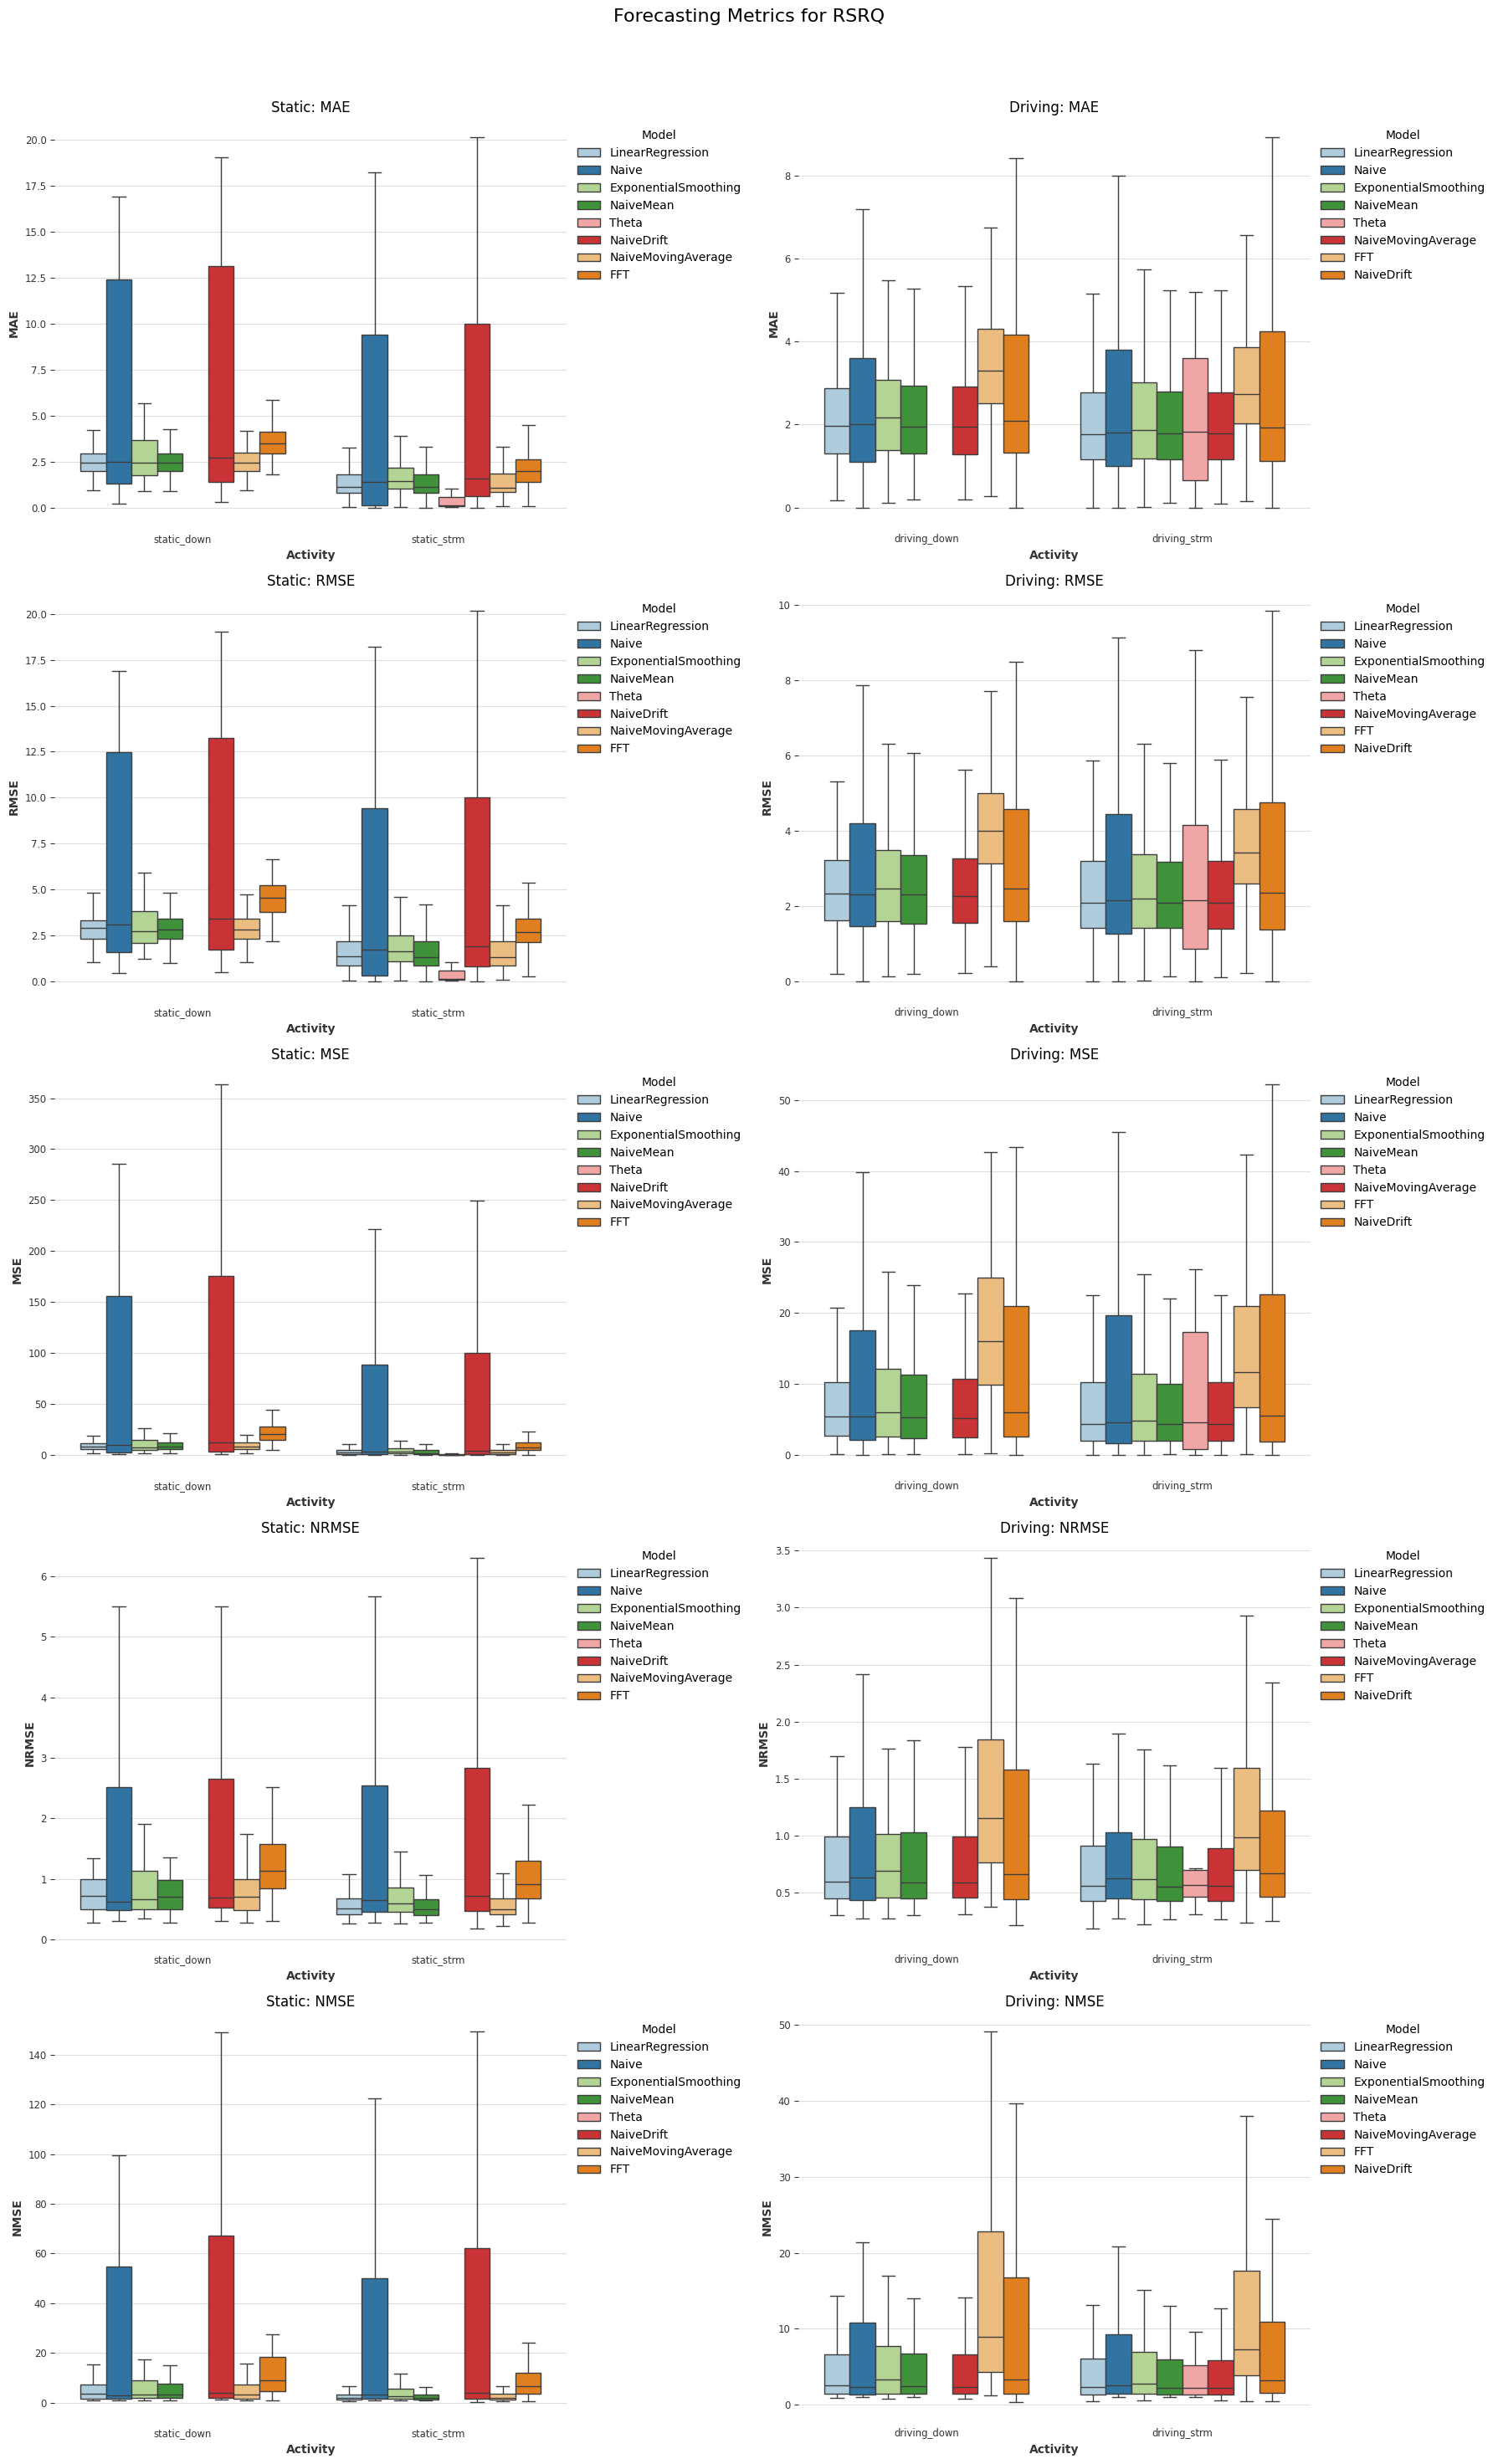

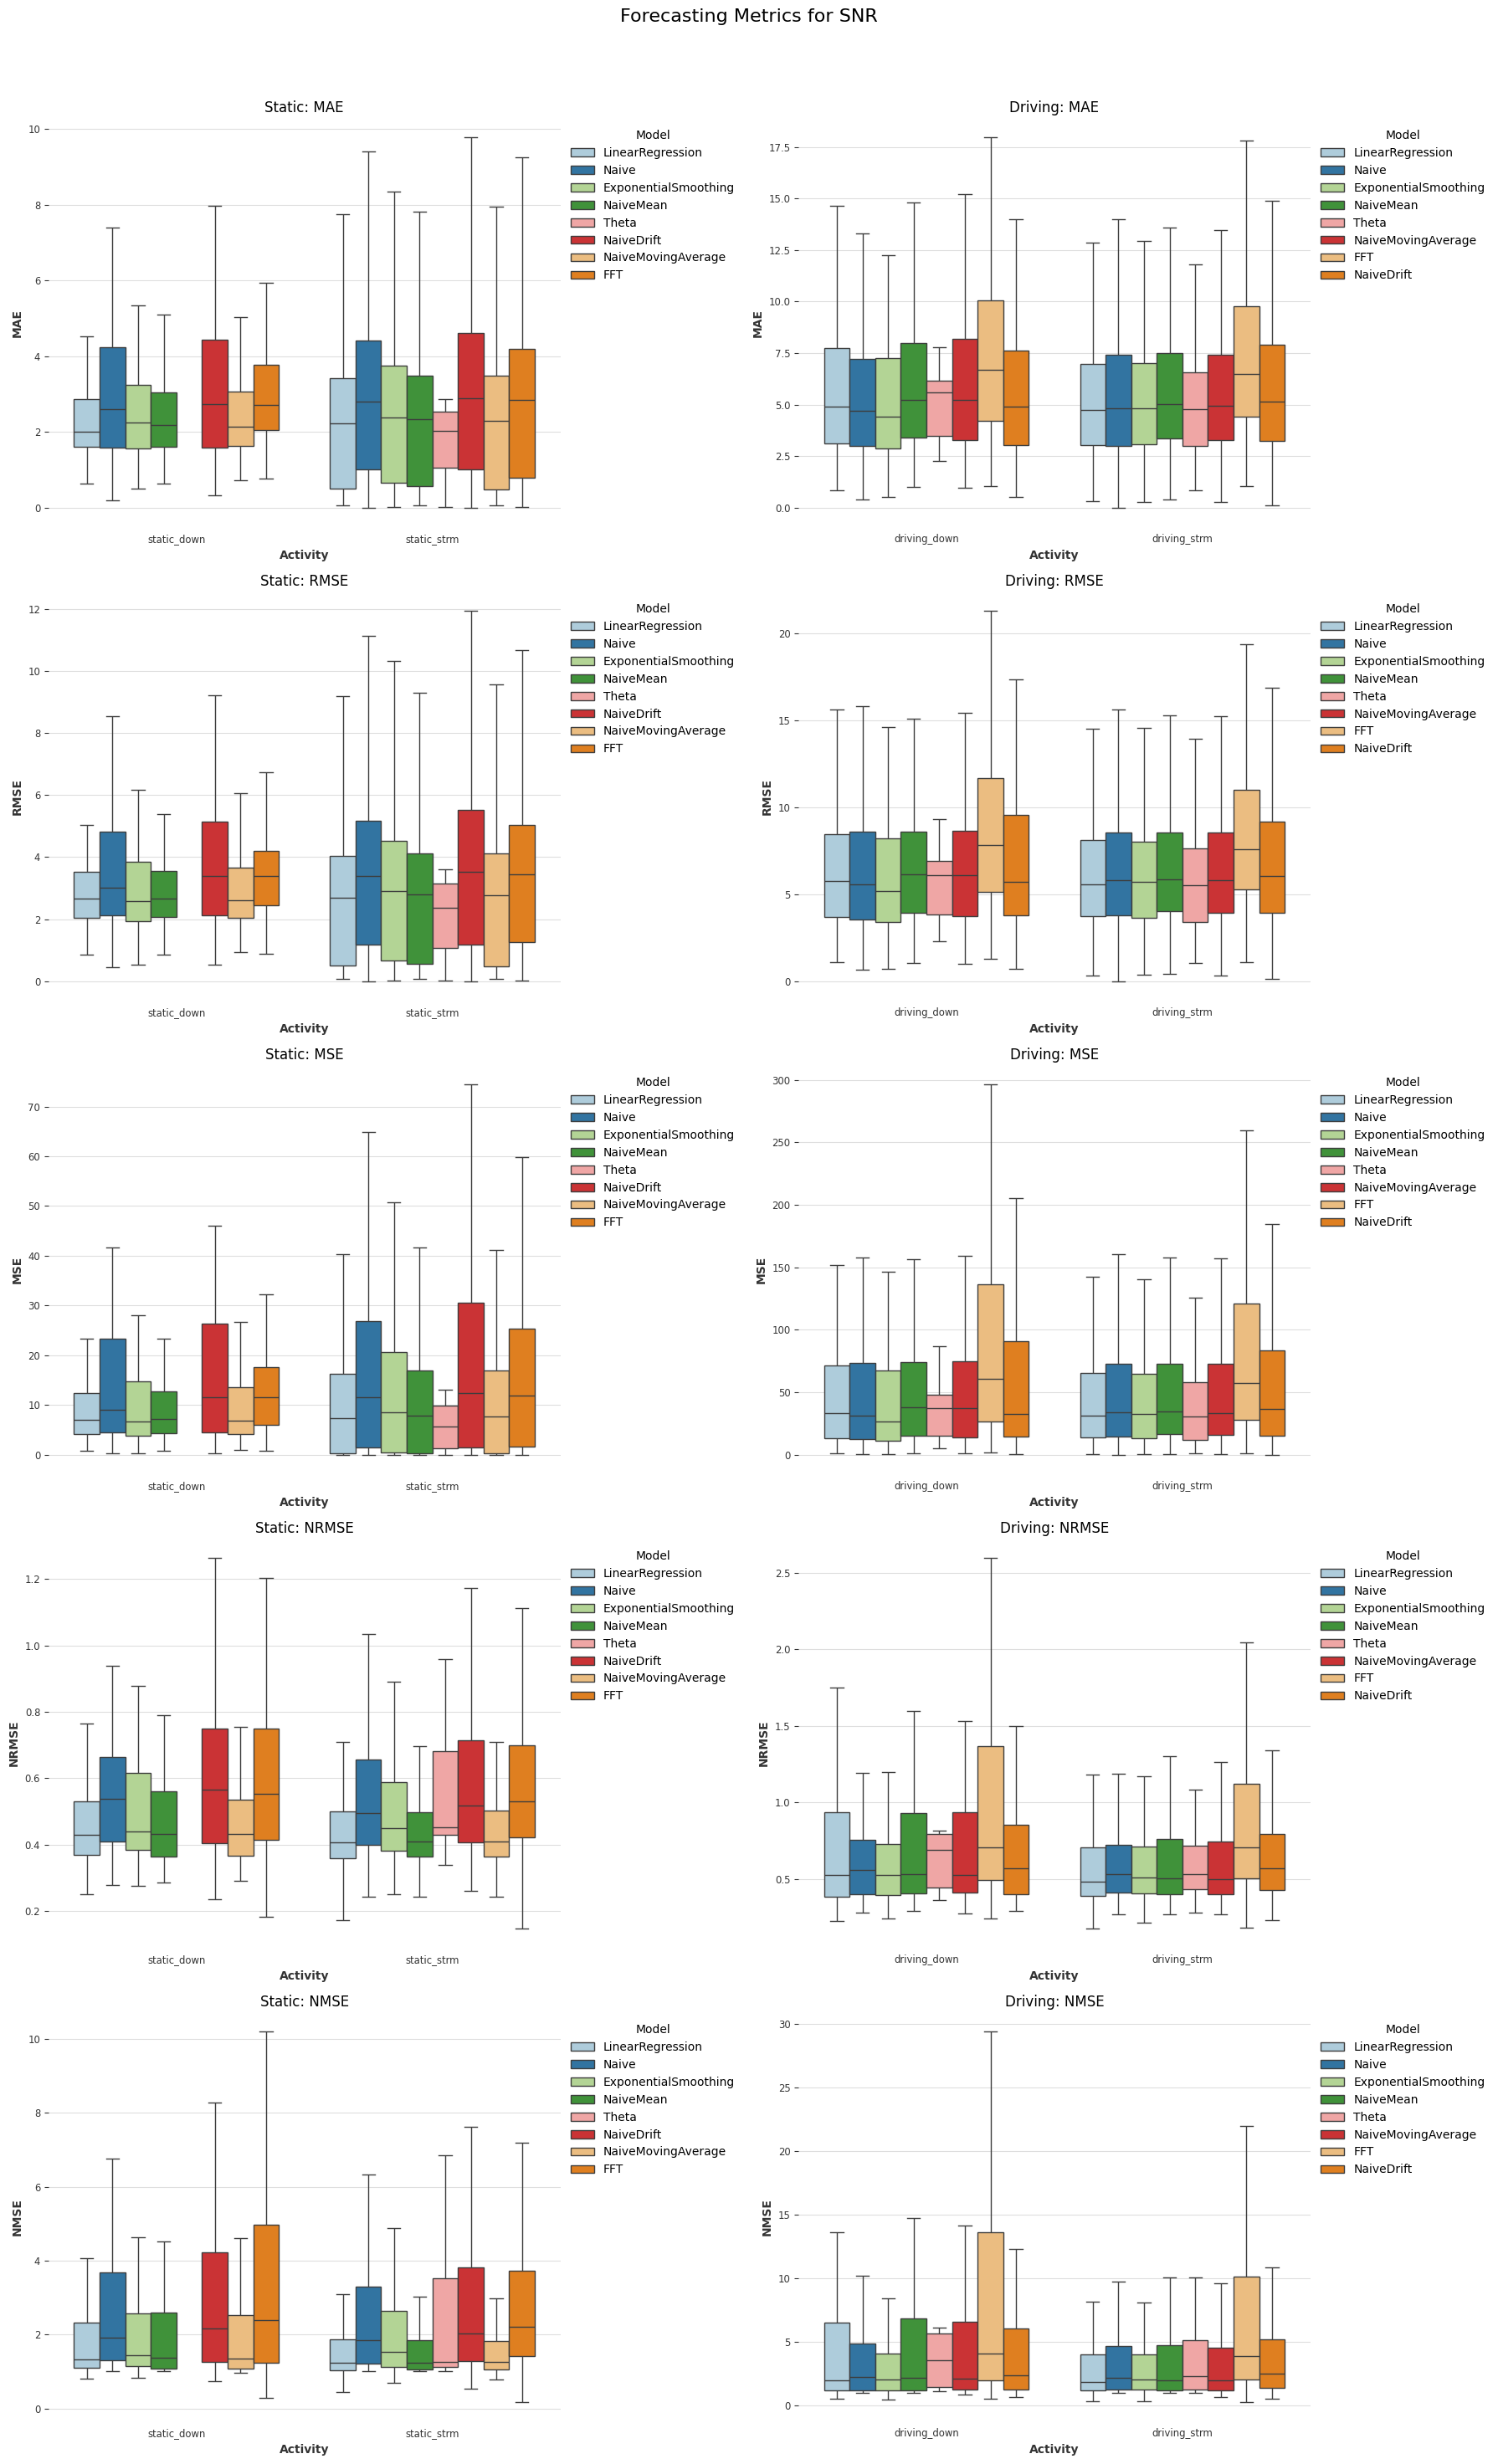

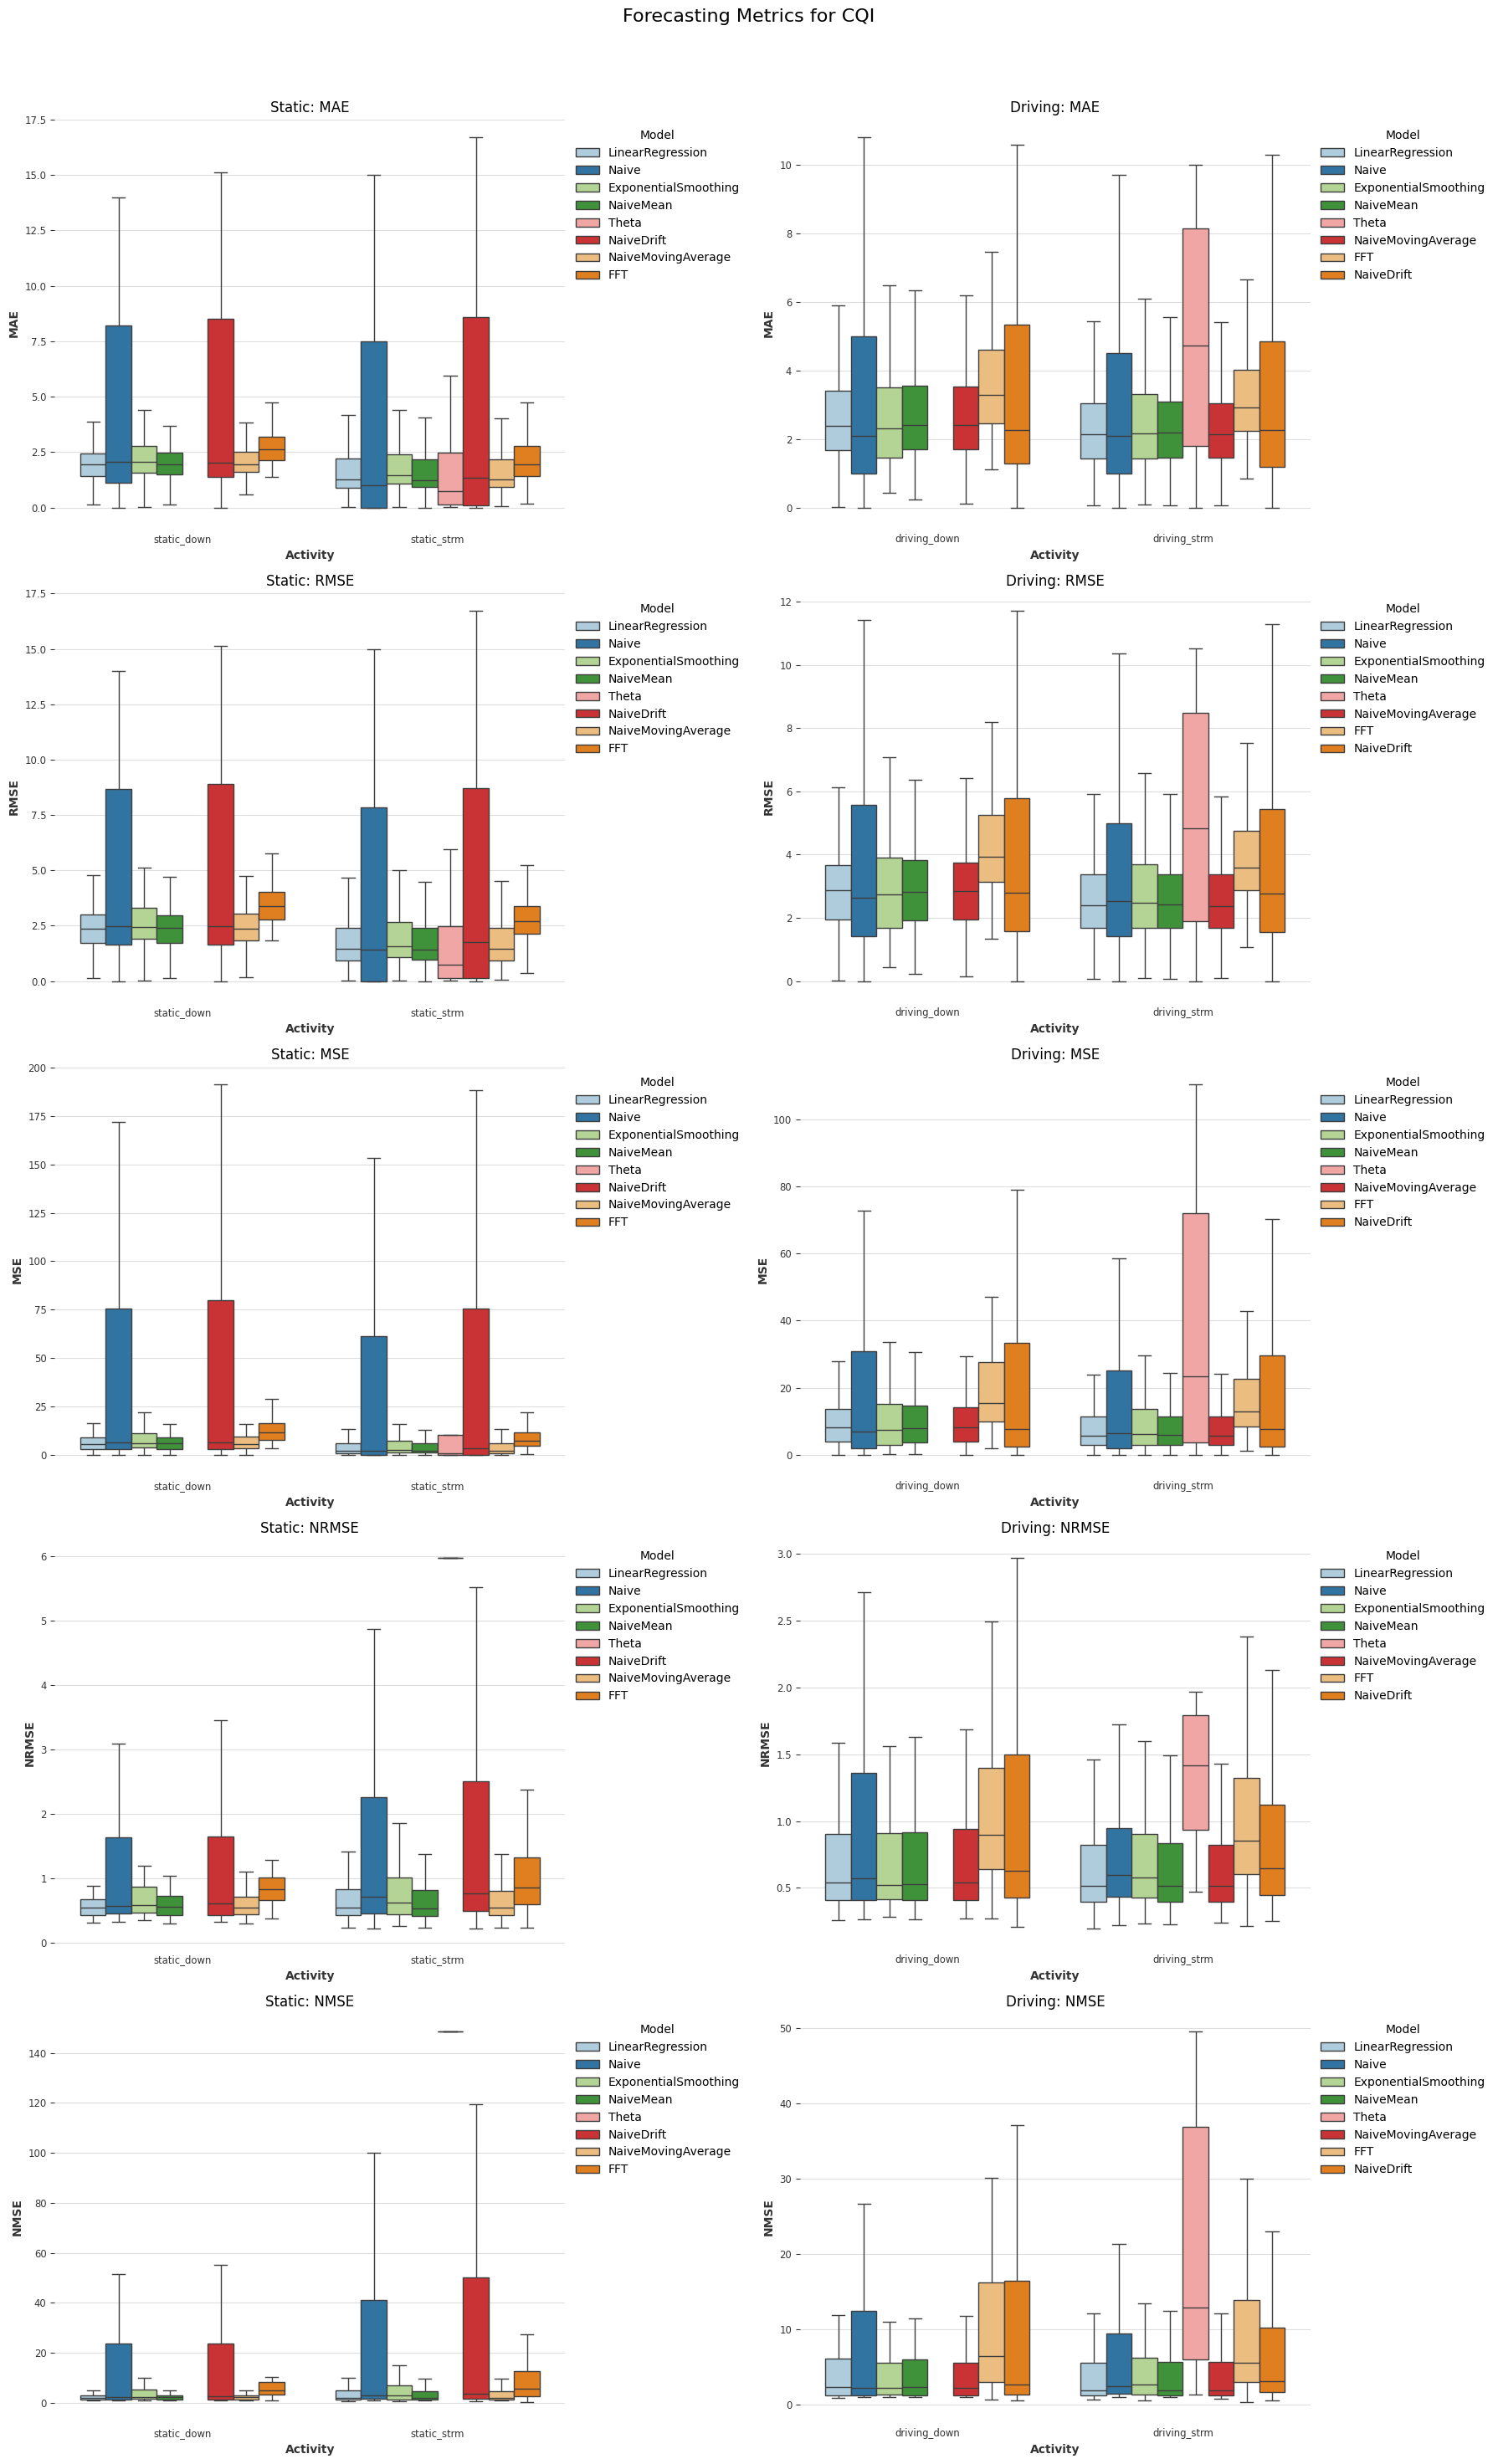

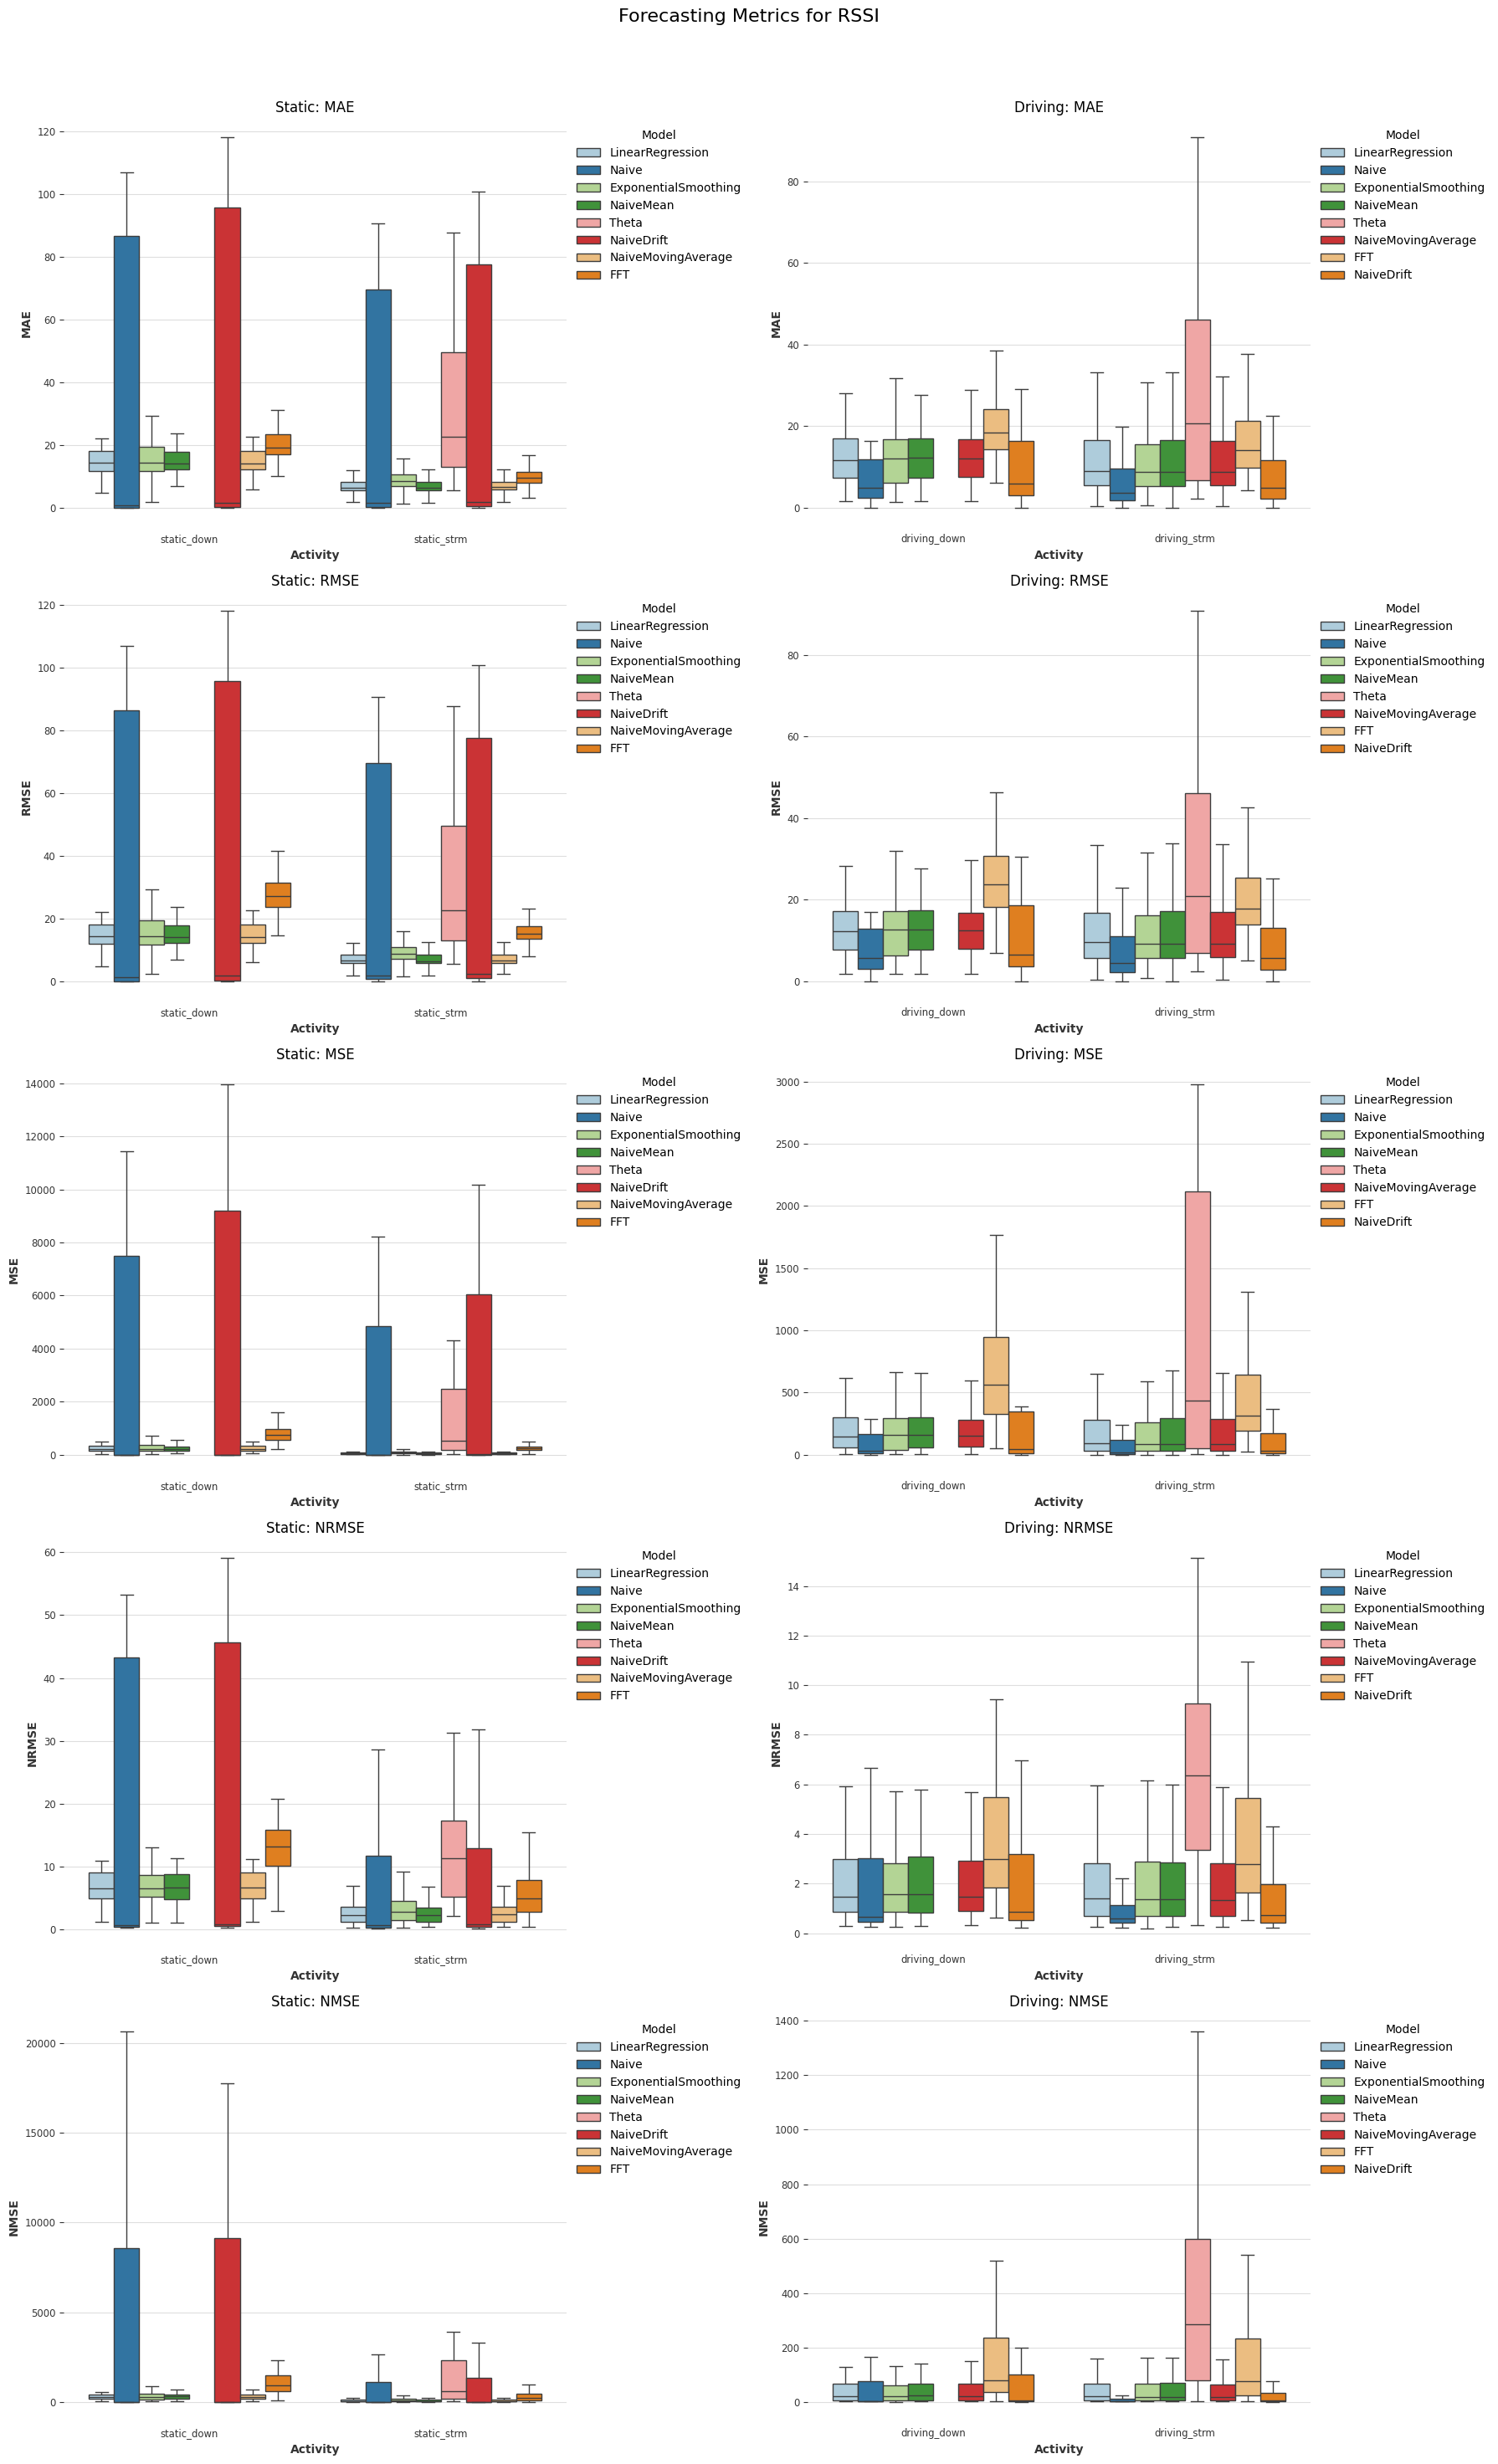

In [69]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

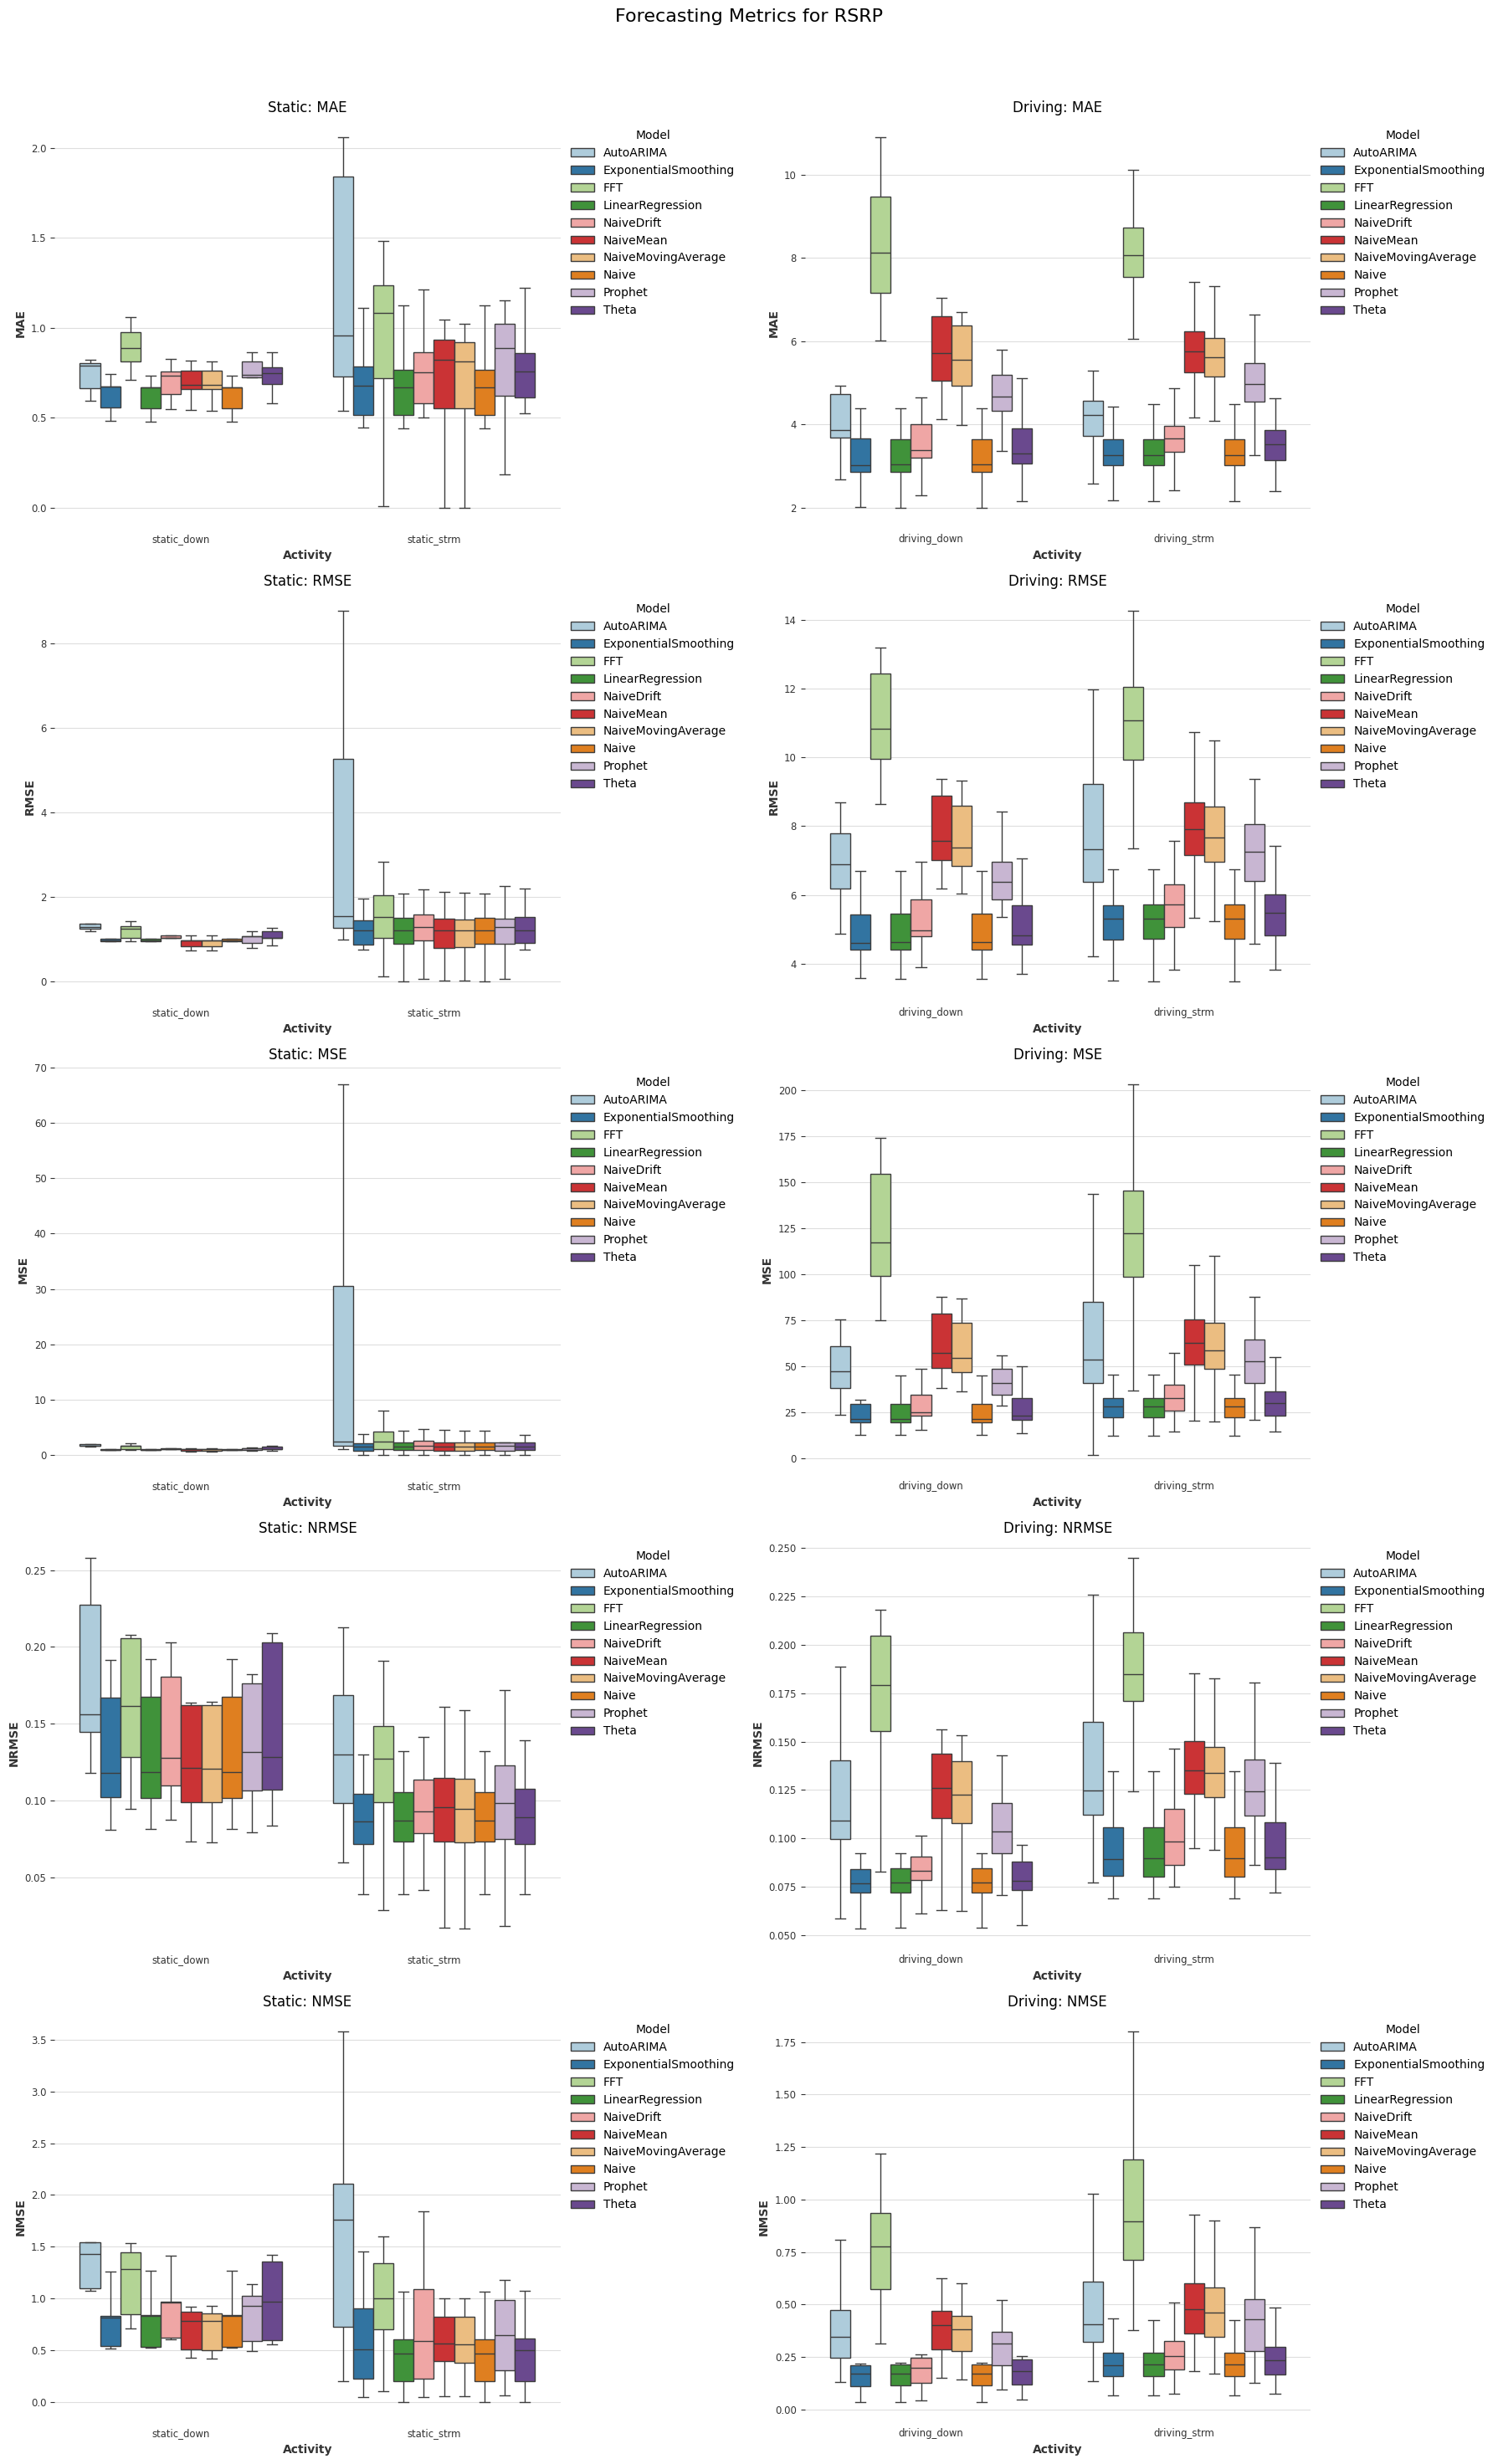

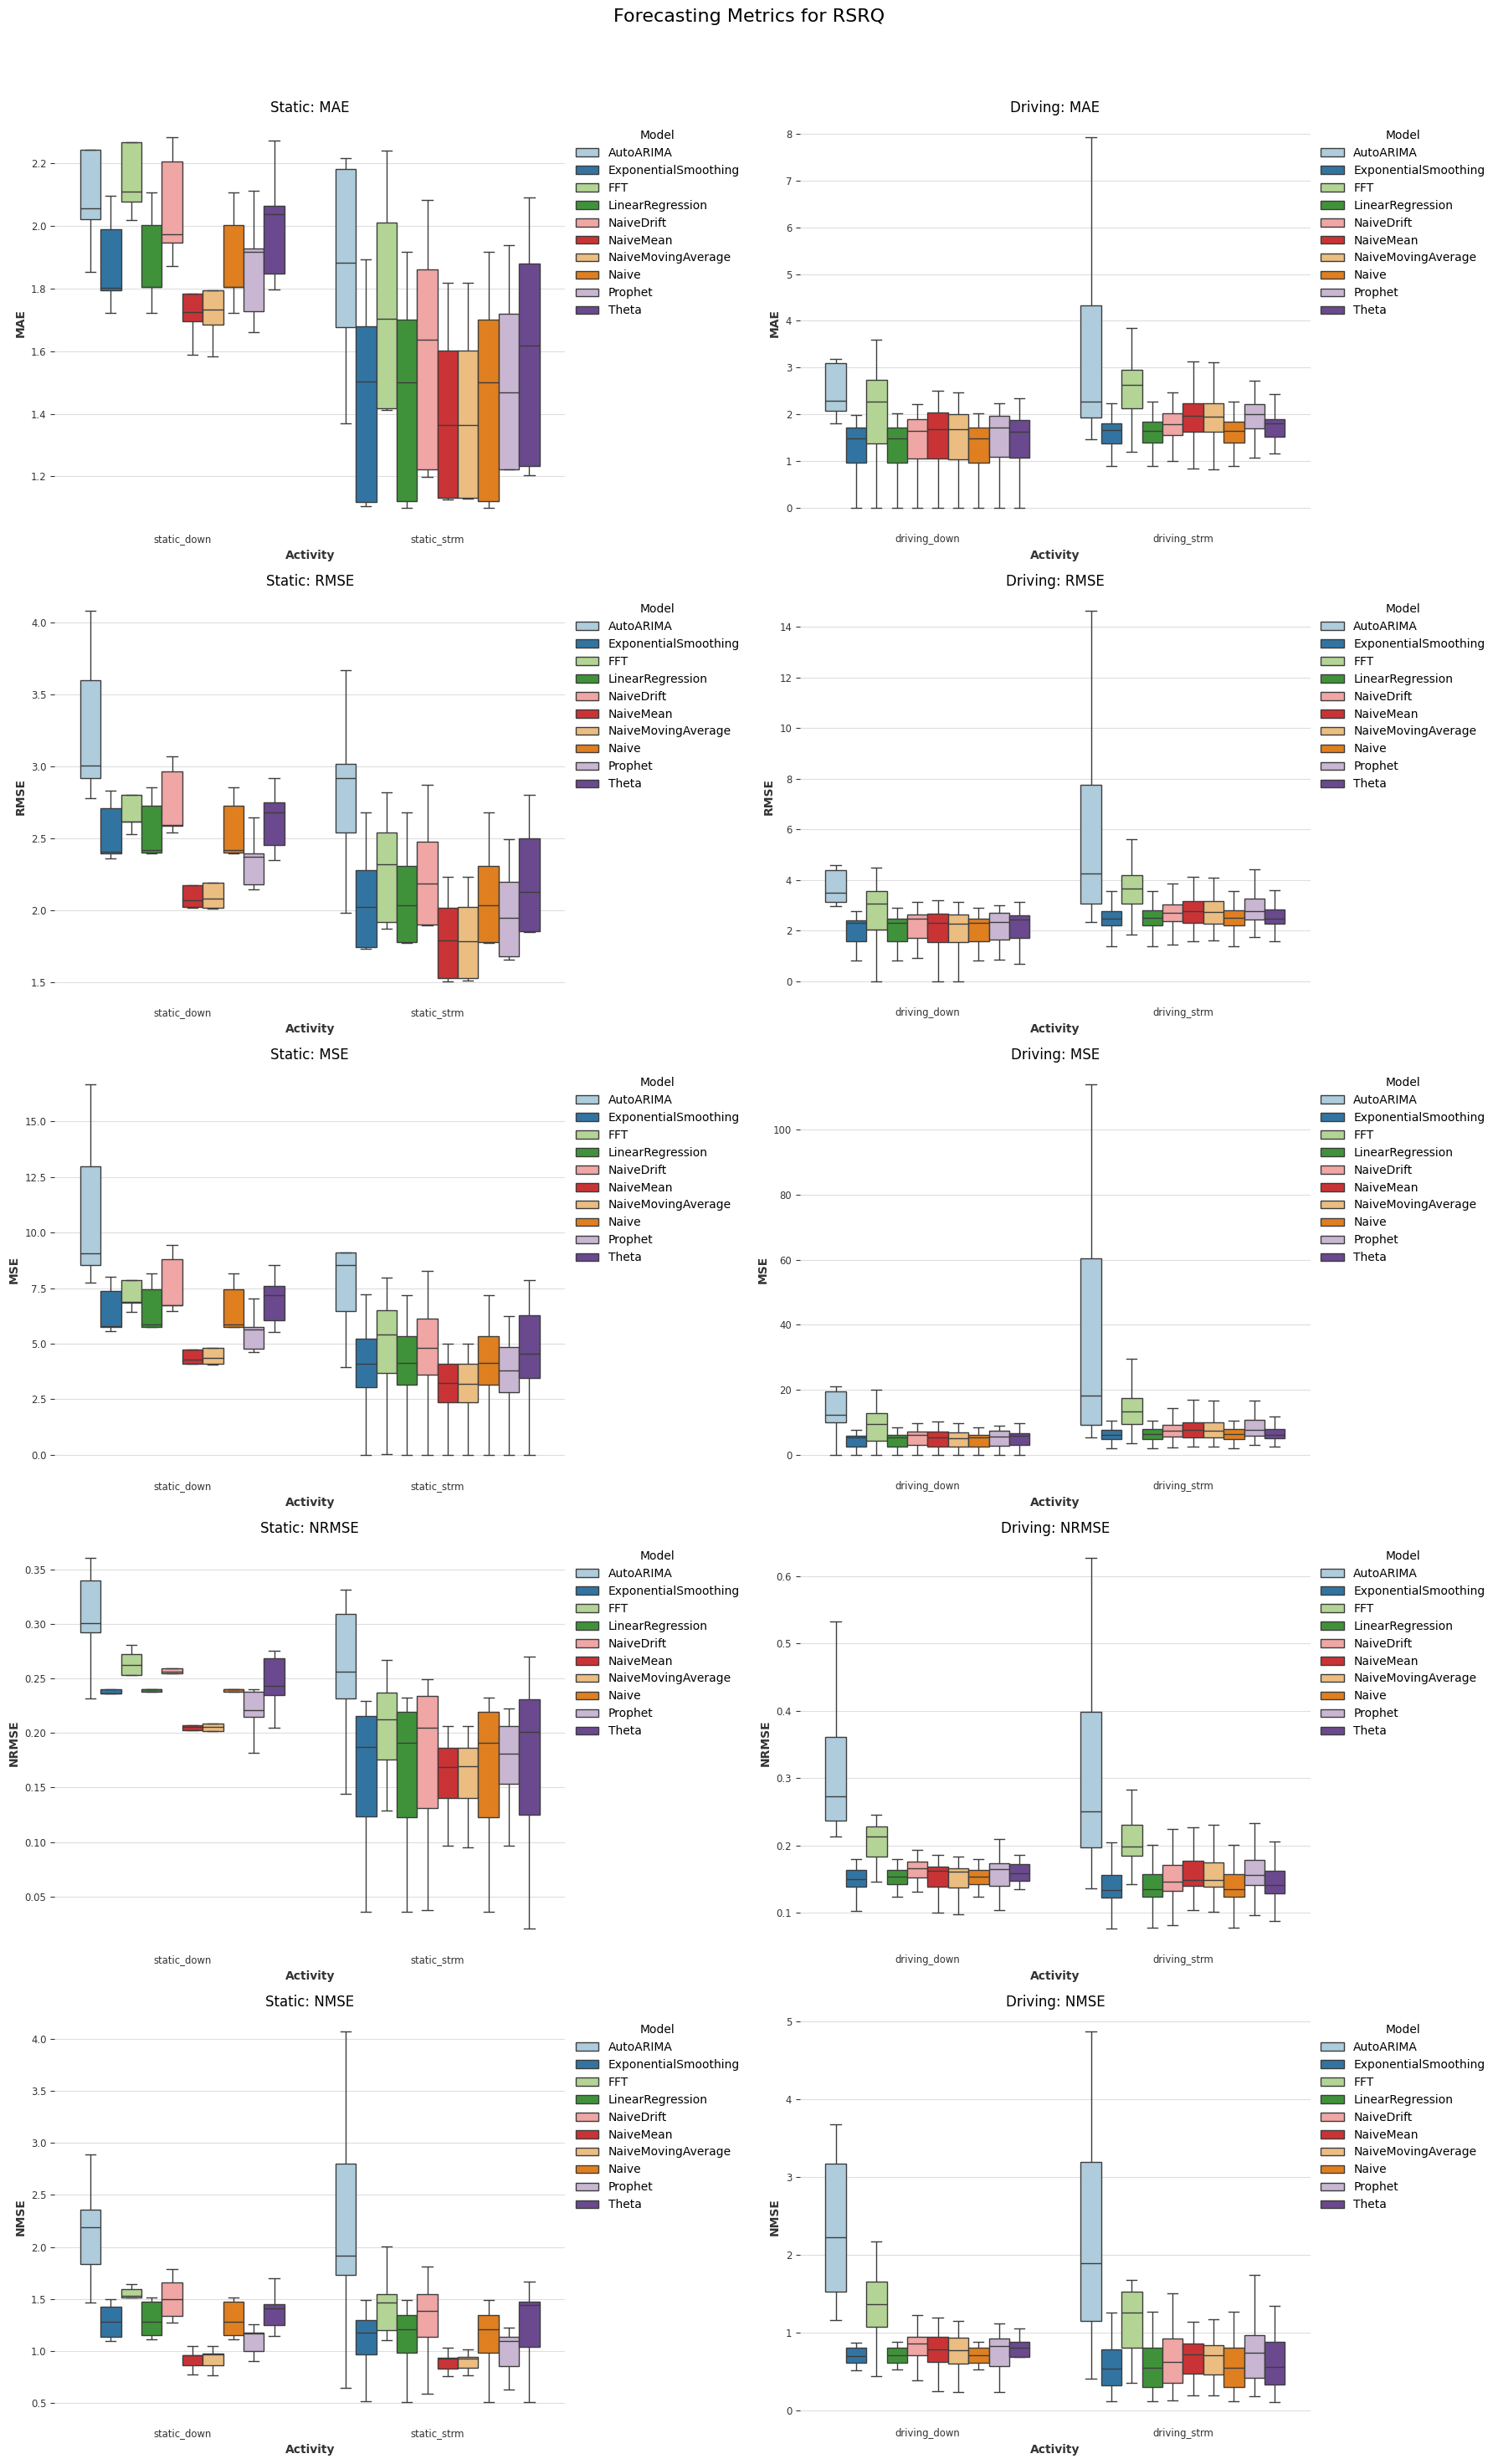

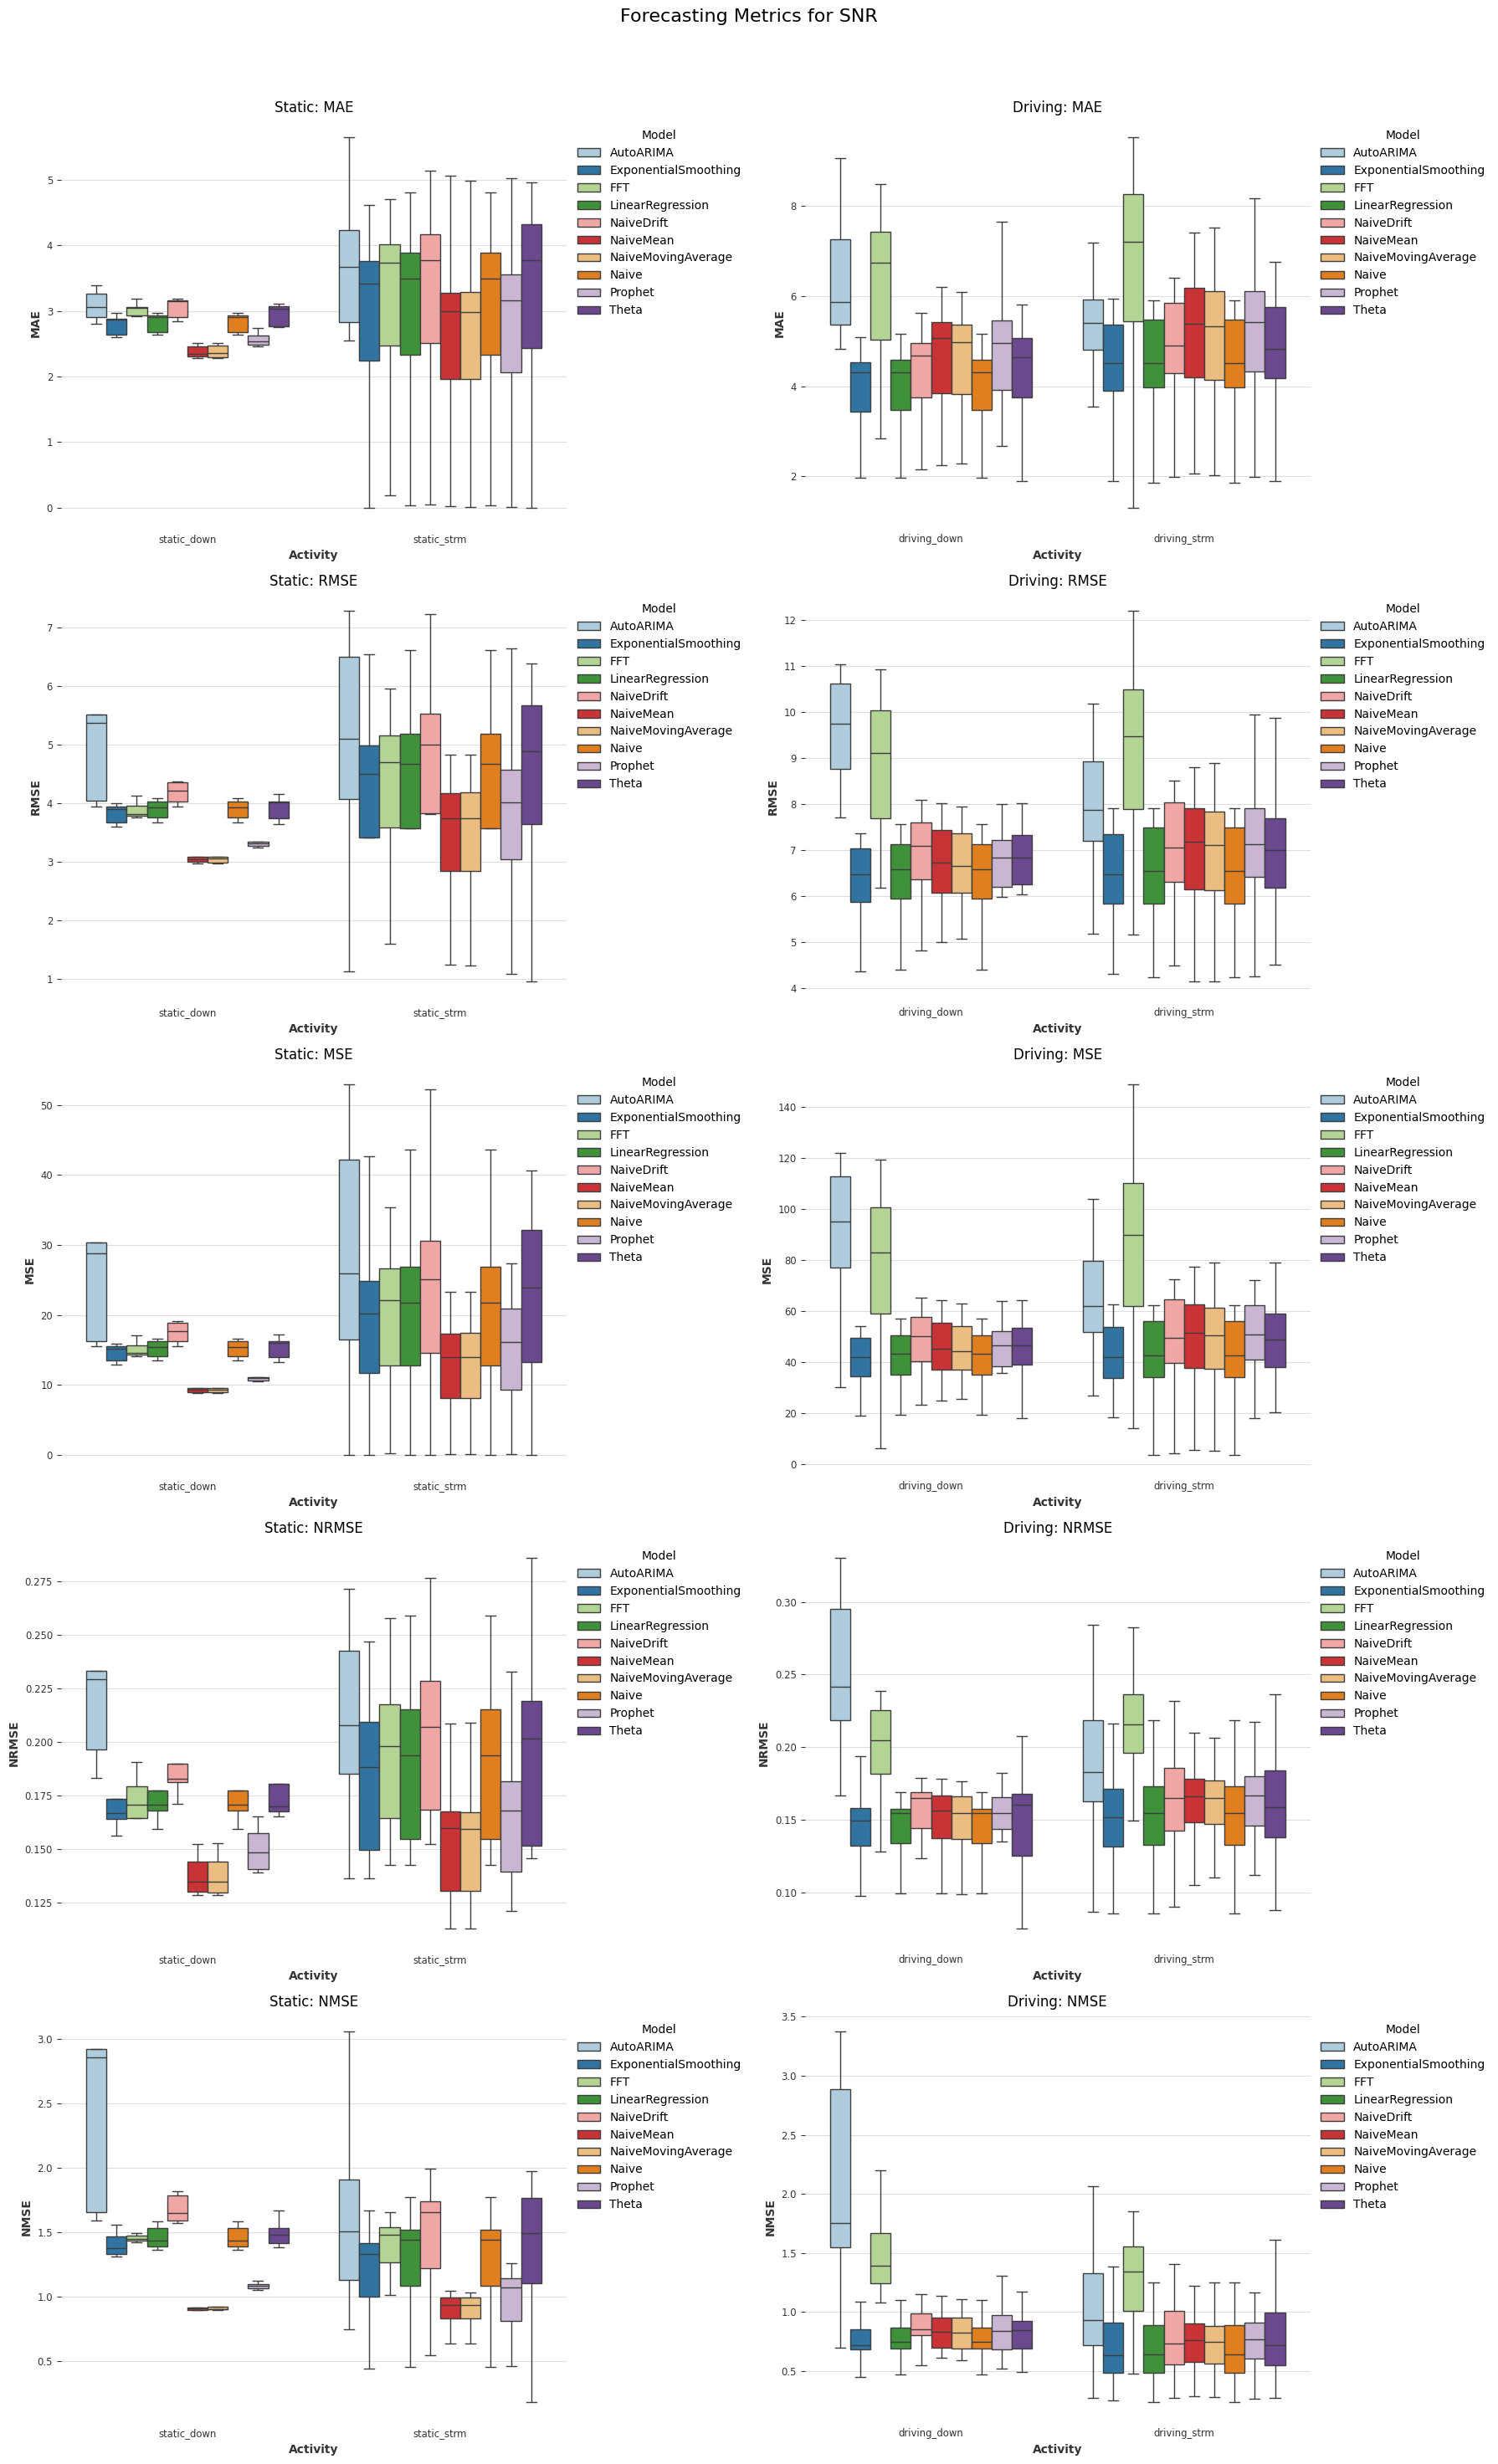

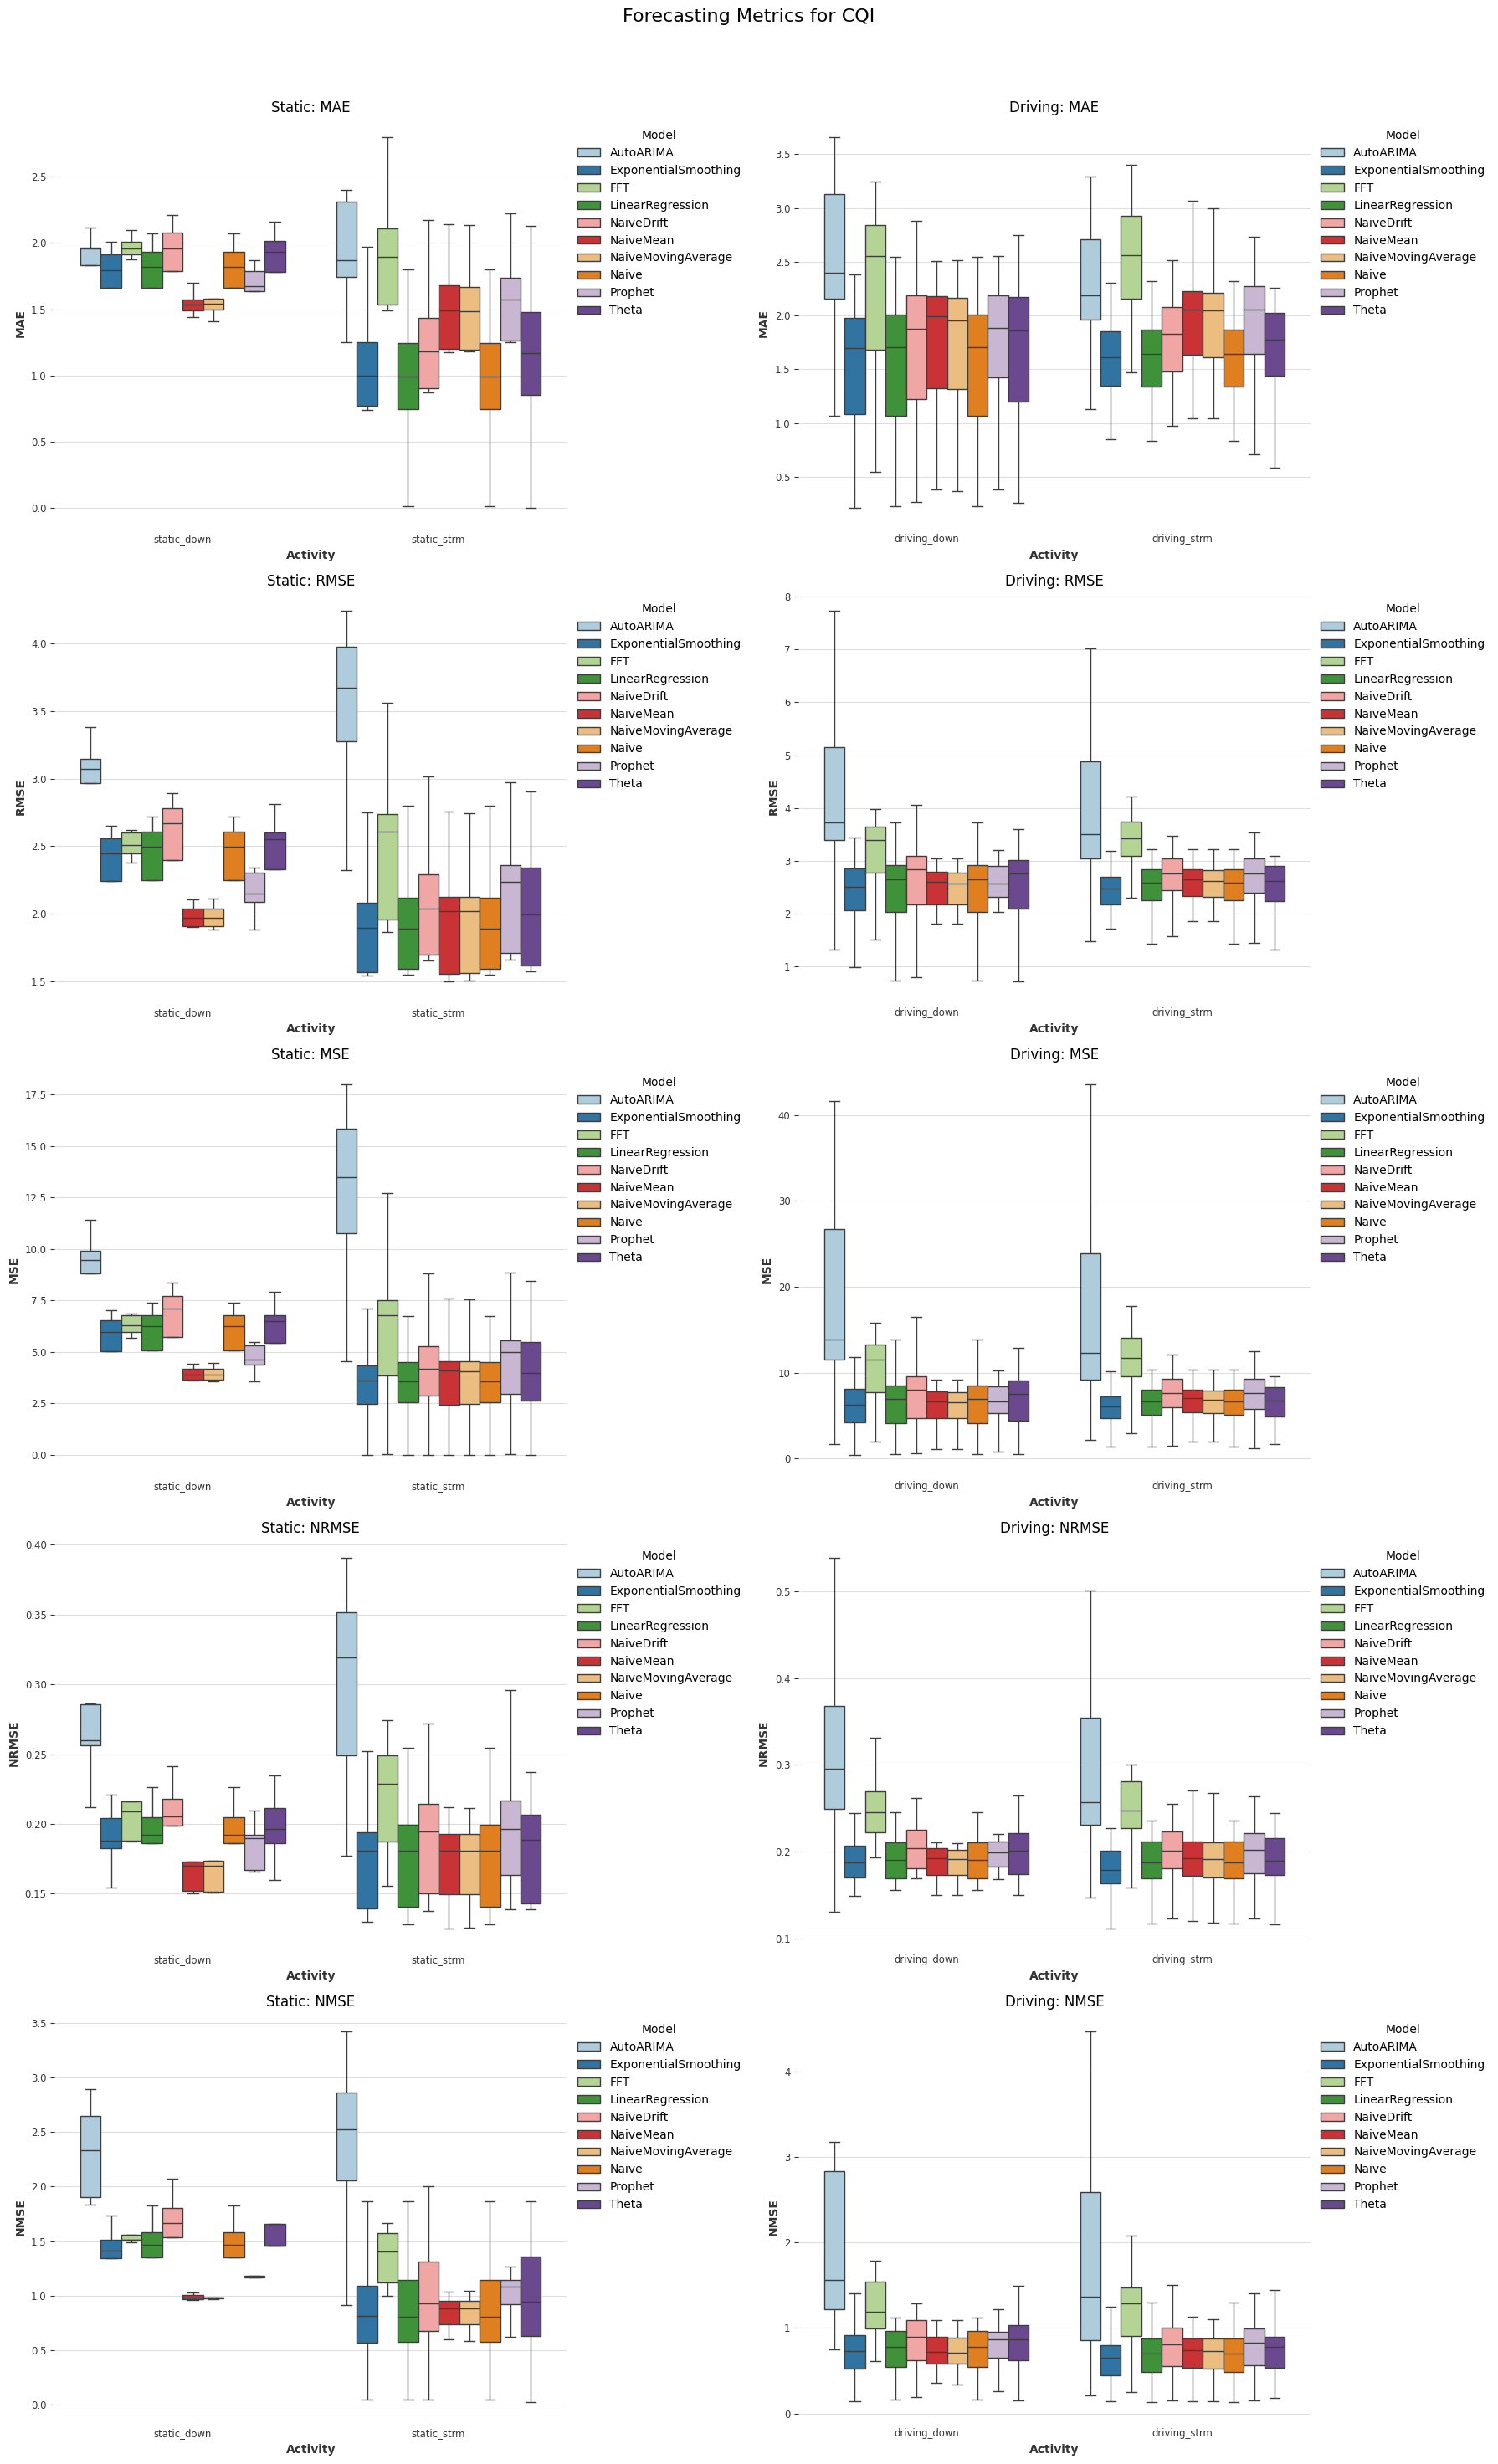

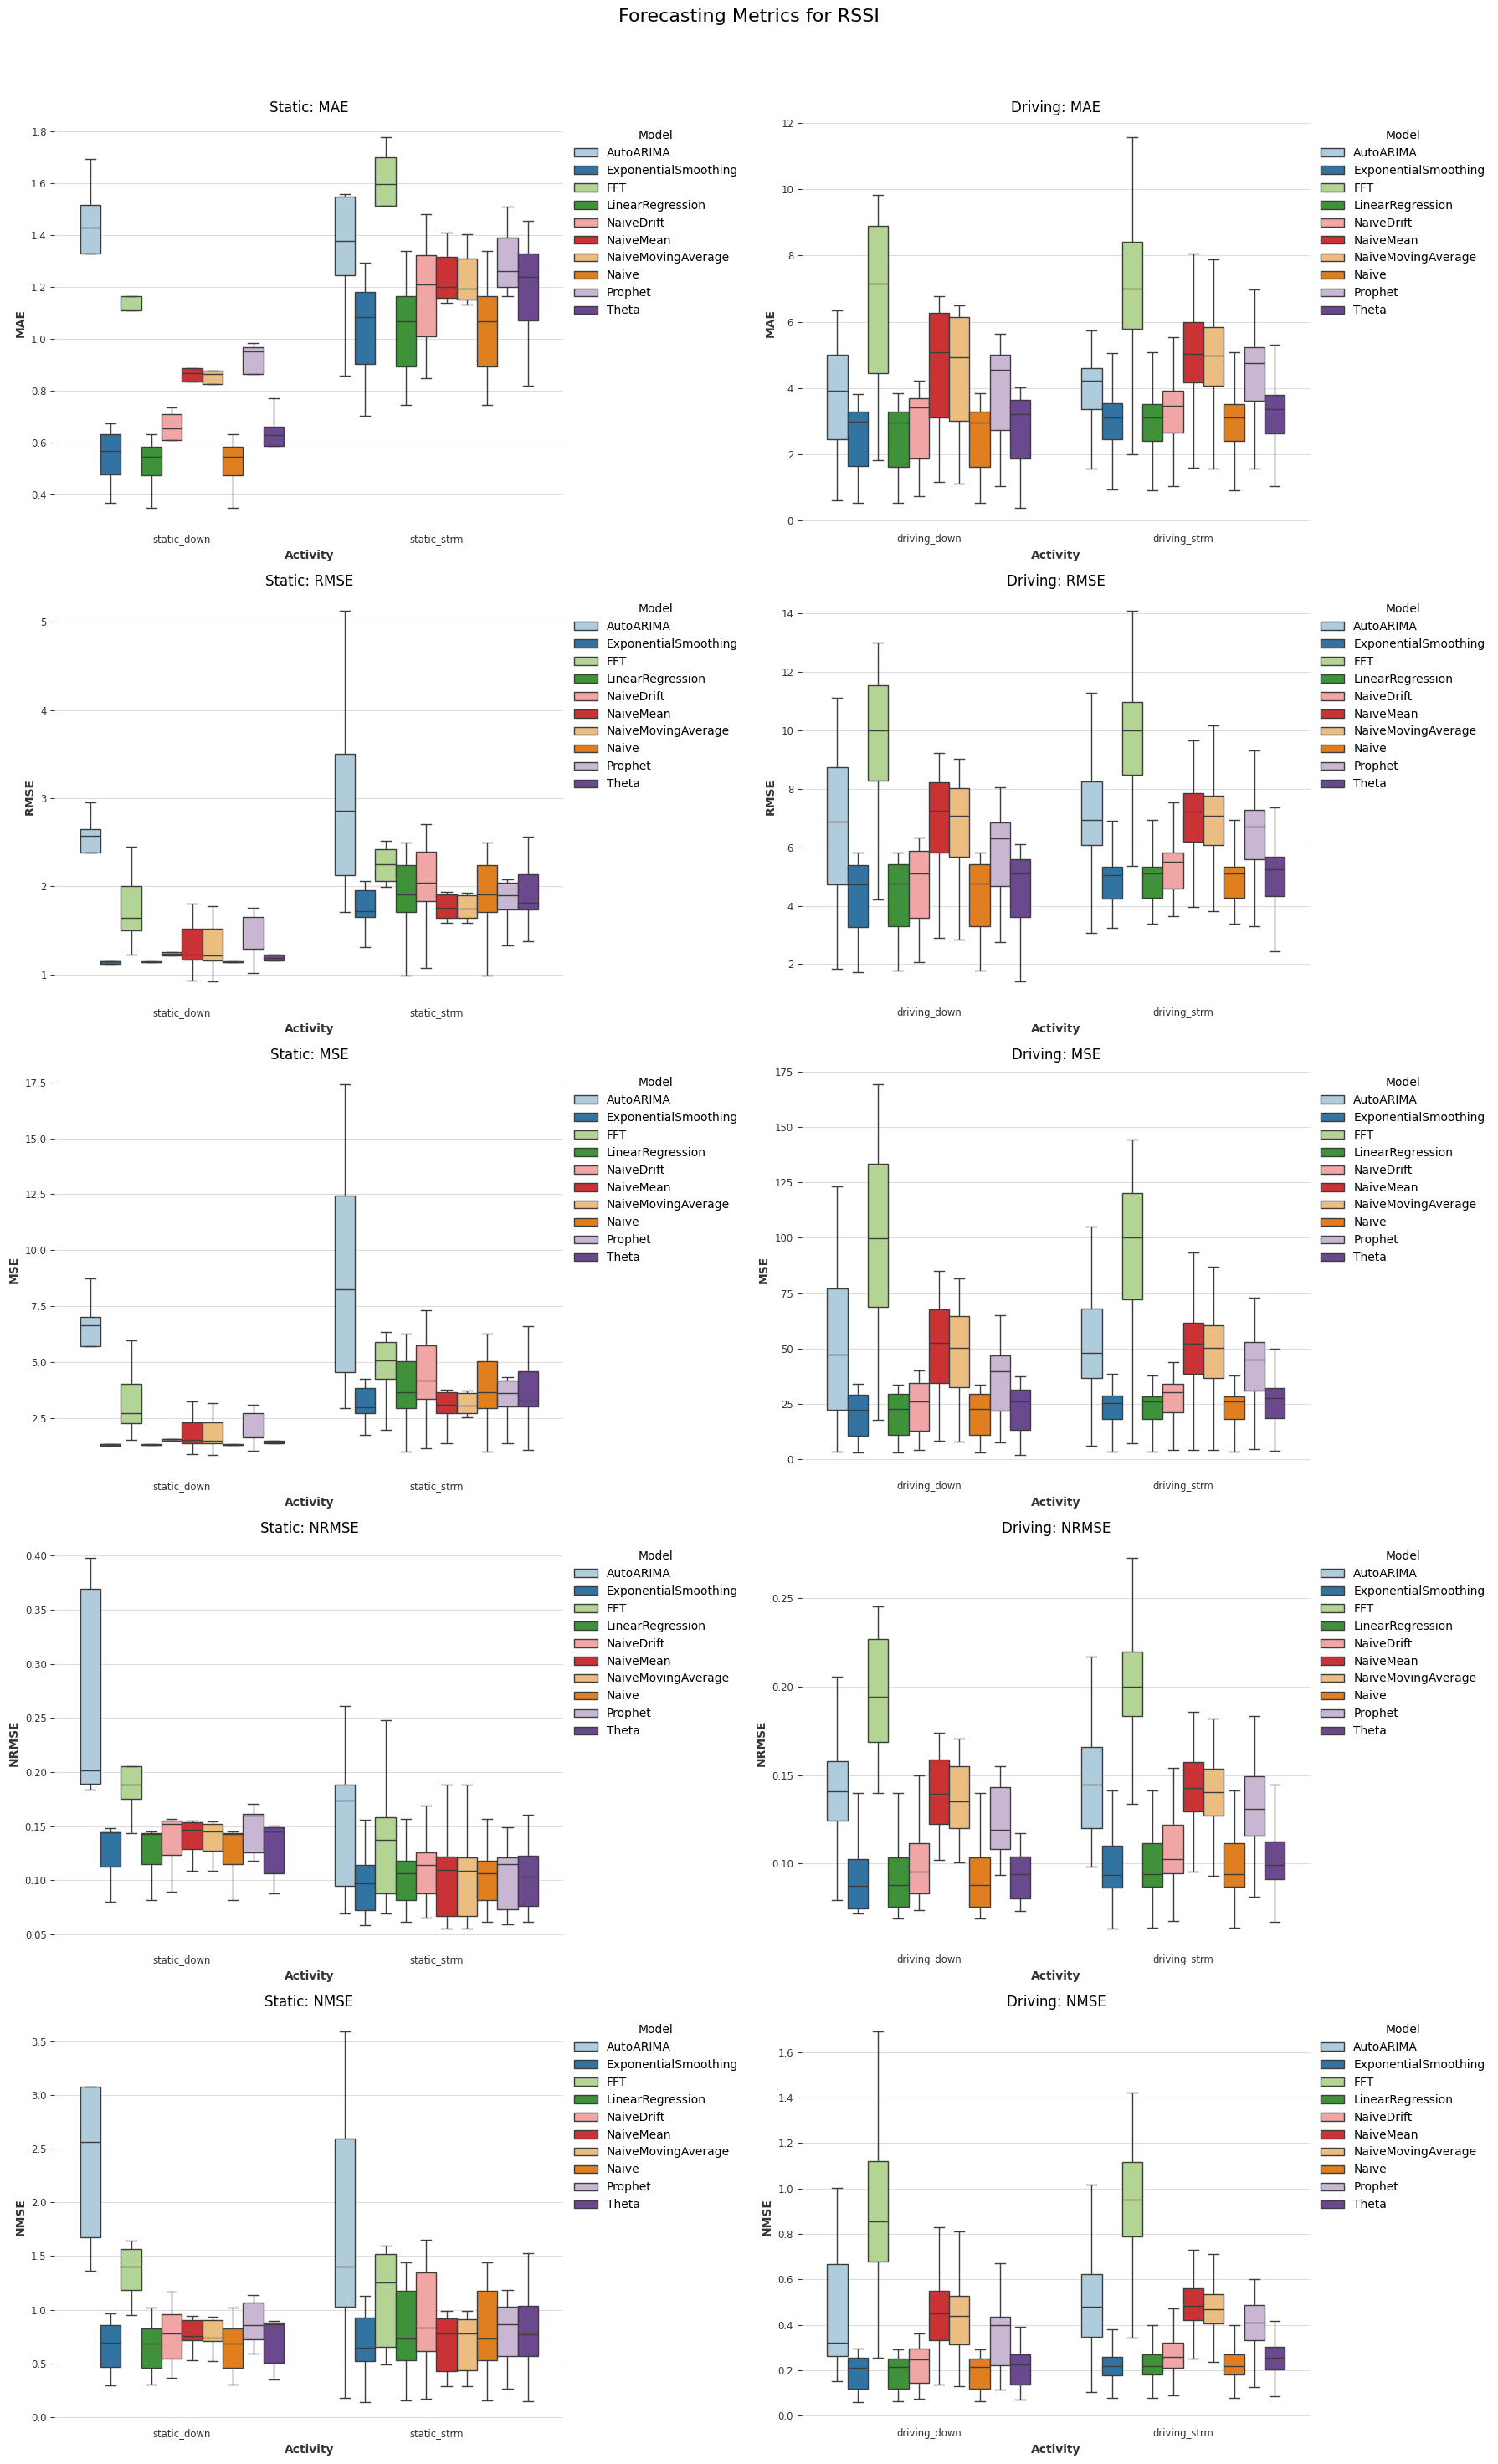

In [15]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

# Lendo os resultados das métricas geradas por um modelo

In [16]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """

    # Verificar se a métrica especificada é válida
    if metric not in ["MAE", "RMSE", "MSE"]:
        raise ValueError(
            f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'."
        )

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ["Model", "target", "Activity", metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(["Model", "target", "Activity"])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [17]:
lowest_mae = query_lowest_metric(df_metrics, "MAE")
lowest_rmse = query_lowest_metric(df_metrics, "RMSE")
lowest_mse = query_lowest_metric(df_metrics, "MSE")

In [18]:
lowest_mae

Time_Index      Model  \
65    [2020-02-14T12:59:07.000000000, 2020-02-14T12:...  AutoARIMA   
270   [2019-12-02T09:40:25.000000000, 2019-12-02T09:...  AutoARIMA   
315   [2019-12-16T13:40:54.000000000, 2019-12-16T13:...  AutoARIMA   
366   [2019-11-28T09:22:35.000000000, 2019-11-28T09:...  AutoARIMA   
37    [2020-02-13T13:04:14.000000000, 2020-02-13T13:...  AutoARIMA   
...                                                 ...        ...   
4112  [2019-12-23T10:31:25.000000000, 2019-12-23T10:...      Theta   
3785  [2020-02-27T17:31:05.000000000, 2020-02-27T17:...      Theta   
3980  [2019-12-02T09:40:25.000000000, 2019-12-02T09:...      Theta   
4020  [2020-01-16T10:44:24.000000000, 2020-01-16T10:...      Theta   
4045  [2020-01-06T09:56:24.000000000, 2020-01-06T09:...      Theta   

                                                Actuals  \
65    [14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 14.0, 14....   
270   [8.0, 8.0, 8.0, 8.0, 8.0, 13.999999999999998, ...   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   
37    [-99.0, -93.0, -93.0, -92.0, -92.0, -92.0, -90...   
...                                                 ...   
4112  [-85.0, -85.0, -85.5, -85.99999999999999, -86....   
3785  [-2.0, -2.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, ...   
3980  [7.0, 7.0, 10.0, 10.0, 9.0, 9.0, 5.0, 5.0, 5.0...   
4020  [-0.9999999999999993, -0.9999999999999993, -0....   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....   

                                                  Preds  ElapsedTime target  \
65    [14.075388311546599, 13.661517967601764, 13.66...    20.652354    CQI   
270   [6.347234695332148, 3.717407522453008, 1.04052...    16.630062    CQI   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   132.629273    CQI   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   238.378127    CQI   
37    [-99.41720703139154, -99.52900129075675, -99.5...   176.826534   RSRP   
...                                                 ...          ...    ...   
4112  [-85.3750292370542, -85.3750292370542, -85.375...     8.600890   RSSI   
3785  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....     0.771755    SNR   
3980  [7.500000007450581, 7.500000007450581, 7.50000...     0.932346    SNR   
4020  [0.5319570296101408, 0.7834068409076166, -2.07...     5.285993    SNR   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....     3.300214    SNR   

          Activity       MAE      RMSE        MSE     NRMSE      NMSE  
65    driving_down  1.068171  1.309548   1.714916  0.130955  0.747538  
270   driving_strm  0.581342  2.510187   6.301040  0.209182  1.266539  
315    static_down  1.539037  2.577102   6.641456  0.286345  1.832134  
366    static_strm  1.253523  2.323637   5.399290  0.211240  0.966396  
37    driving_down  2.673824  7.702151  59.323137  0.122256  0.347149  
...            ...       ...       ...        ...       ...       ...  
4112   static_strm  0.559861  1.033788   1.068719  0.103379  0.256333  
3785  driving_down  0.371456  1.205527   1.453296  0.075345  0.716014  
3980  driving_strm  0.541031  2.025322   4.101929  0.088057  0.272826  
4020   static_down  2.757058  3.638770  13.240645  0.165399  1.384144  
4045   static_strm  0.000000  0.000000   0.000000       NaN       NaN  

[200 rows x 12 columns]

## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [19]:
def plot_actual_vs_preds(
    result_df: pd.DataFrame, model: str, target: str, activity: str
) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[
        (result_df["Model"] == model)
        & (result_df["target"] == target)
        & (result_df["Activity"] == activity)
    ]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(
        label="Predições", color="red", linestyle="--"
    )  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(
        f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}"
    )
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

          MAE      RMSE       MSE
317  0.594476  1.182585  1.398508


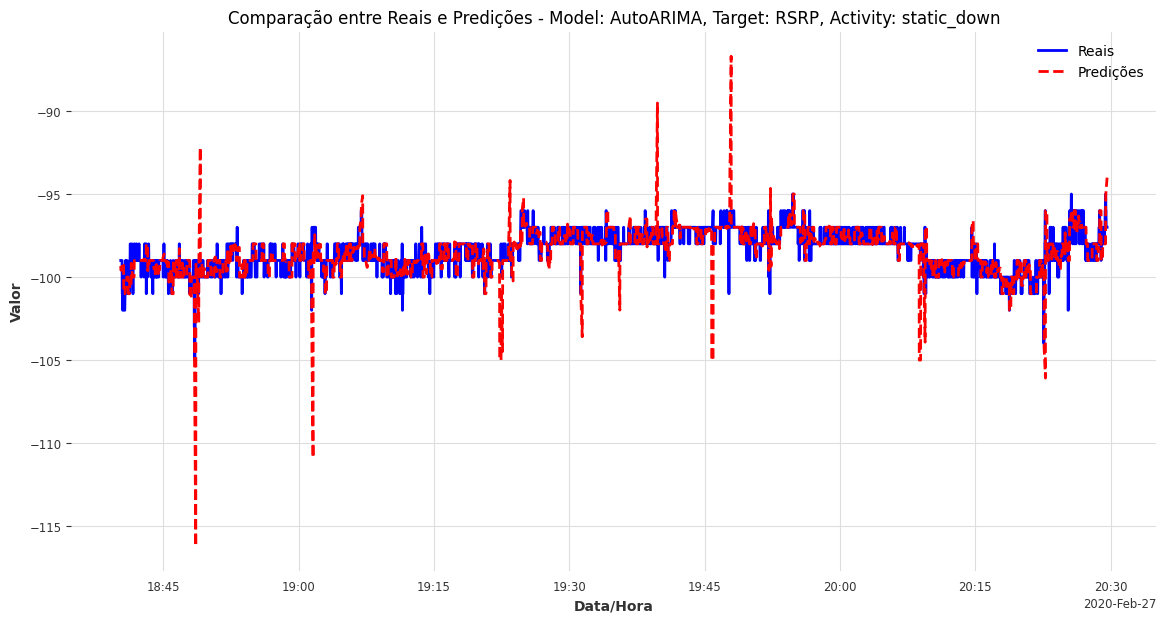

          MAE      RMSE       MSE
726  0.484425  0.809022  0.654517


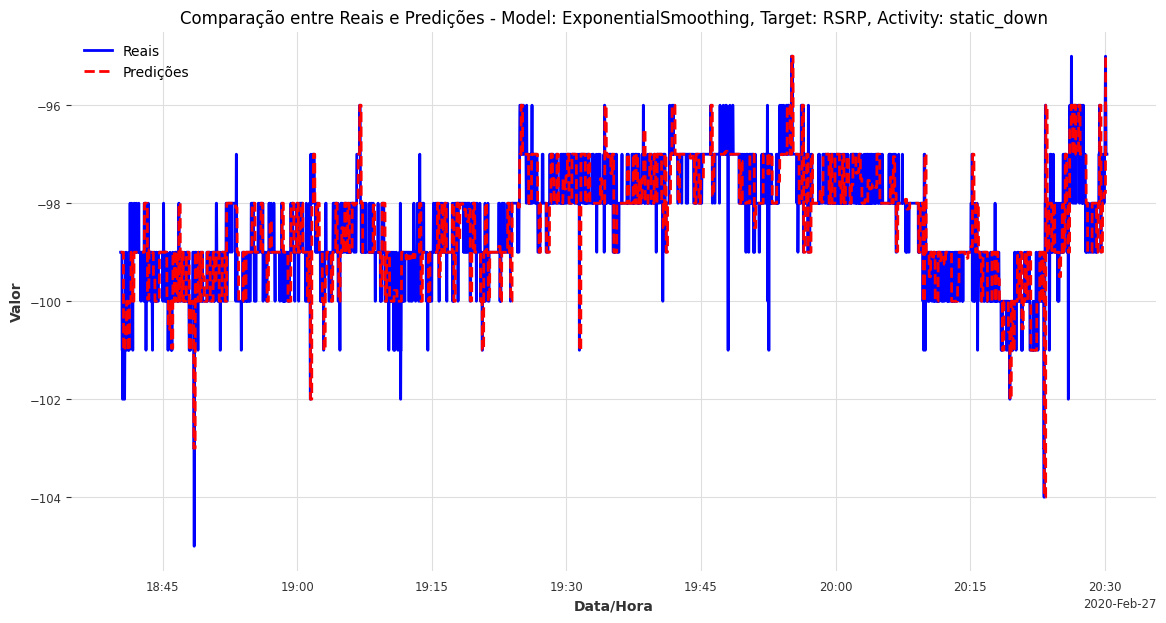

           MAE      RMSE       MSE
1141  0.708379  0.948465  0.899586


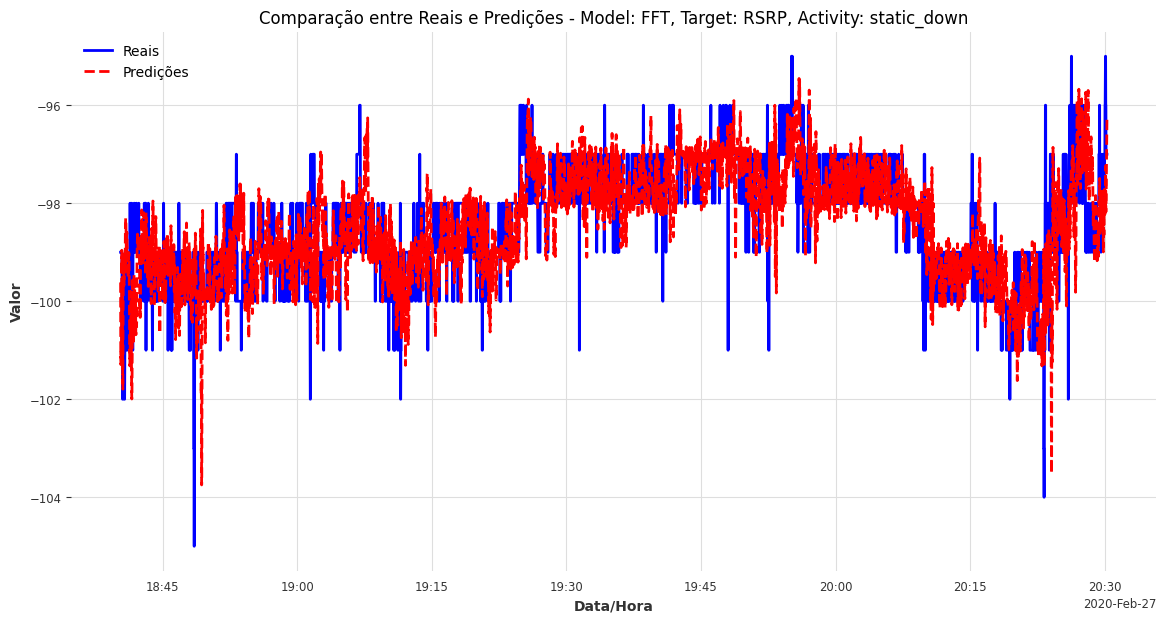

           MAE      RMSE      MSE
1553  0.480303  0.813517  0.66181


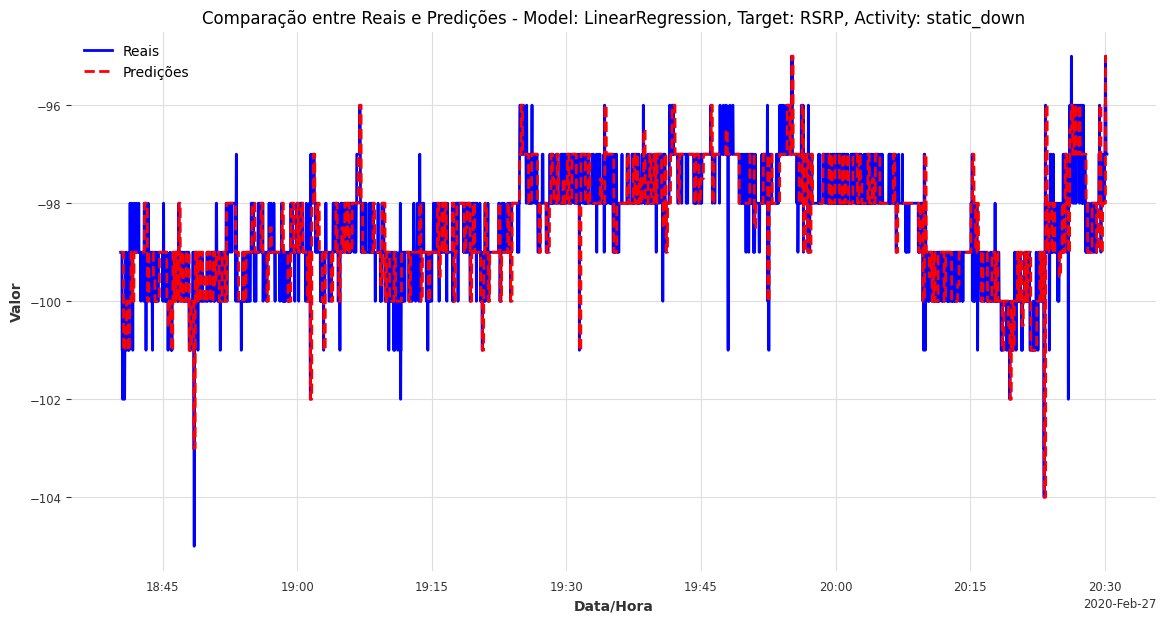

           MAE      RMSE      MSE
3207  0.480303  0.813517  0.66181


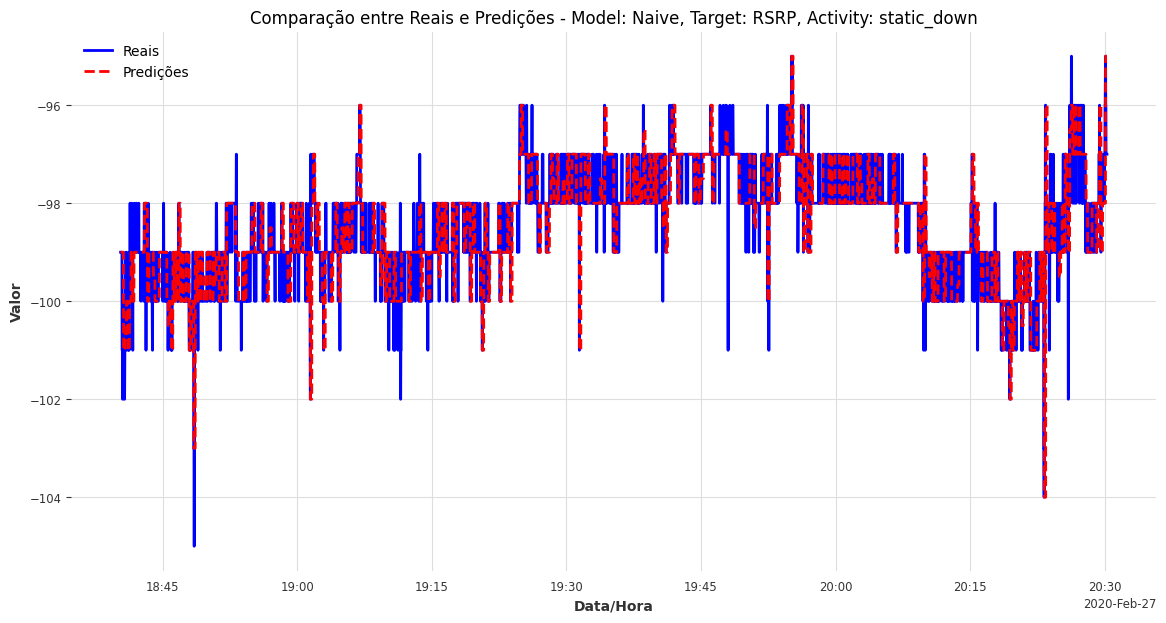

          MAE      RMSE       MSE
1962  0.54762  0.877425  0.769875


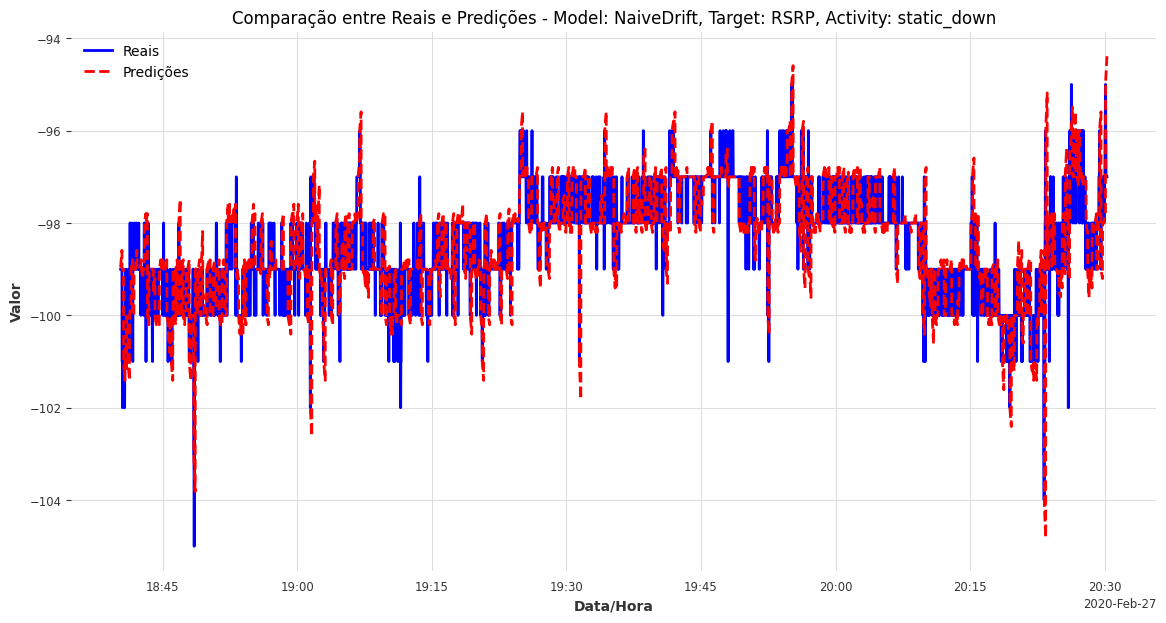

           MAE      RMSE       MSE
2377  0.543507  0.733154  0.537515


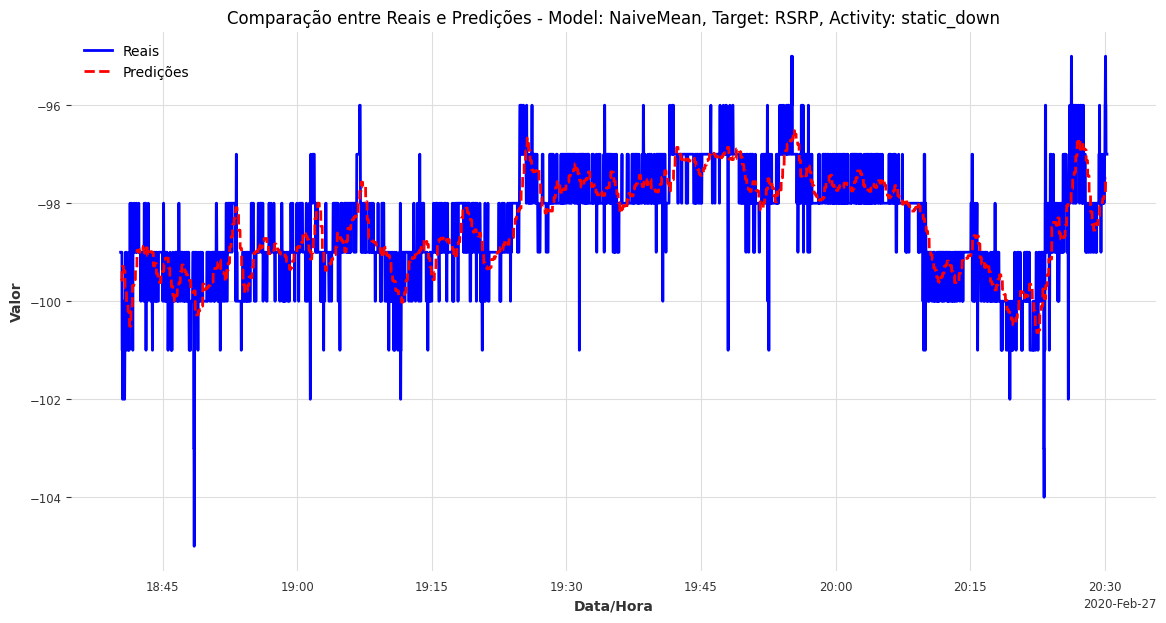

           MAE      RMSE       MSE
2792  0.539609  0.730292  0.533327


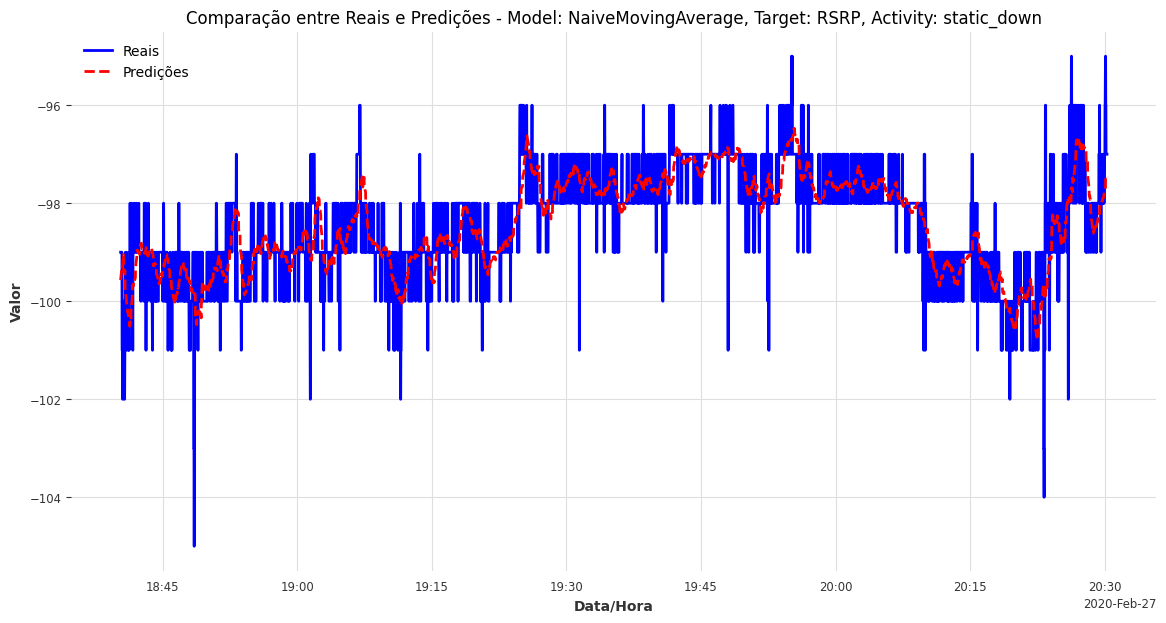

           MAE      RMSE       MSE
3619  0.570166  0.791823  0.626983


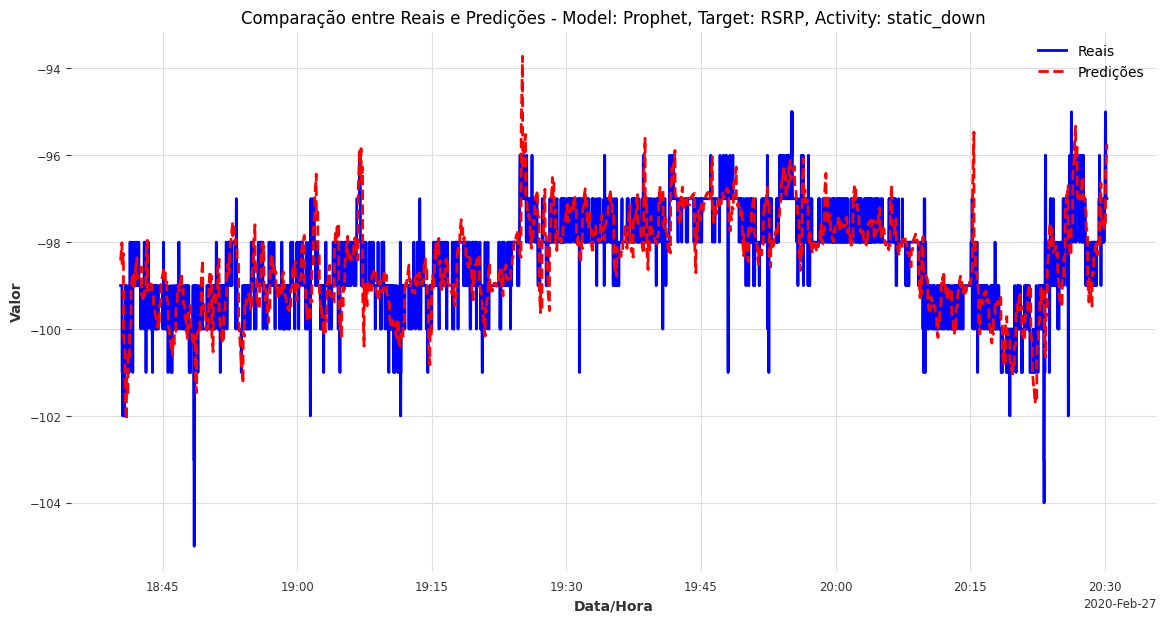

           MAE      RMSE       MSE
4028  0.578923  0.837179  0.700869


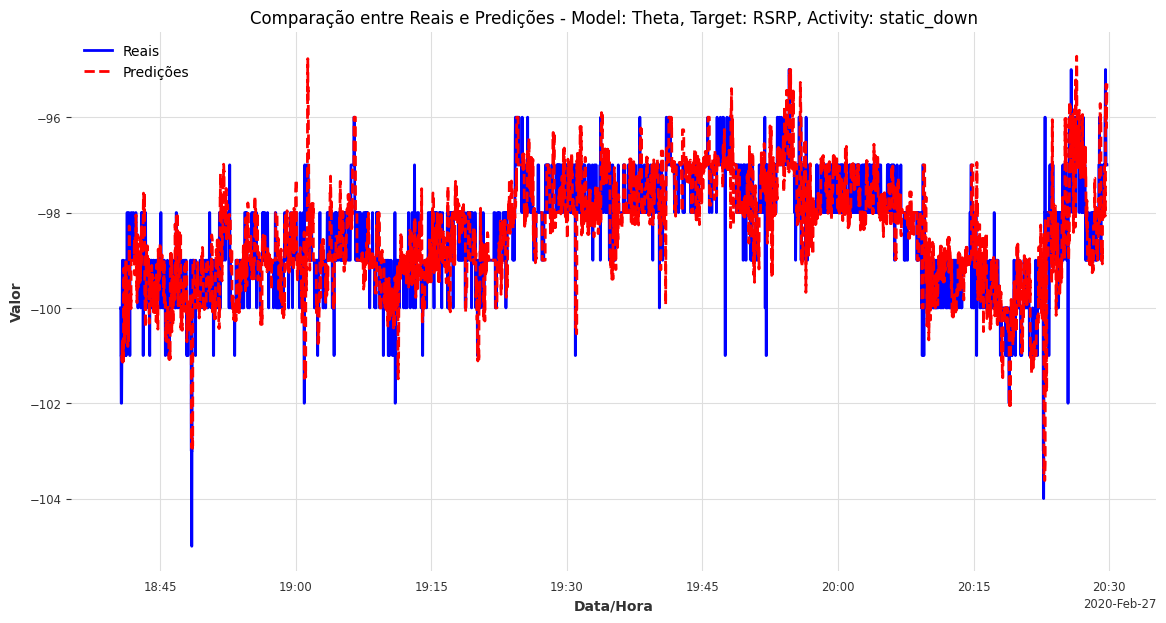

In [20]:
# Exemplo de uso
for model in lowest_mae["Model"].unique():
    plot_actual_vs_preds(
        lowest_rmse, model=model, target="RSRP", activity="static_down"
    )